<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/17_Introduction_to_Natural_Language_Processing_in_Python/01_Regular_expressions_%26_word_tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4. Informed Search


### Informed Search: Coarse to Fine

**Visualizing Coarse to Fine**
You're going to undertake the first part of a Coarse to Fine search. This involves analyzing the results of an initial random search that took place over a large search space, then deciding what would be the next logical step to make your hyperparameter search finer.

You have available:

- combinations_list - a list of the possible hyperparameter combinations the random search was undertaken on.
- results_df - a DataFrame that has each hyperparameter combination and the resulting accuracy of all 500 trials. Each hyperparameter is a column, with the header the hyperparameter name.
- visualize_hyperparameter() - a function that takes in a column of the DataFrame (as a string) and produces a scatter plot of this column's values compared to the accuracy scores. An example call of the function would be visualize_hyperparameter('accuracy')
- If you wish to view the visualize_hyperparameter() function definition, you can run this code:

    import inspect
    print(inspect.getsource(visualize_hyperparameter))

,max_depth,min_samples_leaf,learn_rate,accuracy
0,4,16,0.624362,95
1,10,14,0.477450,97
2,7,14,0.050067,96
3,5,12,0.023356,96
4,6,12,0.771275,97


1
    max_depth  min_samples_leaf  learn_rate  accuracy
1          10                14    0.477450        97
4           6                12    0.771275        97
11          4                16    0.504161        96
7          19                10    0.757919        96
9          16                13    0.904832        96
2           7                14    0.050067        96
6           6                10    0.317181        96
3           5                12    0.023356        96
5          13                11    0.290470        96
10         12                13    0.891477        96
Index(['max_depth', 'min_samples_leaf', 'learn_rate', 'accuracy'], dtype='object')
Visualizing max_depth vs accuracy...


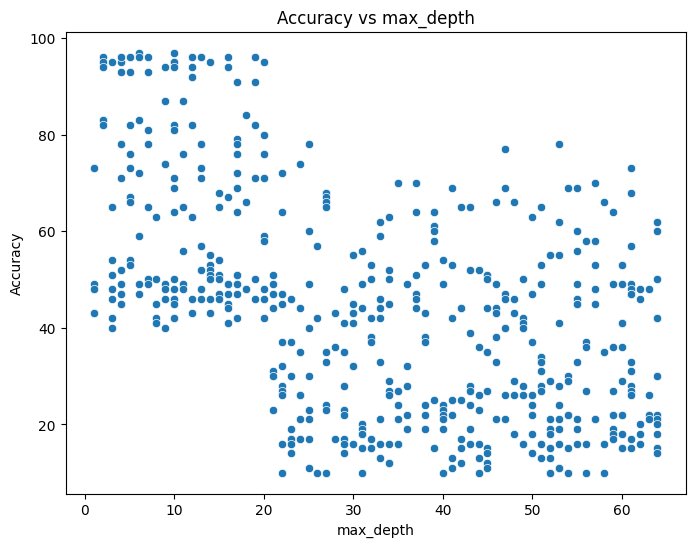

Visualizing min_samples_leaf vs accuracy...


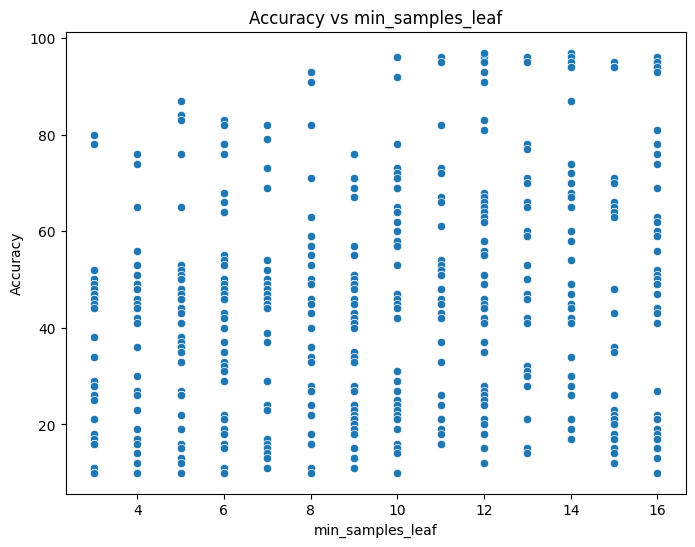

Visualizing learn_rate vs accuracy...


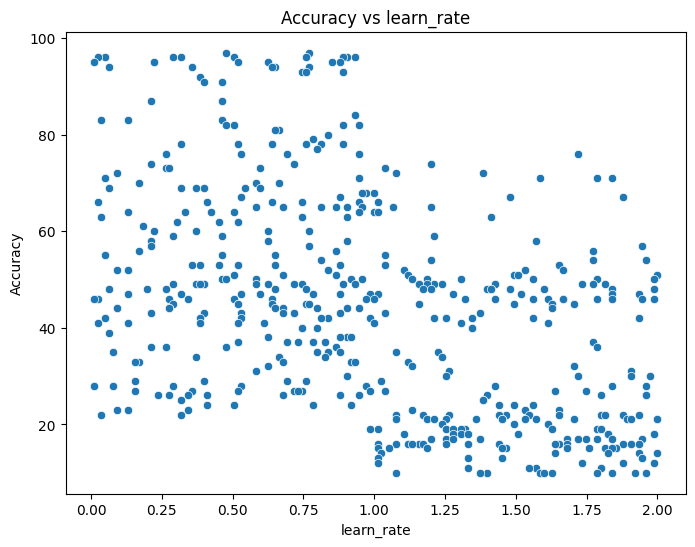

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/15_Hyperparameter_Tuning_in_Python/Dataset/results_df.csv"
# Read the CSV file
# Apply pd.to_numeric only to relevant columns, excluding 'text'
results_df = pd.read_csv(url)


display(results_df.head())

# Placeholder data for combinations_list and results_df
# In a real scenario, these would be generated by a random search or similar process.
combinations_list = [

[[1, 3, 0.01], [1, 3, 0.023355704697986576], [1, 3, 0.03671140939597316], [1, 3, 0.05006711409395973], [1, 3, 0.0634228187919463], [1, 3, 0.07677852348993289], [1, 3, 0.09013422818791945], [1, 3, 0.10348993288590604], [1, 3, 0.11684563758389262], [1, 3, 0.1302013422818792], [1, 3, 0.1435570469798658], [1, 3, 0.15691275167785237], [1, 3, 0.17026845637583893], [1, 3, 0.1836241610738255], [1, 3, 0.1969798657718121], [1, 3, 0.21033557046979867], [1, 3, 0.22369127516778525], [1, 3, 0.23704697986577183], [1, 3, 0.2504026845637584], [1, 3, 0.263758389261745], [1, 3, 0.2771140939597316], [1, 3, 0.29046979865771816], [1, 3, 0.30382550335570474], [1, 3, 0.3171812080536913], [1, 3, 0.33053691275167785], [1, 3, 0.34389261744966443], [1, 3, 0.357248322147651], [1, 3, 0.3706040268456376], [1, 3, 0.38395973154362417], [1, 3, 0.39731543624161075], [1, 3, 0.41067114093959733], [1, 3, 0.4240268456375839], [1, 3, 0.4373825503355705], [1, 3, 0.4507382550335571], [1, 3, 0.46409395973154366], [1, 3, 0.47744966442953024], [1, 3, 0.4908053691275168], [1, 3, 0.5041610738255033], [1, 3, 0.51751677852349], [1, 3, 0.5308724832214765], [1, 3, 0.5442281879194631], [1, 3, 0.5575838926174497], [1, 3, 0.5709395973154363], [1, 3, 0.5842953020134228], [1, 3, 0.5976510067114095], [1, 3, 0.611006711409396], [1, 3, 0.6243624161073826], [1, 3, 0.6377181208053692], [1, 3, 0.6510738255033557], [1, 3, 0.6644295302013423], [1, 3, 0.6777852348993288], [1, 3, 0.6911409395973155], [1, 3, 0.704496644295302], [1, 3, 0.7178523489932886], [1, 3, 0.7312080536912752], [1, 3, 0.7445637583892618], [1, 3, 0.7579194630872483], [1, 3, 0.771275167785235], [1, 3, 0.7846308724832215], [1, 3, 0.7979865771812081], [1, 3, 0.8113422818791947], [1, 3, 0.8246979865771813], [1, 3, 0.8380536912751678], [1, 3, 0.8514093959731545], [1, 3, 0.864765100671141], [1, 3, 0.8781208053691275], [1, 3, 0.8914765100671141], [1, 3, 0.9048322147651007], [1, 3, 0.9181879194630873], [1, 3, 0.9315436241610738], [1, 3, 0.9448993288590605], [1, 3, 0.958255033557047], [1, 3, 0.9716107382550336], [1, 3, 0.9849664429530202], [1, 3, 0.9983221476510068], [1, 3, 1.0116778523489933], [1, 3, 1.02503355704698], [1, 3, 1.0383892617449666], [1, 3, 1.051744966442953], [1, 3, 1.0651006711409396], [1, 3, 1.0784563758389263], [1, 3, 1.0918120805369127], [1, 3, 1.1051677852348993], [1, 3, 1.118523489932886], [1, 3, 1.1318791946308726], [1, 3, 1.145234899328859], [1, 3, 1.1585906040268457], [1, 3, 1.1719463087248323], [1, 3, 1.185302013422819], [1, 3, 1.1986577181208053], [1, 3, 1.212013422818792], [1, 3, 1.2253691275167786], [1, 3, 1.2387248322147653], [1, 3, 1.2520805369127517], [1, 3, 1.2654362416107383], [1, 3, 1.278791946308725], [1, 3, 1.2921476510067114], [1, 3, 1.305503355704698], [1, 3, 1.3188590604026846], [1, 3, 1.3322147651006713], [1, 3, 1.3455704697986577], [1, 3, 1.3589261744966443], [1, 3, 1.372281879194631], [1, 3, 1.3856375838926176], [1, 3, 1.398993288590604], [1, 3, 1.4123489932885906], [1, 3, 1.4257046979865773], [1, 3, 1.439060402684564], [1, 3, 1.4524161073825503], [1, 3, 1.465771812080537], [1, 3, 1.4791275167785236], [1, 3, 1.4924832214765102], [1, 3, 1.5058389261744967], [1, 3, 1.5191946308724833], [1, 3, 1.53255033557047], [1, 3, 1.5459060402684563], [1, 3, 1.559261744966443], [1, 3, 1.5726174496644296], [1, 3, 1.5859731543624163], [1, 3, 1.5993288590604027], [1, 3, 1.6126845637583893], [1, 3, 1.626040268456376], [1, 3, 1.6393959731543626], [1, 3, 1.652751677852349], [1, 3, 1.6661073825503356], [1, 3, 1.6794630872483223], [1, 3, 1.692818791946309], [1, 3, 1.7061744966442953], [1, 3, 1.719530201342282], [1, 3, 1.7328859060402686], [1, 3, 1.746241610738255], [1, 3, 1.7595973154362416], [1, 3, 1.7729530201342283], [1, 3, 1.786308724832215], [1, 3, 1.7996644295302013], [1, 3, 1.813020134228188], [1, 3, 1.8263758389261746], [1, 3, 1.8397315436241612], [1, 3, 1.8530872483221477], [1, 3, 1.8664429530201343], [1, 3, 1.879798657718121], [1, 3, 1.8931543624161076], [1, 3, 1.906510067114094], [1, 3, 1.9198657718120806], [1, 3, 1.9332214765100673], [1, 3, 1.9465771812080537], [1, 3, 1.9599328859060403], [1, 3, 1.973288590604027], [1, 3, 1.9866442953020136], [1, 3, 2.0], [1, 4, 0.01], [1, 4, 0.023355704697986576], [1, 4, 0.03671140939597316], [1, 4, 0.05006711409395973], [1, 4, 0.0634228187919463], [1, 4, 0.07677852348993289], [1, 4, 0.09013422818791945], [1, 4, 0.10348993288590604], [1, 4, 0.11684563758389262], [1, 4, 0.1302013422818792], [1, 4, 0.1435570469798658], [1, 4, 0.15691275167785237], [1, 4, 0.17026845637583893], [1, 4, 0.1836241610738255], [1, 4, 0.1969798657718121], [1, 4, 0.21033557046979867], [1, 4, 0.22369127516778525], [1, 4, 0.23704697986577183], [1, 4, 0.2504026845637584], [1, 4, 0.263758389261745], [1, 4, 0.2771140939597316], [1, 4, 0.29046979865771816], [1, 4, 0.30382550335570474], [1, 4, 0.3171812080536913], [1, 4, 0.33053691275167785], [1, 4, 0.34389261744966443], [1, 4, 0.357248322147651], [1, 4, 0.3706040268456376], [1, 4, 0.38395973154362417], [1, 4, 0.39731543624161075], [1, 4, 0.41067114093959733], [1, 4, 0.4240268456375839], [1, 4, 0.4373825503355705], [1, 4, 0.4507382550335571], [1, 4, 0.46409395973154366], [1, 4, 0.47744966442953024], [1, 4, 0.4908053691275168], [1, 4, 0.5041610738255033], [1, 4, 0.51751677852349], [1, 4, 0.5308724832214765], [1, 4, 0.5442281879194631], [1, 4, 0.5575838926174497], [1, 4, 0.5709395973154363], [1, 4, 0.5842953020134228], [1, 4, 0.5976510067114095], [1, 4, 0.611006711409396], [1, 4, 0.6243624161073826], [1, 4, 0.6377181208053692], [1, 4, 0.6510738255033557], [1, 4, 0.6644295302013423], [1, 4, 0.6777852348993288], [1, 4, 0.6911409395973155], [1, 4, 0.704496644295302], [1, 4, 0.7178523489932886], [1, 4, 0.7312080536912752], [1, 4, 0.7445637583892618], [1, 4, 0.7579194630872483], [1, 4, 0.771275167785235], [1, 4, 0.7846308724832215], [1, 4, 0.7979865771812081], [1, 4, 0.8113422818791947], [1, 4, 0.8246979865771813], [1, 4, 0.8380536912751678], [1, 4, 0.8514093959731545], [1, 4, 0.864765100671141], [1, 4, 0.8781208053691275], [1, 4, 0.8914765100671141], [1, 4, 0.9048322147651007], [1, 4, 0.9181879194630873], [1, 4, 0.9315436241610738], [1, 4, 0.9448993288590605], [1, 4, 0.958255033557047], [1, 4, 0.9716107382550336], [1, 4, 0.9849664429530202], [1, 4, 0.9983221476510068], [1, 4, 1.0116778523489933], [1, 4, 1.02503355704698], [1, 4, 1.0383892617449666], [1, 4, 1.051744966442953], [1, 4, 1.0651006711409396], [1, 4, 1.0784563758389263], [1, 4, 1.0918120805369127], [1, 4, 1.1051677852348993], [1, 4, 1.118523489932886], [1, 4, 1.1318791946308726], [1, 4, 1.145234899328859], [1, 4, 1.1585906040268457], [1, 4, 1.1719463087248323], [1, 4, 1.185302013422819], [1, 4, 1.1986577181208053], [1, 4, 1.212013422818792], [1, 4, 1.2253691275167786], [1, 4, 1.2387248322147653], [1, 4, 1.2520805369127517], [1, 4, 1.2654362416107383], [1, 4, 1.278791946308725], [1, 4, 1.2921476510067114], [1, 4, 1.305503355704698], [1, 4, 1.3188590604026846], [1, 4, 1.3322147651006713], [1, 4, 1.3455704697986577], [1, 4, 1.3589261744966443], [1, 4, 1.372281879194631], [1, 4, 1.3856375838926176], [1, 4, 1.398993288590604], [1, 4, 1.4123489932885906], [1, 4, 1.4257046979865773], [1, 4, 1.439060402684564], [1, 4, 1.4524161073825503], [1, 4, 1.465771812080537], [1, 4, 1.4791275167785236], [1, 4, 1.4924832214765102], [1, 4, 1.5058389261744967], [1, 4, 1.5191946308724833], [1, 4, 1.53255033557047], [1, 4, 1.5459060402684563], [1, 4, 1.559261744966443], [1, 4, 1.5726174496644296], [1, 4, 1.5859731543624163], [1, 4, 1.5993288590604027], [1, 4, 1.6126845637583893], [1, 4, 1.626040268456376], [1, 4, 1.6393959731543626], [1, 4, 1.652751677852349], [1, 4, 1.6661073825503356], [1, 4, 1.6794630872483223], [1, 4, 1.692818791946309], [1, 4, 1.7061744966442953], [1, 4, 1.719530201342282], [1, 4, 1.7328859060402686], [1, 4, 1.746241610738255], [1, 4, 1.7595973154362416], [1, 4, 1.7729530201342283], [1, 4, 1.786308724832215], [1, 4, 1.7996644295302013], [1, 4, 1.813020134228188], [1, 4, 1.8263758389261746], [1, 4, 1.8397315436241612], [1, 4, 1.8530872483221477], [1, 4, 1.8664429530201343], [1, 4, 1.879798657718121], [1, 4, 1.8931543624161076], [1, 4, 1.906510067114094], [1, 4, 1.9198657718120806], [1, 4, 1.9332214765100673], [1, 4, 1.9465771812080537], [1, 4, 1.9599328859060403], [1, 4, 1.973288590604027], [1, 4, 1.9866442953020136], [1, 4, 2.0], [1, 5, 0.01], [1, 5, 0.023355704697986576], [1, 5, 0.03671140939597316], [1, 5, 0.05006711409395973], [1, 5, 0.0634228187919463], [1, 5, 0.07677852348993289], [1, 5, 0.09013422818791945], [1, 5, 0.10348993288590604], [1, 5, 0.11684563758389262], [1, 5, 0.1302013422818792], [1, 5, 0.1435570469798658], [1, 5, 0.15691275167785237], [1, 5, 0.17026845637583893], [1, 5, 0.1836241610738255], [1, 5, 0.1969798657718121], [1, 5, 0.21033557046979867], [1, 5, 0.22369127516778525], [1, 5, 0.23704697986577183], [1, 5, 0.2504026845637584], [1, 5, 0.263758389261745], [1, 5, 0.2771140939597316], [1, 5, 0.29046979865771816], [1, 5, 0.30382550335570474], [1, 5, 0.3171812080536913], [1, 5, 0.33053691275167785], [1, 5, 0.34389261744966443], [1, 5, 0.357248322147651], [1, 5, 0.3706040268456376], [1, 5, 0.38395973154362417], [1, 5, 0.39731543624161075], [1, 5, 0.41067114093959733], [1, 5, 0.4240268456375839], [1, 5, 0.4373825503355705], [1, 5, 0.4507382550335571], [1, 5, 0.46409395973154366], [1, 5, 0.47744966442953024], [1, 5, 0.4908053691275168], [1, 5, 0.5041610738255033], [1, 5, 0.51751677852349], [1, 5, 0.5308724832214765], [1, 5, 0.5442281879194631], [1, 5, 0.5575838926174497], [1, 5, 0.5709395973154363], [1, 5, 0.5842953020134228], [1, 5, 0.5976510067114095], [1, 5, 0.611006711409396], [1, 5, 0.6243624161073826], [1, 5, 0.6377181208053692], [1, 5, 0.6510738255033557], [1, 5, 0.6644295302013423], [1, 5, 0.6777852348993288], [1, 5, 0.6911409395973155], [1, 5, 0.704496644295302], [1, 5, 0.7178523489932886], [1, 5, 0.7312080536912752], [1, 5, 0.7445637583892618], [1, 5, 0.7579194630872483], [1, 5, 0.771275167785235], [1, 5, 0.7846308724832215], [1, 5, 0.7979865771812081], [1, 5, 0.8113422818791947], [1, 5, 0.8246979865771813], [1, 5, 0.8380536912751678], [1, 5, 0.8514093959731545], [1, 5, 0.864765100671141], [1, 5, 0.8781208053691275], [1, 5, 0.8914765100671141], [1, 5, 0.9048322147651007], [1, 5, 0.9181879194630873], [1, 5, 0.9315436241610738], [1, 5, 0.9448993288590605], [1, 5, 0.958255033557047], [1, 5, 0.9716107382550336], [1, 5, 0.9849664429530202], [1, 5, 0.9983221476510068], [1, 5, 1.0116778523489933], [1, 5, 1.02503355704698], [1, 5, 1.0383892617449666], [1, 5, 1.051744966442953], [1, 5, 1.0651006711409396], [1, 5, 1.0784563758389263], [1, 5, 1.0918120805369127], [1, 5, 1.1051677852348993], [1, 5, 1.118523489932886], [1, 5, 1.1318791946308726], [1, 5, 1.145234899328859], [1, 5, 1.1585906040268457], [1, 5, 1.1719463087248323], [1, 5, 1.185302013422819], [1, 5, 1.1986577181208053], [1, 5, 1.212013422818792], [1, 5, 1.2253691275167786], [1, 5, 1.2387248322147653], [1, 5, 1.2520805369127517], [1, 5, 1.2654362416107383], [1, 5, 1.278791946308725], [1, 5, 1.2921476510067114], [1, 5, 1.305503355704698], [1, 5, 1.3188590604026846], [1, 5, 1.3322147651006713], [1, 5, 1.3455704697986577], [1, 5, 1.3589261744966443], [1, 5, 1.372281879194631], [1, 5, 1.3856375838926176], [1, 5, 1.398993288590604], [1, 5, 1.4123489932885906], [1, 5, 1.4257046979865773], [1, 5, 1.439060402684564], [1, 5, 1.4524161073825503], [1, 5, 1.465771812080537], [1, 5, 1.4791275167785236], [1, 5, 1.4924832214765102], [1, 5, 1.5058389261744967], [1, 5, 1.5191946308724833], [1, 5, 1.53255033557047], [1, 5, 1.5459060402684563], [1, 5, 1.559261744966443], [1, 5, 1.5726174496644296], [1, 5, 1.5859731543624163], [1, 5, 1.5993288590604027], [1, 5, 1.6126845637583893], [1, 5, 1.626040268456376], [1, 5, 1.6393959731543626], [1, 5, 1.652751677852349], [1, 5, 1.6661073825503356], [1, 5, 1.6794630872483223], [1, 5, 1.692818791946309], [1, 5, 1.7061744966442953], [1, 5, 1.719530201342282], [1, 5, 1.7328859060402686], [1, 5, 1.746241610738255], [1, 5, 1.7595973154362416], [1, 5, 1.7729530201342283], [1, 5, 1.786308724832215], [1, 5, 1.7996644295302013], [1, 5, 1.813020134228188], [1, 5, 1.8263758389261746], [1, 5, 1.8397315436241612], [1, 5, 1.8530872483221477], [1, 5, 1.8664429530201343], [1, 5, 1.879798657718121], [1, 5, 1.8931543624161076], [1, 5, 1.906510067114094], [1, 5, 1.9198657718120806], [1, 5, 1.9332214765100673], [1, 5, 1.9465771812080537], [1, 5, 1.9599328859060403], [1, 5, 1.973288590604027], [1, 5, 1.9866442953020136], [1, 5, 2.0], [1, 6, 0.01], [1, 6, 0.023355704697986576], [1, 6, 0.03671140939597316], [1, 6, 0.05006711409395973], [1, 6, 0.0634228187919463], [1, 6, 0.07677852348993289], [1, 6, 0.09013422818791945], [1, 6, 0.10348993288590604], [1, 6, 0.11684563758389262], [1, 6, 0.1302013422818792], [1, 6, 0.1435570469798658], [1, 6, 0.15691275167785237], [1, 6, 0.17026845637583893], [1, 6, 0.1836241610738255], [1, 6, 0.1969798657718121], [1, 6, 0.21033557046979867], [1, 6, 0.22369127516778525], [1, 6, 0.23704697986577183], [1, 6, 0.2504026845637584], [1, 6, 0.263758389261745], [1, 6, 0.2771140939597316], [1, 6, 0.29046979865771816], [1, 6, 0.30382550335570474], [1, 6, 0.3171812080536913], [1, 6, 0.33053691275167785], [1, 6, 0.34389261744966443], [1, 6, 0.357248322147651], [1, 6, 0.3706040268456376], [1, 6, 0.38395973154362417], [1, 6, 0.39731543624161075], [1, 6, 0.41067114093959733], [1, 6, 0.4240268456375839], [1, 6, 0.4373825503355705], [1, 6, 0.4507382550335571], [1, 6, 0.46409395973154366], [1, 6, 0.47744966442953024], [1, 6, 0.4908053691275168], [1, 6, 0.5041610738255033], [1, 6, 0.51751677852349], [1, 6, 0.5308724832214765], [1, 6, 0.5442281879194631], [1, 6, 0.5575838926174497], [1, 6, 0.5709395973154363], [1, 6, 0.5842953020134228], [1, 6, 0.5976510067114095], [1, 6, 0.611006711409396], [1, 6, 0.6243624161073826], [1, 6, 0.6377181208053692], [1, 6, 0.6510738255033557], [1, 6, 0.6644295302013423], [1, 6, 0.6777852348993288], [1, 6, 0.6911409395973155], [1, 6, 0.704496644295302], [1, 6, 0.7178523489932886], [1, 6, 0.7312080536912752], [1, 6, 0.7445637583892618], [1, 6, 0.7579194630872483], [1, 6, 0.771275167785235], [1, 6, 0.7846308724832215], [1, 6, 0.7979865771812081], [1, 6, 0.8113422818791947], [1, 6, 0.8246979865771813], [1, 6, 0.8380536912751678], [1, 6, 0.8514093959731545], [1, 6, 0.864765100671141], [1, 6, 0.8781208053691275], [1, 6, 0.8914765100671141], [1, 6, 0.9048322147651007], [1, 6, 0.9181879194630873], [1, 6, 0.9315436241610738], [1, 6, 0.9448993288590605], [1, 6, 0.958255033557047], [1, 6, 0.9716107382550336], [1, 6, 0.9849664429530202], [1, 6, 0.9983221476510068], [1, 6, 1.0116778523489933], [1, 6, 1.02503355704698], [1, 6, 1.0383892617449666], [1, 6, 1.051744966442953], [1, 6, 1.0651006711409396], [1, 6, 1.0784563758389263], [1, 6, 1.0918120805369127], [1, 6, 1.1051677852348993], [1, 6, 1.118523489932886], [1, 6, 1.1318791946308726], [1, 6, 1.145234899328859], [1, 6, 1.1585906040268457], [1, 6, 1.1719463087248323], [1, 6, 1.185302013422819], [1, 6, 1.1986577181208053], [1, 6, 1.212013422818792], [1, 6, 1.2253691275167786], [1, 6, 1.2387248322147653], [1, 6, 1.2520805369127517], [1, 6, 1.2654362416107383], [1, 6, 1.278791946308725], [1, 6, 1.2921476510067114], [1, 6, 1.305503355704698], [1, 6, 1.3188590604026846], [1, 6, 1.3322147651006713], [1, 6, 1.3455704697986577], [1, 6, 1.3589261744966443], [1, 6, 1.372281879194631], [1, 6, 1.3856375838926176], [1, 6, 1.398993288590604], [1, 6, 1.4123489932885906], [1, 6, 1.4257046979865773], [1, 6, 1.439060402684564], [1, 6, 1.4524161073825503], [1, 6, 1.465771812080537], [1, 6, 1.4791275167785236], [1, 6, 1.4924832214765102], [1, 6, 1.5058389261744967], [1, 6, 1.5191946308724833], [1, 6, 1.53255033557047], [1, 6, 1.5459060402684563], [1, 6, 1.559261744966443], [1, 6, 1.5726174496644296], [1, 6, 1.5859731543624163], [1, 6, 1.5993288590604027], [1, 6, 1.6126845637583893], [1, 6, 1.626040268456376], [1, 6, 1.6393959731543626], [1, 6, 1.652751677852349], [1, 6, 1.6661073825503356], [1, 6, 1.6794630872483223], [1, 6, 1.692818791946309], [1, 6, 1.7061744966442953], [1, 6, 1.719530201342282], [1, 6, 1.7328859060402686], [1, 6, 1.746241610738255], [1, 6, 1.7595973154362416], [1, 6, 1.7729530201342283], [1, 6, 1.786308724832215], [1, 6, 1.7996644295302013], [1, 6, 1.813020134228188], [1, 6, 1.8263758389261746], [1, 6, 1.8397315436241612], [1, 6, 1.8530872483221477], [1, 6, 1.8664429530201343], [1, 6, 1.879798657718121], [1, 6, 1.8931543624161076], [1, 6, 1.906510067114094], [1, 6, 1.9198657718120806], [1, 6, 1.9332214765100673], [1, 6, 1.9465771812080537], [1, 6, 1.9599328859060403], [1, 6, 1.973288590604027], [1, 6, 1.9866442953020136], [1, 6, 2.0], [1, 7, 0.01], [1, 7, 0.023355704697986576], [1, 7, 0.03671140939597316], [1, 7, 0.05006711409395973], [1, 7, 0.0634228187919463], [1, 7, 0.07677852348993289], [1, 7, 0.09013422818791945], [1, 7, 0.10348993288590604], [1, 7, 0.11684563758389262], [1, 7, 0.1302013422818792], [1, 7, 0.1435570469798658], [1, 7, 0.15691275167785237], [1, 7, 0.17026845637583893], [1, 7, 0.1836241610738255], [1, 7, 0.1969798657718121], [1, 7, 0.21033557046979867], [1, 7, 0.22369127516778525], [1, 7, 0.23704697986577183], [1, 7, 0.2504026845637584], [1, 7, 0.263758389261745], [1, 7, 0.2771140939597316], [1, 7, 0.29046979865771816], [1, 7, 0.30382550335570474], [1, 7, 0.3171812080536913], [1, 7, 0.33053691275167785], [1, 7, 0.34389261744966443], [1, 7, 0.357248322147651], [1, 7, 0.3706040268456376], [1, 7, 0.38395973154362417], [1, 7, 0.39731543624161075], [1, 7, 0.41067114093959733], [1, 7, 0.4240268456375839], [1, 7, 0.4373825503355705], [1, 7, 0.4507382550335571], [1, 7, 0.46409395973154366], [1, 7, 0.47744966442953024], [1, 7, 0.4908053691275168], [1, 7, 0.5041610738255033], [1, 7, 0.51751677852349], [1, 7, 0.5308724832214765], [1, 7, 0.5442281879194631], [1, 7, 0.5575838926174497], [1, 7, 0.5709395973154363], [1, 7, 0.5842953020134228], [1, 7, 0.5976510067114095], [1, 7, 0.611006711409396], [1, 7, 0.6243624161073826], [1, 7, 0.6377181208053692], [1, 7, 0.6510738255033557], [1, 7, 0.6644295302013423], [1, 7, 0.6777852348993288], [1, 7, 0.6911409395973155], [1, 7, 0.704496644295302], [1, 7, 0.7178523489932886], [1, 7, 0.7312080536912752], [1, 7, 0.7445637583892618], [1, 7, 0.7579194630872483], [1, 7, 0.771275167785235], [1, 7, 0.7846308724832215], [1, 7, 0.7979865771812081], [1, 7, 0.8113422818791947], [1, 7, 0.8246979865771813], [1, 7, 0.8380536912751678], [1, 7, 0.8514093959731545], [1, 7, 0.864765100671141], [1, 7, 0.8781208053691275], [1, 7, 0.8914765100671141], [1, 7, 0.9048322147651007], [1, 7, 0.9181879194630873], [1, 7, 0.9315436241610738], [1, 7, 0.9448993288590605], [1, 7, 0.958255033557047], [1, 7, 0.9716107382550336], [1, 7, 0.9849664429530202], [1, 7, 0.9983221476510068], [1, 7, 1.0116778523489933], [1, 7, 1.02503355704698], [1, 7, 1.0383892617449666], [1, 7, 1.051744966442953], [1, 7, 1.0651006711409396], [1, 7, 1.0784563758389263], [1, 7, 1.0918120805369127], [1, 7, 1.1051677852348993], [1, 7, 1.118523489932886], [1, 7, 1.1318791946308726], [1, 7, 1.145234899328859], [1, 7, 1.1585906040268457], [1, 7, 1.1719463087248323], [1, 7, 1.185302013422819], [1, 7, 1.1986577181208053], [1, 7, 1.212013422818792], [1, 7, 1.2253691275167786], [1, 7, 1.2387248322147653], [1, 7, 1.2520805369127517], [1, 7, 1.2654362416107383], [1, 7, 1.278791946308725], [1, 7, 1.2921476510067114], [1, 7, 1.305503355704698], [1, 7, 1.3188590604026846], [1, 7, 1.3322147651006713], [1, 7, 1.3455704697986577], [1, 7, 1.3589261744966443], [1, 7, 1.372281879194631], [1, 7, 1.3856375838926176], [1, 7, 1.398993288590604], [1, 7, 1.4123489932885906], [1, 7, 1.4257046979865773], [1, 7, 1.439060402684564], [1, 7, 1.4524161073825503], [1, 7, 1.465771812080537], [1, 7, 1.4791275167785236], [1, 7, 1.4924832214765102], [1, 7, 1.5058389261744967], [1, 7, 1.5191946308724833], [1, 7, 1.53255033557047], [1, 7, 1.5459060402684563], [1, 7, 1.559261744966443], [1, 7, 1.5726174496644296], [1, 7, 1.5859731543624163], [1, 7, 1.5993288590604027], [1, 7, 1.6126845637583893], [1, 7, 1.626040268456376], [1, 7, 1.6393959731543626], [1, 7, 1.652751677852349], [1, 7, 1.6661073825503356], [1, 7, 1.6794630872483223], [1, 7, 1.692818791946309], [1, 7, 1.7061744966442953], [1, 7, 1.719530201342282], [1, 7, 1.7328859060402686], [1, 7, 1.746241610738255], [1, 7, 1.7595973154362416], [1, 7, 1.7729530201342283], [1, 7, 1.786308724832215], [1, 7, 1.7996644295302013], [1, 7, 1.813020134228188], [1, 7, 1.8263758389261746], [1, 7, 1.8397315436241612], [1, 7, 1.8530872483221477], [1, 7, 1.8664429530201343], [1, 7, 1.879798657718121], [1, 7, 1.8931543624161076], [1, 7, 1.906510067114094], [1, 7, 1.9198657718120806], [1, 7, 1.9332214765100673], [1, 7, 1.9465771812080537], [1, 7, 1.9599328859060403], [1, 7, 1.973288590604027], [1, 7, 1.9866442953020136], [1, 7, 2.0], [1, 8, 0.01], [1, 8, 0.023355704697986576], [1, 8, 0.03671140939597316], [1, 8, 0.05006711409395973], [1, 8, 0.0634228187919463], [1, 8, 0.07677852348993289], [1, 8, 0.09013422818791945], [1, 8, 0.10348993288590604], [1, 8, 0.11684563758389262], [1, 8, 0.1302013422818792], [1, 8, 0.1435570469798658], [1, 8, 0.15691275167785237], [1, 8, 0.17026845637583893], [1, 8, 0.1836241610738255], [1, 8, 0.1969798657718121], [1, 8, 0.21033557046979867], [1, 8, 0.22369127516778525], [1, 8, 0.23704697986577183], [1, 8, 0.2504026845637584], [1, 8, 0.263758389261745], [1, 8, 0.2771140939597316], [1, 8, 0.29046979865771816], [1, 8, 0.30382550335570474], [1, 8, 0.3171812080536913], [1, 8, 0.33053691275167785], [1, 8, 0.34389261744966443], [1, 8, 0.357248322147651], [1, 8, 0.3706040268456376], [1, 8, 0.38395973154362417], [1, 8, 0.39731543624161075], [1, 8, 0.41067114093959733], [1, 8, 0.4240268456375839], [1, 8, 0.4373825503355705], [1, 8, 0.4507382550335571], [1, 8, 0.46409395973154366], [1, 8, 0.47744966442953024], [1, 8, 0.4908053691275168], [1, 8, 0.5041610738255033], [1, 8, 0.51751677852349], [1, 8, 0.5308724832214765], [1, 8, 0.5442281879194631], [1, 8, 0.5575838926174497], [1, 8, 0.5709395973154363], [1, 8, 0.5842953020134228], [1, 8, 0.5976510067114095], [1, 8, 0.611006711409396], [1, 8, 0.6243624161073826], [1, 8, 0.6377181208053692], [1, 8, 0.6510738255033557], [1, 8, 0.6644295302013423], [1, 8, 0.6777852348993288], [1, 8, 0.6911409395973155], [1, 8, 0.704496644295302], [1, 8, 0.7178523489932886], [1, 8, 0.7312080536912752], [1, 8, 0.7445637583892618], [1, 8, 0.7579194630872483], [1, 8, 0.771275167785235], [1, 8, 0.7846308724832215], [1, 8, 0.7979865771812081], [1, 8, 0.8113422818791947], [1, 8, 0.8246979865771813], [1, 8, 0.8380536912751678], [1, 8, 0.8514093959731545], [1, 8, 0.864765100671141], [1, 8, 0.8781208053691275], [1, 8, 0.8914765100671141], [1, 8, 0.9048322147651007], [1, 8, 0.9181879194630873], [1, 8, 0.9315436241610738], [1, 8, 0.9448993288590605], [1, 8, 0.958255033557047], [1, 8, 0.9716107382550336], [1, 8, 0.9849664429530202], [1, 8, 0.9983221476510068], [1, 8, 1.0116778523489933], [1, 8, 1.02503355704698], [1, 8, 1.0383892617449666], [1, 8, 1.051744966442953], [1, 8, 1.0651006711409396], [1, 8, 1.0784563758389263], [1, 8, 1.0918120805369127], [1, 8, 1.1051677852348993], [1, 8, 1.118523489932886], [1, 8, 1.1318791946308726], [1, 8, 1.145234899328859], [1, 8, 1.1585906040268457], [1, 8, 1.1719463087248323], [1, 8, 1.185302013422819], [1, 8, 1.1986577181208053], [1, 8, 1.212013422818792], [1, 8, 1.2253691275167786], [1, 8, 1.2387248322147653], [1, 8, 1.2520805369127517], [1, 8, 1.2654362416107383], [1, 8, 1.278791946308725], [1, 8, 1.2921476510067114], [1, 8, 1.305503355704698], [1, 8, 1.3188590604026846], [1, 8, 1.3322147651006713], [1, 8, 1.3455704697986577], [1, 8, 1.3589261744966443], [1, 8, 1.372281879194631], [1, 8, 1.3856375838926176], [1, 8, 1.398993288590604], [1, 8, 1.4123489932885906], [1, 8, 1.4257046979865773], [1, 8, 1.439060402684564], [1, 8, 1.4524161073825503], [1, 8, 1.465771812080537], [1, 8, 1.4791275167785236], [1, 8, 1.4924832214765102], [1, 8, 1.5058389261744967], [1, 8, 1.5191946308724833], [1, 8, 1.53255033557047], [1, 8, 1.5459060402684563], [1, 8, 1.559261744966443], [1, 8, 1.5726174496644296], [1, 8, 1.5859731543624163], [1, 8, 1.5993288590604027], [1, 8, 1.6126845637583893], [1, 8, 1.626040268456376], [1, 8, 1.6393959731543626], [1, 8, 1.652751677852349], [1, 8, 1.6661073825503356], [1, 8, 1.6794630872483223], [1, 8, 1.692818791946309], [1, 8, 1.7061744966442953], [1, 8, 1.719530201342282], [1, 8, 1.7328859060402686], [1, 8, 1.746241610738255], [1, 8, 1.7595973154362416], [1, 8, 1.7729530201342283], [1, 8, 1.786308724832215], [1, 8, 1.7996644295302013], [1, 8, 1.813020134228188], [1, 8, 1.8263758389261746], [1, 8, 1.8397315436241612], [1, 8, 1.8530872483221477], [1, 8, 1.8664429530201343], [1, 8, 1.879798657718121], [1, 8, 1.8931543624161076], [1, 8, 1.906510067114094], [1, 8, 1.9198657718120806], [1, 8, 1.9332214765100673], [1, 8, 1.9465771812080537], [1, 8, 1.9599328859060403], [1, 8, 1.973288590604027], [1, 8, 1.9866442953020136], [1, 8, 2.0], [1, 9, 0.01], [1, 9, 0.023355704697986576], [1, 9, 0.03671140939597316], [1, 9, 0.05006711409395973], [1, 9, 0.0634228187919463], [1, 9, 0.07677852348993289], [1, 9, 0.09013422818791945], [1, 9, 0.10348993288590604], [1, 9, 0.11684563758389262], [1, 9, 0.1302013422818792], [1, 9, 0.1435570469798658], [1, 9, 0.15691275167785237], [1, 9, 0.17026845637583893], [1, 9, 0.1836241610738255], [1, 9, 0.1969798657718121], [1, 9, 0.21033557046979867], [1, 9, 0.22369127516778525], [1, 9, 0.23704697986577183], [1, 9, 0.2504026845637584], [1, 9, 0.263758389261745], [1, 9, 0.2771140939597316], [1, 9, 0.29046979865771816], [1, 9, 0.30382550335570474], [1, 9, 0.3171812080536913], [1, 9, 0.33053691275167785], [1, 9, 0.34389261744966443], [1, 9, 0.357248322147651], [1, 9, 0.3706040268456376], [1, 9, 0.38395973154362417], [1, 9, 0.39731543624161075], [1, 9, 0.41067114093959733], [1, 9, 0.4240268456375839], [1, 9, 0.4373825503355705], [1, 9, 0.4507382550335571], [1, 9, 0.46409395973154366], [1, 9, 0.47744966442953024], [1, 9, 0.4908053691275168], [1, 9, 0.5041610738255033], [1, 9, 0.51751677852349], [1, 9, 0.5308724832214765], [1, 9, 0.5442281879194631], [1, 9, 0.5575838926174497], [1, 9, 0.5709395973154363], [1, 9, 0.5842953020134228], [1, 9, 0.5976510067114095], [1, 9, 0.611006711409396], [1, 9, 0.6243624161073826], [1, 9, 0.6377181208053692], [1, 9, 0.6510738255033557], [1, 9, 0.6644295302013423], [1, 9, 0.6777852348993288], [1, 9, 0.6911409395973155], [1, 9, 0.704496644295302], [1, 9, 0.7178523489932886], [1, 9, 0.7312080536912752], [1, 9, 0.7445637583892618], [1, 9, 0.7579194630872483], [1, 9, 0.771275167785235], [1, 9, 0.7846308724832215], [1, 9, 0.7979865771812081], [1, 9, 0.8113422818791947], [1, 9, 0.8246979865771813], [1, 9, 0.8380536912751678], [1, 9, 0.8514093959731545], [1, 9, 0.864765100671141], [1, 9, 0.8781208053691275], [1, 9, 0.8914765100671141], [1, 9, 0.9048322147651007], [1, 9, 0.9181879194630873], [1, 9, 0.9315436241610738], [1, 9, 0.9448993288590605], [1, 9, 0.958255033557047], [1, 9, 0.9716107382550336], [1, 9, 0.9849664429530202], [1, 9, 0.9983221476510068], [1, 9, 1.0116778523489933], [1, 9, 1.02503355704698], [1, 9, 1.0383892617449666], [1, 9, 1.051744966442953], [1, 9, 1.0651006711409396], [1, 9, 1.0784563758389263], [1, 9, 1.0918120805369127], [1, 9, 1.1051677852348993], [1, 9, 1.118523489932886], [1, 9, 1.1318791946308726], [1, 9, 1.145234899328859], [1, 9, 1.1585906040268457], [1, 9, 1.1719463087248323], [1, 9, 1.185302013422819], [1, 9, 1.1986577181208053], [1, 9, 1.212013422818792], [1, 9, 1.2253691275167786], [1, 9, 1.2387248322147653], [1, 9, 1.2520805369127517], [1, 9, 1.2654362416107383], [1, 9, 1.278791946308725], [1, 9, 1.2921476510067114], [1, 9, 1.305503355704698], [1, 9, 1.3188590604026846], [1, 9, 1.3322147651006713], [1, 9, 1.3455704697986577], [1, 9, 1.3589261744966443], [1, 9, 1.372281879194631], [1, 9, 1.3856375838926176], [1, 9, 1.398993288590604], [1, 9, 1.4123489932885906], [1, 9, 1.4257046979865773], [1, 9, 1.439060402684564], [1, 9, 1.4524161073825503], [1, 9, 1.465771812080537], [1, 9, 1.4791275167785236], [1, 9, 1.4924832214765102], [1, 9, 1.5058389261744967], [1, 9, 1.5191946308724833], [1, 9, 1.53255033557047], [1, 9, 1.5459060402684563], [1, 9, 1.559261744966443], [1, 9, 1.5726174496644296], [1, 9, 1.5859731543624163], [1, 9, 1.5993288590604027], [1, 9, 1.6126845637583893], [1, 9, 1.626040268456376], [1, 9, 1.6393959731543626], [1, 9, 1.652751677852349], [1, 9, 1.6661073825503356], [1, 9, 1.6794630872483223], [1, 9, 1.692818791946309], [1, 9, 1.7061744966442953], [1, 9, 1.719530201342282], [1, 9, 1.7328859060402686], [1, 9, 1.746241610738255], [1, 9, 1.7595973154362416], [1, 9, 1.7729530201342283], [1, 9, 1.786308724832215], [1, 9, 1.7996644295302013], [1, 9, 1.813020134228188], [1, 9, 1.8263758389261746], [1, 9, 1.8397315436241612], [1, 9, 1.8530872483221477], [1, 9, 1.8664429530201343], [1, 9, 1.879798657718121], [1, 9, 1.8931543624161076], [1, 9, 1.906510067114094], [1, 9, 1.9198657718120806], [1, 9, 1.9332214765100673], [1, 9, 1.9465771812080537], [1, 9, 1.9599328859060403], [1, 9, 1.973288590604027], [1, 9, 1.9866442953020136], [1, 9, 2.0], [1, 10, 0.01], [1, 10, 0.023355704697986576], [1, 10, 0.03671140939597316], [1, 10, 0.05006711409395973], [1, 10, 0.0634228187919463], [1, 10, 0.07677852348993289], [1, 10, 0.09013422818791945], [1, 10, 0.10348993288590604], [1, 10, 0.11684563758389262], [1, 10, 0.1302013422818792], [1, 10, 0.1435570469798658], [1, 10, 0.15691275167785237], [1, 10, 0.17026845637583893], [1, 10, 0.1836241610738255], [1, 10, 0.1969798657718121], [1, 10, 0.21033557046979867], [1, 10, 0.22369127516778525], [1, 10, 0.23704697986577183], [1, 10, 0.2504026845637584], [1, 10, 0.263758389261745], [1, 10, 0.2771140939597316], [1, 10, 0.29046979865771816], [1, 10, 0.30382550335570474], [1, 10, 0.3171812080536913], [1, 10, 0.33053691275167785], [1, 10, 0.34389261744966443], [1, 10, 0.357248322147651], [1, 10, 0.3706040268456376], [1, 10, 0.38395973154362417], [1, 10, 0.39731543624161075], [1, 10, 0.41067114093959733], [1, 10, 0.4240268456375839], [1, 10, 0.4373825503355705], [1, 10, 0.4507382550335571], [1, 10, 0.46409395973154366], [1, 10, 0.47744966442953024], [1, 10, 0.4908053691275168], [1, 10, 0.5041610738255033], [1, 10, 0.51751677852349], [1, 10, 0.5308724832214765], [1, 10, 0.5442281879194631], [1, 10, 0.5575838926174497], [1, 10, 0.5709395973154363], [1, 10, 0.5842953020134228], [1, 10, 0.5976510067114095], [1, 10, 0.611006711409396], [1, 10, 0.6243624161073826], [1, 10, 0.6377181208053692], [1, 10, 0.6510738255033557], [1, 10, 0.6644295302013423], [1, 10, 0.6777852348993288], [1, 10, 0.6911409395973155], [1, 10, 0.704496644295302], [1, 10, 0.7178523489932886], [1, 10, 0.7312080536912752], [1, 10, 0.7445637583892618], [1, 10, 0.7579194630872483], [1, 10, 0.771275167785235], [1, 10, 0.7846308724832215], [1, 10, 0.7979865771812081], [1, 10, 0.8113422818791947], [1, 10, 0.8246979865771813], [1, 10, 0.8380536912751678], [1, 10, 0.8514093959731545], [1, 10, 0.864765100671141], [1, 10, 0.8781208053691275], [1, 10, 0.8914765100671141], [1, 10, 0.9048322147651007], [1, 10, 0.9181879194630873], [1, 10, 0.9315436241610738], [1, 10, 0.9448993288590605], [1, 10, 0.958255033557047], [1, 10, 0.9716107382550336], [1, 10, 0.9849664429530202], [1, 10, 0.9983221476510068], [1, 10, 1.0116778523489933], [1, 10, 1.02503355704698], [1, 10, 1.0383892617449666], [1, 10, 1.051744966442953], [1, 10, 1.0651006711409396], [1, 10, 1.0784563758389263], [1, 10, 1.0918120805369127], [1, 10, 1.1051677852348993], [1, 10, 1.118523489932886], [1, 10, 1.1318791946308726], [1, 10, 1.145234899328859], [1, 10, 1.1585906040268457], [1, 10, 1.1719463087248323], [1, 10, 1.185302013422819], [1, 10, 1.1986577181208053], [1, 10, 1.212013422818792], [1, 10, 1.2253691275167786], [1, 10, 1.2387248322147653], [1, 10, 1.2520805369127517], [1, 10, 1.2654362416107383], [1, 10, 1.278791946308725], [1, 10, 1.2921476510067114], [1, 10, 1.305503355704698], [1, 10, 1.3188590604026846], [1, 10, 1.3322147651006713], [1, 10, 1.3455704697986577], [1, 10, 1.3589261744966443], [1, 10, 1.372281879194631], [1, 10, 1.3856375838926176], [1, 10, 1.398993288590604], [1, 10, 1.4123489932885906], [1, 10, 1.4257046979865773], [1, 10, 1.439060402684564], [1, 10, 1.4524161073825503], [1, 10, 1.465771812080537], [1, 10, 1.4791275167785236], [1, 10, 1.4924832214765102], [1, 10, 1.5058389261744967], [1, 10, 1.5191946308724833], [1, 10, 1.53255033557047], [1, 10, 1.5459060402684563], [1, 10, 1.559261744966443], [1, 10, 1.5726174496644296], [1, 10, 1.5859731543624163], [1, 10, 1.5993288590604027], [1, 10, 1.6126845637583893], [1, 10, 1.626040268456376], [1, 10, 1.6393959731543626], [1, 10, 1.652751677852349], [1, 10, 1.6661073825503356], [1, 10, 1.6794630872483223], [1, 10, 1.692818791946309], [1, 10, 1.7061744966442953], [1, 10, 1.719530201342282], [1, 10, 1.7328859060402686], [1, 10, 1.746241610738255], [1, 10, 1.7595973154362416], [1, 10, 1.7729530201342283], [1, 10, 1.786308724832215], [1, 10, 1.7996644295302013], [1, 10, 1.813020134228188], [1, 10, 1.8263758389261746], [1, 10, 1.8397315436241612], [1, 10, 1.8530872483221477], [1, 10, 1.8664429530201343], [1, 10, 1.879798657718121], [1, 10, 1.8931543624161076], [1, 10, 1.906510067114094], [1, 10, 1.9198657718120806], [1, 10, 1.9332214765100673], [1, 10, 1.9465771812080537], [1, 10, 1.9599328859060403], [1, 10, 1.973288590604027], [1, 10, 1.9866442953020136], [1, 10, 2.0], [1, 11, 0.01], [1, 11, 0.023355704697986576], [1, 11, 0.03671140939597316], [1, 11, 0.05006711409395973], [1, 11, 0.0634228187919463], [1, 11, 0.07677852348993289], [1, 11, 0.09013422818791945], [1, 11, 0.10348993288590604], [1, 11, 0.11684563758389262], [1, 11, 0.1302013422818792], [1, 11, 0.1435570469798658], [1, 11, 0.15691275167785237], [1, 11, 0.17026845637583893], [1, 11, 0.1836241610738255], [1, 11, 0.1969798657718121], [1, 11, 0.21033557046979867], [1, 11, 0.22369127516778525], [1, 11, 0.23704697986577183], [1, 11, 0.2504026845637584], [1, 11, 0.263758389261745], [1, 11, 0.2771140939597316], [1, 11, 0.29046979865771816], [1, 11, 0.30382550335570474], [1, 11, 0.3171812080536913], [1, 11, 0.33053691275167785], [1, 11, 0.34389261744966443], [1, 11, 0.357248322147651], [1, 11, 0.3706040268456376], [1, 11, 0.38395973154362417], [1, 11, 0.39731543624161075], [1, 11, 0.41067114093959733], [1, 11, 0.4240268456375839], [1, 11, 0.4373825503355705], [1, 11, 0.4507382550335571], [1, 11, 0.46409395973154366], [1, 11, 0.47744966442953024], [1, 11, 0.4908053691275168], [1, 11, 0.5041610738255033], [1, 11, 0.51751677852349], [1, 11, 0.5308724832214765], [1, 11, 0.5442281879194631], [1, 11, 0.5575838926174497], [1, 11, 0.5709395973154363], [1, 11, 0.5842953020134228], [1, 11, 0.5976510067114095], [1, 11, 0.611006711409396], [1, 11, 0.6243624161073826], [1, 11, 0.6377181208053692], [1, 11, 0.6510738255033557], [1, 11, 0.6644295302013423], [1, 11, 0.6777852348993288], [1, 11, 0.6911409395973155], [1, 11, 0.704496644295302], [1, 11, 0.7178523489932886], [1, 11, 0.7312080536912752], [1, 11, 0.7445637583892618], [1, 11, 0.7579194630872483], [1, 11, 0.771275167785235], [1, 11, 0.7846308724832215], [1, 11, 0.7979865771812081], [1, 11, 0.8113422818791947], [1, 11, 0.8246979865771813], [1, 11, 0.8380536912751678], [1, 11, 0.8514093959731545], [1, 11, 0.864765100671141], [1, 11, 0.8781208053691275], [1, 11, 0.8914765100671141], [1, 11, 0.9048322147651007], [1, 11, 0.9181879194630873], [1, 11, 0.9315436241610738], [1, 11, 0.9448993288590605], [1, 11, 0.958255033557047], [1, 11, 0.9716107382550336], [1, 11, 0.9849664429530202], [1, 11, 0.9983221476510068], [1, 11, 1.0116778523489933], [1, 11, 1.02503355704698], [1, 11, 1.0383892617449666], [1, 11, 1.051744966442953], [1, 11, 1.0651006711409396], [1, 11, 1.0784563758389263], [1, 11, 1.0918120805369127], [1, 11, 1.1051677852348993], [1, 11, 1.118523489932886], [1, 11, 1.1318791946308726], [1, 11, 1.145234899328859], [1, 11, 1.1585906040268457], [1, 11, 1.1719463087248323], [1, 11, 1.185302013422819], [1, 11, 1.1986577181208053], [1, 11, 1.212013422818792], [1, 11, 1.2253691275167786], [1, 11, 1.2387248322147653], [1, 11, 1.2520805369127517], [1, 11, 1.2654362416107383], [1, 11, 1.278791946308725], [1, 11, 1.2921476510067114], [1, 11, 1.305503355704698], [1, 11, 1.3188590604026846], [1, 11, 1.3322147651006713], [1, 11, 1.3455704697986577], [1, 11, 1.3589261744966443], [1, 11, 1.372281879194631], [1, 11, 1.3856375838926176], [1, 11, 1.398993288590604], [1, 11, 1.4123489932885906], [1, 11, 1.4257046979865773], [1, 11, 1.439060402684564], [1, 11, 1.4524161073825503], [1, 11, 1.465771812080537], [1, 11, 1.4791275167785236], [1, 11, 1.4924832214765102], [1, 11, 1.5058389261744967], [1, 11, 1.5191946308724833], [1, 11, 1.53255033557047], [1, 11, 1.5459060402684563], [1, 11, 1.559261744966443], [1, 11, 1.5726174496644296], [1, 11, 1.5859731543624163], [1, 11, 1.5993288590604027], [1, 11, 1.6126845637583893], [1, 11, 1.626040268456376], [1, 11, 1.6393959731543626], [1, 11, 1.652751677852349], [1, 11, 1.6661073825503356], [1, 11, 1.6794630872483223], [1, 11, 1.692818791946309], [1, 11, 1.7061744966442953], [1, 11, 1.719530201342282], [1, 11, 1.7328859060402686], [1, 11, 1.746241610738255], [1, 11, 1.7595973154362416], [1, 11, 1.7729530201342283], [1, 11, 1.786308724832215], [1, 11, 1.7996644295302013], [1, 11, 1.813020134228188], [1, 11, 1.8263758389261746], [1, 11, 1.8397315436241612], [1, 11, 1.8530872483221477], [1, 11, 1.8664429530201343], [1, 11, 1.879798657718121], [1, 11, 1.8931543624161076], [1, 11, 1.906510067114094], [1, 11, 1.9198657718120806], [1, 11, 1.9332214765100673], [1, 11, 1.9465771812080537], [1, 11, 1.9599328859060403], [1, 11, 1.973288590604027], [1, 11, 1.9866442953020136], [1, 11, 2.0], [1, 12, 0.01], [1, 12, 0.023355704697986576], [1, 12, 0.03671140939597316], [1, 12, 0.05006711409395973], [1, 12, 0.0634228187919463], [1, 12, 0.07677852348993289], [1, 12, 0.09013422818791945], [1, 12, 0.10348993288590604], [1, 12, 0.11684563758389262], [1, 12, 0.1302013422818792], [1, 12, 0.1435570469798658], [1, 12, 0.15691275167785237], [1, 12, 0.17026845637583893], [1, 12, 0.1836241610738255], [1, 12, 0.1969798657718121], [1, 12, 0.21033557046979867], [1, 12, 0.22369127516778525], [1, 12, 0.23704697986577183], [1, 12, 0.2504026845637584], [1, 12, 0.263758389261745], [1, 12, 0.2771140939597316], [1, 12, 0.29046979865771816], [1, 12, 0.30382550335570474], [1, 12, 0.3171812080536913], [1, 12, 0.33053691275167785], [1, 12, 0.34389261744966443], [1, 12, 0.357248322147651], [1, 12, 0.3706040268456376], [1, 12, 0.38395973154362417], [1, 12, 0.39731543624161075], [1, 12, 0.41067114093959733], [1, 12, 0.4240268456375839], [1, 12, 0.4373825503355705], [1, 12, 0.4507382550335571], [1, 12, 0.46409395973154366], [1, 12, 0.47744966442953024], [1, 12, 0.4908053691275168], [1, 12, 0.5041610738255033], [1, 12, 0.51751677852349], [1, 12, 0.5308724832214765], [1, 12, 0.5442281879194631], [1, 12, 0.5575838926174497], [1, 12, 0.5709395973154363], [1, 12, 0.5842953020134228], [1, 12, 0.5976510067114095], [1, 12, 0.611006711409396], [1, 12, 0.6243624161073826], [1, 12, 0.6377181208053692], [1, 12, 0.6510738255033557], [1, 12, 0.6644295302013423], [1, 12, 0.6777852348993288], [1, 12, 0.6911409395973155], [1, 12, 0.704496644295302], [1, 12, 0.7178523489932886], [1, 12, 0.7312080536912752], [1, 12, 0.7445637583892618], [1, 12, 0.7579194630872483], [1, 12, 0.771275167785235], [1, 12, 0.7846308724832215], [1, 12, 0.7979865771812081], [1, 12, 0.8113422818791947], [1, 12, 0.8246979865771813], [1, 12, 0.8380536912751678], [1, 12, 0.8514093959731545], [1, 12, 0.864765100671141], [1, 12, 0.8781208053691275], [1, 12, 0.8914765100671141], [1, 12, 0.9048322147651007], [1, 12, 0.9181879194630873], [1, 12, 0.9315436241610738], [1, 12, 0.9448993288590605], [1, 12, 0.958255033557047], [1, 12, 0.9716107382550336], [1, 12, 0.9849664429530202], [1, 12, 0.9983221476510068], [1, 12, 1.0116778523489933], [1, 12, 1.02503355704698], [1, 12, 1.0383892617449666], [1, 12, 1.051744966442953], [1, 12, 1.0651006711409396], [1, 12, 1.0784563758389263], [1, 12, 1.0918120805369127], [1, 12, 1.1051677852348993], [1, 12, 1.118523489932886], [1, 12, 1.1318791946308726], [1, 12, 1.145234899328859], [1, 12, 1.1585906040268457], [1, 12, 1.1719463087248323], [1, 12, 1.185302013422819], [1, 12, 1.1986577181208053], [1, 12, 1.212013422818792], [1, 12, 1.2253691275167786], [1, 12, 1.2387248322147653], [1, 12, 1.2520805369127517], [1, 12, 1.2654362416107383], [1, 12, 1.278791946308725], [1, 12, 1.2921476510067114], [1, 12, 1.305503355704698], [1, 12, 1.3188590604026846], [1, 12, 1.3322147651006713], [1, 12, 1.3455704697986577], [1, 12, 1.3589261744966443], [1, 12, 1.372281879194631], [1, 12, 1.3856375838926176], [1, 12, 1.398993288590604], [1, 12, 1.4123489932885906], [1, 12, 1.4257046979865773], [1, 12, 1.439060402684564], [1, 12, 1.4524161073825503], [1, 12, 1.465771812080537], [1, 12, 1.4791275167785236], [1, 12, 1.4924832214765102], [1, 12, 1.5058389261744967], [1, 12, 1.5191946308724833], [1, 12, 1.53255033557047], [1, 12, 1.5459060402684563], [1, 12, 1.559261744966443], [1, 12, 1.5726174496644296], [1, 12, 1.5859731543624163], [1, 12, 1.5993288590604027], [1, 12, 1.6126845637583893], [1, 12, 1.626040268456376], [1, 12, 1.6393959731543626], [1, 12, 1.652751677852349], [1, 12, 1.6661073825503356], [1, 12, 1.6794630872483223], [1, 12, 1.692818791946309], [1, 12, 1.7061744966442953], [1, 12, 1.719530201342282], [1, 12, 1.7328859060402686], [1, 12, 1.746241610738255], [1, 12, 1.7595973154362416], [1, 12, 1.7729530201342283], [1, 12, 1.786308724832215], [1, 12, 1.7996644295302013], [1, 12, 1.813020134228188], [1, 12, 1.8263758389261746], [1, 12, 1.8397315436241612], [1, 12, 1.8530872483221477], [1, 12, 1.8664429530201343], [1, 12, 1.879798657718121], [1, 12, 1.8931543624161076], [1, 12, 1.906510067114094], [1, 12, 1.9198657718120806], [1, 12, 1.9332214765100673], [1, 12, 1.9465771812080537], [1, 12, 1.9599328859060403], [1, 12, 1.973288590604027], [1, 12, 1.9866442953020136], [1, 12, 2.0], [1, 13, 0.01], [1, 13, 0.023355704697986576], [1, 13, 0.03671140939597316], [1, 13, 0.05006711409395973], [1, 13, 0.0634228187919463], [1, 13, 0.07677852348993289], [1, 13, 0.09013422818791945], [1, 13, 0.10348993288590604], [1, 13, 0.11684563758389262], [1, 13, 0.1302013422818792], [1, 13, 0.1435570469798658], [1, 13, 0.15691275167785237], [1, 13, 0.17026845637583893], [1, 13, 0.1836241610738255], [1, 13, 0.1969798657718121], [1, 13, 0.21033557046979867], [1, 13, 0.22369127516778525], [1, 13, 0.23704697986577183], [1, 13, 0.2504026845637584], [1, 13, 0.263758389261745], [1, 13, 0.2771140939597316], [1, 13, 0.29046979865771816], [1, 13, 0.30382550335570474], [1, 13, 0.3171812080536913], [1, 13, 0.33053691275167785], [1, 13, 0.34389261744966443], [1, 13, 0.357248322147651], [1, 13, 0.3706040268456376], [1, 13, 0.38395973154362417], [1, 13, 0.39731543624161075], [1, 13, 0.41067114093959733], [1, 13, 0.4240268456375839], [1, 13, 0.4373825503355705], [1, 13, 0.4507382550335571], [1, 13, 0.46409395973154366], [1, 13, 0.47744966442953024], [1, 13, 0.4908053691275168], [1, 13, 0.5041610738255033], [1, 13, 0.51751677852349], [1, 13, 0.5308724832214765], [1, 13, 0.5442281879194631], [1, 13, 0.5575838926174497], [1, 13, 0.5709395973154363], [1, 13, 0.5842953020134228], [1, 13, 0.5976510067114095], [1, 13, 0.611006711409396], [1, 13, 0.6243624161073826], [1, 13, 0.6377181208053692], [1, 13, 0.6510738255033557], [1, 13, 0.6644295302013423], [1, 13, 0.6777852348993288], [1, 13, 0.6911409395973155], [1, 13, 0.704496644295302], [1, 13, 0.7178523489932886], [1, 13, 0.7312080536912752], [1, 13, 0.7445637583892618], [1, 13, 0.7579194630872483], [1, 13, 0.771275167785235], [1, 13, 0.7846308724832215], [1, 13, 0.7979865771812081], [1, 13, 0.8113422818791947], [1, 13, 0.8246979865771813], [1, 13, 0.8380536912751678], [1, 13, 0.8514093959731545], [1, 13, 0.864765100671141], [1, 13, 0.8781208053691275], [1, 13, 0.8914765100671141], [1, 13, 0.9048322147651007], [1, 13, 0.9181879194630873], [1, 13, 0.9315436241610738], [1, 13, 0.9448993288590605], [1, 13, 0.958255033557047], [1, 13, 0.9716107382550336], [1, 13, 0.9849664429530202], [1, 13, 0.9983221476510068], [1, 13, 1.0116778523489933], [1, 13, 1.02503355704698], [1, 13, 1.0383892617449666], [1, 13, 1.051744966442953], [1, 13, 1.0651006711409396], [1, 13, 1.0784563758389263], [1, 13, 1.0918120805369127], [1, 13, 1.1051677852348993], [1, 13, 1.118523489932886], [1, 13, 1.1318791946308726], [1, 13, 1.145234899328859], [1, 13, 1.1585906040268457], [1, 13, 1.1719463087248323], [1, 13, 1.185302013422819], [1, 13, 1.1986577181208053], [1, 13, 1.212013422818792], [1, 13, 1.2253691275167786], [1, 13, 1.2387248322147653], [1, 13, 1.2520805369127517], [1, 13, 1.2654362416107383], [1, 13, 1.278791946308725], [1, 13, 1.2921476510067114], [1, 13, 1.305503355704698], [1, 13, 1.3188590604026846], [1, 13, 1.3322147651006713], [1, 13, 1.3455704697986577], [1, 13, 1.3589261744966443], [1, 13, 1.372281879194631], [1, 13, 1.3856375838926176], [1, 13, 1.398993288590604], [1, 13, 1.4123489932885906], [1, 13, 1.4257046979865773], [1, 13, 1.439060402684564], [1, 13, 1.4524161073825503], [1, 13, 1.465771812080537], [1, 13, 1.4791275167785236], [1, 13, 1.4924832214765102], [1, 13, 1.5058389261744967], [1, 13, 1.5191946308724833], [1, 13, 1.53255033557047], [1, 13, 1.5459060402684563], [1, 13, 1.559261744966443], [1, 13, 1.5726174496644296], [1, 13, 1.5859731543624163], [1, 13, 1.5993288590604027], [1, 13, 1.6126845637583893], [1, 13, 1.626040268456376], [1, 13, 1.6393959731543626], [1, 13, 1.652751677852349], [1, 13, 1.6661073825503356], [1, 13, 1.6794630872483223], [1, 13, 1.692818791946309], [1, 13, 1.7061744966442953], [1, 13, 1.719530201342282], [1, 13, 1.7328859060402686], [1, 13, 1.746241610738255], [1, 13, 1.7595973154362416], [1, 13, 1.7729530201342283], [1, 13, 1.786308724832215], [1, 13, 1.7996644295302013], [1, 13, 1.813020134228188], [1, 13, 1.8263758389261746], [1, 13, 1.8397315436241612], [1, 13, 1.8530872483221477], [1, 13, 1.8664429530201343], [1, 13, 1.879798657718121], [1, 13, 1.8931543624161076], [1, 13, 1.906510067114094], [1, 13, 1.9198657718120806], [1, 13, 1.9332214765100673], [1, 13, 1.9465771812080537], [1, 13, 1.9599328859060403], [1, 13, 1.973288590604027], [1, 13, 1.9866442953020136], [1, 13, 2.0], [1, 14, 0.01], [1, 14, 0.023355704697986576], [1, 14, 0.03671140939597316], [1, 14, 0.05006711409395973], [1, 14, 0.0634228187919463], [1, 14, 0.07677852348993289], [1, 14, 0.09013422818791945], [1, 14, 0.10348993288590604], [1, 14, 0.11684563758389262], [1, 14, 0.1302013422818792], [1, 14, 0.1435570469798658], [1, 14, 0.15691275167785237], [1, 14, 0.17026845637583893], [1, 14, 0.1836241610738255], [1, 14, 0.1969798657718121], [1, 14, 0.21033557046979867], [1, 14, 0.22369127516778525], [1, 14, 0.23704697986577183], [1, 14, 0.2504026845637584], [1, 14, 0.263758389261745], [1, 14, 0.2771140939597316], [1, 14, 0.29046979865771816], [1, 14, 0.30382550335570474], [1, 14, 0.3171812080536913], [1, 14, 0.33053691275167785], [1, 14, 0.34389261744966443], [1, 14, 0.357248322147651], [1, 14, 0.3706040268456376], [1, 14, 0.38395973154362417], [1, 14, 0.39731543624161075], [1, 14, 0.41067114093959733], [1, 14, 0.4240268456375839], [1, 14, 0.4373825503355705], [1, 14, 0.4507382550335571], [1, 14, 0.46409395973154366], [1, 14, 0.47744966442953024], [1, 14, 0.4908053691275168], [1, 14, 0.5041610738255033], [1, 14, 0.51751677852349], [1, 14, 0.5308724832214765], [1, 14, 0.5442281879194631], [1, 14, 0.5575838926174497], [1, 14, 0.5709395973154363], [1, 14, 0.5842953020134228], [1, 14, 0.5976510067114095], [1, 14, 0.611006711409396], [1, 14, 0.6243624161073826], [1, 14, 0.6377181208053692], [1, 14, 0.6510738255033557], [1, 14, 0.6644295302013423], [1, 14, 0.6777852348993288], [1, 14, 0.6911409395973155], [1, 14, 0.704496644295302], [1, 14, 0.7178523489932886], [1, 14, 0.7312080536912752], [1, 14, 0.7445637583892618], [1, 14, 0.7579194630872483], [1, 14, 0.771275167785235], [1, 14, 0.7846308724832215], [1, 14, 0.7979865771812081], [1, 14, 0.8113422818791947], [1, 14, 0.8246979865771813], [1, 14, 0.8380536912751678], [1, 14, 0.8514093959731545], [1, 14, 0.864765100671141], [1, 14, 0.8781208053691275], [1, 14, 0.8914765100671141], [1, 14, 0.9048322147651007], [1, 14, 0.9181879194630873], [1, 14, 0.9315436241610738], [1, 14, 0.9448993288590605], [1, 14, 0.958255033557047], [1, 14, 0.9716107382550336], [1, 14, 0.9849664429530202], [1, 14, 0.9983221476510068], [1, 14, 1.0116778523489933], [1, 14, 1.02503355704698], [1, 14, 1.0383892617449666], [1, 14, 1.051744966442953], [1, 14, 1.0651006711409396], [1, 14, 1.0784563758389263], [1, 14, 1.0918120805369127], [1, 14, 1.1051677852348993], [1, 14, 1.118523489932886], [1, 14, 1.1318791946308726], [1, 14, 1.145234899328859], [1, 14, 1.1585906040268457], [1, 14, 1.1719463087248323], [1, 14, 1.185302013422819], [1, 14, 1.1986577181208053], [1, 14, 1.212013422818792], [1, 14, 1.2253691275167786], [1, 14, 1.2387248322147653], [1, 14, 1.2520805369127517], [1, 14, 1.2654362416107383], [1, 14, 1.278791946308725], [1, 14, 1.2921476510067114], [1, 14, 1.305503355704698], [1, 14, 1.3188590604026846], [1, 14, 1.3322147651006713], [1, 14, 1.3455704697986577], [1, 14, 1.3589261744966443], [1, 14, 1.372281879194631], [1, 14, 1.3856375838926176], [1, 14, 1.398993288590604], [1, 14, 1.4123489932885906], [1, 14, 1.4257046979865773], [1, 14, 1.439060402684564], [1, 14, 1.4524161073825503], [1, 14, 1.465771812080537], [1, 14, 1.4791275167785236], [1, 14, 1.4924832214765102], [1, 14, 1.5058389261744967], [1, 14, 1.5191946308724833], [1, 14, 1.53255033557047], [1, 14, 1.5459060402684563], [1, 14, 1.559261744966443], [1, 14, 1.5726174496644296], [1, 14, 1.5859731543624163], [1, 14, 1.5993288590604027], [1, 14, 1.6126845637583893], [1, 14, 1.626040268456376], [1, 14, 1.6393959731543626], [1, 14, 1.652751677852349], [1, 14, 1.6661073825503356], [1, 14, 1.6794630872483223], [1, 14, 1.692818791946309], [1, 14, 1.7061744966442953], [1, 14, 1.719530201342282], [1, 14, 1.7328859060402686], [1, 14, 1.746241610738255], [1, 14, 1.7595973154362416], [1, 14, 1.7729530201342283], [1, 14, 1.786308724832215], [1, 14, 1.7996644295302013], [1, 14, 1.813020134228188], [1, 14, 1.8263758389261746], [1, 14, 1.8397315436241612], [1, 14, 1.8530872483221477], [1, 14, 1.8664429530201343], [1, 14, 1.879798657718121], [1, 14, 1.8931543624161076], [1, 14, 1.906510067114094], [1, 14, 1.9198657718120806], [1, 14, 1.9332214765100673], [1, 14, 1.9465771812080537], [1, 14, 1.9599328859060403], [1, 14, 1.973288590604027], [1, 14, 1.9866442953020136], [1, 14, 2.0], [1, 15, 0.01], [1, 15, 0.023355704697986576], [1, 15, 0.03671140939597316], [1, 15, 0.05006711409395973], [1, 15, 0.0634228187919463], [1, 15, 0.07677852348993289], [1, 15, 0.09013422818791945], [1, 15, 0.10348993288590604], [1, 15, 0.11684563758389262], [1, 15, 0.1302013422818792], [1, 15, 0.1435570469798658], [1, 15, 0.15691275167785237], [1, 15, 0.17026845637583893], [1, 15, 0.1836241610738255], [1, 15, 0.1969798657718121], [1, 15, 0.21033557046979867], [1, 15, 0.22369127516778525], [1, 15, 0.23704697986577183], [1, 15, 0.2504026845637584], [1, 15, 0.263758389261745], [1, 15, 0.2771140939597316], [1, 15, 0.29046979865771816], [1, 15, 0.30382550335570474], [1, 15, 0.3171812080536913], [1, 15, 0.33053691275167785], [1, 15, 0.34389261744966443], [1, 15, 0.357248322147651], [1, 15, 0.3706040268456376], [1, 15, 0.38395973154362417], [1, 15, 0.39731543624161075], [1, 15, 0.41067114093959733], [1, 15, 0.4240268456375839], [1, 15, 0.4373825503355705], [1, 15, 0.4507382550335571], [1, 15, 0.46409395973154366], [1, 15, 0.47744966442953024], [1, 15, 0.4908053691275168], [1, 15, 0.5041610738255033], [1, 15, 0.51751677852349], [1, 15, 0.5308724832214765], [1, 15, 0.5442281879194631], [1, 15, 0.5575838926174497], [1, 15, 0.5709395973154363], [1, 15, 0.5842953020134228], [1, 15, 0.5976510067114095], [1, 15, 0.611006711409396], [1, 15, 0.6243624161073826], [1, 15, 0.6377181208053692], [1, 15, 0.6510738255033557], [1, 15, 0.6644295302013423], [1, 15, 0.6777852348993288], [1, 15, 0.6911409395973155], [1, 15, 0.704496644295302], [1, 15, 0.7178523489932886], [1, 15, 0.7312080536912752], [1, 15, 0.7445637583892618], [1, 15, 0.7579194630872483], [1, 15, 0.771275167785235], [1, 15, 0.7846308724832215], [1, 15, 0.7979865771812081], [1, 15, 0.8113422818791947], [1, 15, 0.8246979865771813], [1, 15, 0.8380536912751678], [1, 15, 0.8514093959731545], [1, 15, 0.864765100671141], [1, 15, 0.8781208053691275], [1, 15, 0.8914765100671141], [1, 15, 0.9048322147651007], [1, 15, 0.9181879194630873], [1, 15, 0.9315436241610738], [1, 15, 0.9448993288590605], [1, 15, 0.958255033557047], [1, 15, 0.9716107382550336], [1, 15, 0.9849664429530202], [1, 15, 0.9983221476510068], [1, 15, 1.0116778523489933], [1, 15, 1.02503355704698], [1, 15, 1.0383892617449666], [1, 15, 1.051744966442953], [1, 15, 1.0651006711409396], [1, 15, 1.0784563758389263], [1, 15, 1.0918120805369127], [1, 15, 1.1051677852348993], [1, 15, 1.118523489932886], [1, 15, 1.1318791946308726], [1, 15, 1.145234899328859], [1, 15, 1.1585906040268457], [1, 15, 1.1719463087248323], [1, 15, 1.185302013422819], [1, 15, 1.1986577181208053], [1, 15, 1.212013422818792], [1, 15, 1.2253691275167786], [1, 15, 1.2387248322147653], [1, 15, 1.2520805369127517], [1, 15, 1.2654362416107383], [1, 15, 1.278791946308725], [1, 15, 1.2921476510067114], [1, 15, 1.305503355704698], [1, 15, 1.3188590604026846], [1, 15, 1.3322147651006713], [1, 15, 1.3455704697986577], [1, 15, 1.3589261744966443], [1, 15, 1.372281879194631], [1, 15, 1.3856375838926176], [1, 15, 1.398993288590604], [1, 15, 1.4123489932885906], [1, 15, 1.4257046979865773], [1, 15, 1.439060402684564], [1, 15, 1.4524161073825503], [1, 15, 1.465771812080537], [1, 15, 1.4791275167785236], [1, 15, 1.4924832214765102], [1, 15, 1.5058389261744967], [1, 15, 1.5191946308724833], [1, 15, 1.53255033557047], [1, 15, 1.5459060402684563], [1, 15, 1.559261744966443], [1, 15, 1.5726174496644296], [1, 15, 1.5859731543624163], [1, 15, 1.5993288590604027], [1, 15, 1.6126845637583893], [1, 15, 1.626040268456376], [1, 15, 1.6393959731543626], [1, 15, 1.652751677852349], [1, 15, 1.6661073825503356], [1, 15, 1.6794630872483223], [1, 15, 1.692818791946309], [1, 15, 1.7061744966442953], [1, 15, 1.719530201342282], [1, 15, 1.7328859060402686], [1, 15, 1.746241610738255], [1, 15, 1.7595973154362416], [1, 15, 1.7729530201342283], [1, 15, 1.786308724832215], [1, 15, 1.7996644295302013], [1, 15, 1.813020134228188], [1, 15, 1.8263758389261746], [1, 15, 1.8397315436241612], [1, 15, 1.8530872483221477], [1, 15, 1.8664429530201343], [1, 15, 1.879798657718121], [1, 15, 1.8931543624161076], [1, 15, 1.906510067114094], [1, 15, 1.9198657718120806], [1, 15, 1.9332214765100673], [1, 15, 1.9465771812080537], [1, 15, 1.9599328859060403], [1, 15, 1.973288590604027], [1, 15, 1.9866442953020136], [1, 15, 2.0], [1, 16, 0.01], [1, 16, 0.023355704697986576], [1, 16, 0.03671140939597316], [1, 16, 0.05006711409395973], [1, 16, 0.0634228187919463], [1, 16, 0.07677852348993289], [1, 16, 0.09013422818791945], [1, 16, 0.10348993288590604], [1, 16, 0.11684563758389262], [1, 16, 0.1302013422818792], [1, 16, 0.1435570469798658], [1, 16, 0.15691275167785237], [1, 16, 0.17026845637583893], [1, 16, 0.1836241610738255], [1, 16, 0.1969798657718121], [1, 16, 0.21033557046979867], [1, 16, 0.22369127516778525], [1, 16, 0.23704697986577183], [1, 16, 0.2504026845637584], [1, 16, 0.263758389261745], [1, 16, 0.2771140939597316], [1, 16, 0.29046979865771816], [1, 16, 0.30382550335570474], [1, 16, 0.3171812080536913], [1, 16, 0.33053691275167785], [1, 16, 0.34389261744966443], [1, 16, 0.357248322147651], [1, 16, 0.3706040268456376], [1, 16, 0.38395973154362417], [1, 16, 0.39731543624161075], [1, 16, 0.41067114093959733], [1, 16, 0.4240268456375839], [1, 16, 0.4373825503355705], [1, 16, 0.4507382550335571], [1, 16, 0.46409395973154366], [1, 16, 0.47744966442953024], [1, 16, 0.4908053691275168], [1, 16, 0.5041610738255033], [1, 16, 0.51751677852349], [1, 16, 0.5308724832214765], [1, 16, 0.5442281879194631], [1, 16, 0.5575838926174497], [1, 16, 0.5709395973154363], [1, 16, 0.5842953020134228], [1, 16, 0.5976510067114095], [1, 16, 0.611006711409396], [1, 16, 0.6243624161073826], [1, 16, 0.6377181208053692], [1, 16, 0.6510738255033557], [1, 16, 0.6644295302013423], [1, 16, 0.6777852348993288], [1, 16, 0.6911409395973155], [1, 16, 0.704496644295302], [1, 16, 0.7178523489932886], [1, 16, 0.7312080536912752], [1, 16, 0.7445637583892618], [1, 16, 0.7579194630872483], [1, 16, 0.771275167785235], [1, 16, 0.7846308724832215], [1, 16, 0.7979865771812081], [1, 16, 0.8113422818791947], [1, 16, 0.8246979865771813], [1, 16, 0.8380536912751678], [1, 16, 0.8514093959731545], [1, 16, 0.864765100671141], [1, 16, 0.8781208053691275], [1, 16, 0.8914765100671141], [1, 16, 0.9048322147651007], [1, 16, 0.9181879194630873], [1, 16, 0.9315436241610738], [1, 16, 0.9448993288590605], [1, 16, 0.958255033557047], [1, 16, 0.9716107382550336], [1, 16, 0.9849664429530202], [1, 16, 0.9983221476510068], [1, 16, 1.0116778523489933], [1, 16, 1.02503355704698], [1, 16, 1.0383892617449666], [1, 16, 1.051744966442953], [1, 16, 1.0651006711409396], [1, 16, 1.0784563758389263], [1, 16, 1.0918120805369127], [1, 16, 1.1051677852348993], [1, 16, 1.118523489932886], [1, 16, 1.1318791946308726], [1, 16, 1.145234899328859], [1, 16, 1.1585906040268457], [1, 16, 1.1719463087248323], [1, 16, 1.185302013422819], [1, 16, 1.1986577181208053], [1, 16, 1.212013422818792], [1, 16, 1.2253691275167786], [1, 16, 1.2387248322147653], [1, 16, 1.2520805369127517], [1, 16, 1.2654362416107383], [1, 16, 1.278791946308725], [1, 16, 1.2921476510067114], [1, 16, 1.305503355704698], [1, 16, 1.3188590604026846], [1, 16, 1.3322147651006713], [1, 16, 1.3455704697986577], [1, 16, 1.3589261744966443], [1, 16, 1.372281879194631], [1, 16, 1.3856375838926176], [1, 16, 1.398993288590604], [1, 16, 1.4123489932885906], [1, 16, 1.4257046979865773], [1, 16, 1.439060402684564], [1, 16, 1.4524161073825503], [1, 16, 1.465771812080537], [1, 16, 1.4791275167785236], [1, 16, 1.4924832214765102], [1, 16, 1.5058389261744967], [1, 16, 1.5191946308724833], [1, 16, 1.53255033557047], [1, 16, 1.5459060402684563], [1, 16, 1.559261744966443], [1, 16, 1.5726174496644296], [1, 16, 1.5859731543624163], [1, 16, 1.5993288590604027], [1, 16, 1.6126845637583893], [1, 16, 1.626040268456376], [1, 16, 1.6393959731543626], [1, 16, 1.652751677852349], [1, 16, 1.6661073825503356], [1, 16, 1.6794630872483223], [1, 16, 1.692818791946309], [1, 16, 1.7061744966442953], [1, 16, 1.719530201342282], [1, 16, 1.7328859060402686], [1, 16, 1.746241610738255], [1, 16, 1.7595973154362416], [1, 16, 1.7729530201342283], [1, 16, 1.786308724832215], [1, 16, 1.7996644295302013], [1, 16, 1.813020134228188], [1, 16, 1.8263758389261746], [1, 16, 1.8397315436241612], [1, 16, 1.8530872483221477], [1, 16, 1.8664429530201343], [1, 16, 1.879798657718121], [1, 16, 1.8931543624161076], [1, 16, 1.906510067114094], [1, 16, 1.9198657718120806], [1, 16, 1.9332214765100673], [1, 16, 1.9465771812080537], [1, 16, 1.9599328859060403], [1, 16, 1.973288590604027], [1, 16, 1.9866442953020136], [1, 16, 2.0], [2, 3, 0.01], [2, 3, 0.023355704697986576], [2, 3, 0.03671140939597316], [2, 3, 0.05006711409395973], [2, 3, 0.0634228187919463], [2, 3, 0.07677852348993289], [2, 3, 0.09013422818791945], [2, 3, 0.10348993288590604], [2, 3, 0.11684563758389262], [2, 3, 0.1302013422818792], [2, 3, 0.1435570469798658], [2, 3, 0.15691275167785237], [2, 3, 0.17026845637583893], [2, 3, 0.1836241610738255], [2, 3, 0.1969798657718121], [2, 3, 0.21033557046979867], [2, 3, 0.22369127516778525], [2, 3, 0.23704697986577183], [2, 3, 0.2504026845637584], [2, 3, 0.263758389261745], [2, 3, 0.2771140939597316], [2, 3, 0.29046979865771816], [2, 3, 0.30382550335570474], [2, 3, 0.3171812080536913], [2, 3, 0.33053691275167785], [2, 3, 0.34389261744966443], [2, 3, 0.357248322147651], [2, 3, 0.3706040268456376], [2, 3, 0.38395973154362417], [2, 3, 0.39731543624161075], [2, 3, 0.41067114093959733], [2, 3, 0.4240268456375839], [2, 3, 0.4373825503355705], [2, 3, 0.4507382550335571], [2, 3, 0.46409395973154366], [2, 3, 0.47744966442953024], [2, 3, 0.4908053691275168], [2, 3, 0.5041610738255033], [2, 3, 0.51751677852349], [2, 3, 0.5308724832214765], [2, 3, 0.5442281879194631], [2, 3, 0.5575838926174497], [2, 3, 0.5709395973154363], [2, 3, 0.5842953020134228], [2, 3, 0.5976510067114095], [2, 3, 0.611006711409396], [2, 3, 0.6243624161073826], [2, 3, 0.6377181208053692], [2, 3, 0.6510738255033557], [2, 3, 0.6644295302013423], [2, 3, 0.6777852348993288], [2, 3, 0.6911409395973155], [2, 3, 0.704496644295302], [2, 3, 0.7178523489932886], [2, 3, 0.7312080536912752], [2, 3, 0.7445637583892618], [2, 3, 0.7579194630872483], [2, 3, 0.771275167785235], [2, 3, 0.7846308724832215], [2, 3, 0.7979865771812081], [2, 3, 0.8113422818791947], [2, 3, 0.8246979865771813], [2, 3, 0.8380536912751678], [2, 3, 0.8514093959731545], [2, 3, 0.864765100671141], [2, 3, 0.8781208053691275], [2, 3, 0.8914765100671141], [2, 3, 0.9048322147651007], [2, 3, 0.9181879194630873], [2, 3, 0.9315436241610738], [2, 3, 0.9448993288590605], [2, 3, 0.958255033557047], [2, 3, 0.9716107382550336], [2, 3, 0.9849664429530202], [2, 3, 0.9983221476510068], [2, 3, 1.0116778523489933], [2, 3, 1.02503355704698], [2, 3, 1.0383892617449666], [2, 3, 1.051744966442953], [2, 3, 1.0651006711409396], [2, 3, 1.0784563758389263], [2, 3, 1.0918120805369127], [2, 3, 1.1051677852348993], [2, 3, 1.118523489932886], [2, 3, 1.1318791946308726], [2, 3, 1.145234899328859], [2, 3, 1.1585906040268457], [2, 3, 1.1719463087248323], [2, 3, 1.185302013422819], [2, 3, 1.1986577181208053], [2, 3, 1.212013422818792], [2, 3, 1.2253691275167786], [2, 3, 1.2387248322147653], [2, 3, 1.2520805369127517], [2, 3, 1.2654362416107383], [2, 3, 1.278791946308725], [2, 3, 1.2921476510067114], [2, 3, 1.305503355704698], [2, 3, 1.3188590604026846], [2, 3, 1.3322147651006713], [2, 3, 1.3455704697986577], [2, 3, 1.3589261744966443], [2, 3, 1.372281879194631], [2, 3, 1.3856375838926176], [2, 3, 1.398993288590604], [2, 3, 1.4123489932885906], [2, 3, 1.4257046979865773], [2, 3, 1.439060402684564], [2, 3, 1.4524161073825503], [2, 3, 1.465771812080537], [2, 3, 1.4791275167785236], [2, 3, 1.4924832214765102], [2, 3, 1.5058389261744967], [2, 3, 1.5191946308724833], [2, 3, 1.53255033557047], [2, 3, 1.5459060402684563], [2, 3, 1.559261744966443], [2, 3, 1.5726174496644296], [2, 3, 1.5859731543624163], [2, 3, 1.5993288590604027], [2, 3, 1.6126845637583893], [2, 3, 1.626040268456376], [2, 3, 1.6393959731543626], [2, 3, 1.652751677852349], [2, 3, 1.6661073825503356], [2, 3, 1.6794630872483223], [2, 3, 1.692818791946309], [2, 3, 1.7061744966442953], [2, 3, 1.719530201342282], [2, 3, 1.7328859060402686], [2, 3, 1.746241610738255], [2, 3, 1.7595973154362416], [2, 3, 1.7729530201342283], [2, 3, 1.786308724832215], [2, 3, 1.7996644295302013], [2, 3, 1.813020134228188], [2, 3, 1.8263758389261746], [2, 3, 1.8397315436241612], [2, 3, 1.8530872483221477], [2, 3, 1.8664429530201343], [2, 3, 1.879798657718121], [2, 3, 1.8931543624161076], [2, 3, 1.906510067114094], [2, 3, 1.9198657718120806], [2, 3, 1.9332214765100673], [2, 3, 1.9465771812080537], [2, 3, 1.9599328859060403], [2, 3, 1.973288590604027], [2, 3, 1.9866442953020136], [2, 3, 2.0], [2, 4, 0.01], [2, 4, 0.023355704697986576], [2, 4, 0.03671140939597316], [2, 4, 0.05006711409395973], [2, 4, 0.0634228187919463], [2, 4, 0.07677852348993289], [2, 4, 0.09013422818791945], [2, 4, 0.10348993288590604], [2, 4, 0.11684563758389262], [2, 4, 0.1302013422818792], [2, 4, 0.1435570469798658], [2, 4, 0.15691275167785237], [2, 4, 0.17026845637583893], [2, 4, 0.1836241610738255], [2, 4, 0.1969798657718121], [2, 4, 0.21033557046979867], [2, 4, 0.22369127516778525], [2, 4, 0.23704697986577183], [2, 4, 0.2504026845637584], [2, 4, 0.263758389261745], [2, 4, 0.2771140939597316], [2, 4, 0.29046979865771816], [2, 4, 0.30382550335570474], [2, 4, 0.3171812080536913], [2, 4, 0.33053691275167785], [2, 4, 0.34389261744966443], [2, 4, 0.357248322147651], [2, 4, 0.3706040268456376], [2, 4, 0.38395973154362417], [2, 4, 0.39731543624161075], [2, 4, 0.41067114093959733], [2, 4, 0.4240268456375839], [2, 4, 0.4373825503355705], [2, 4, 0.4507382550335571], [2, 4, 0.46409395973154366], [2, 4, 0.47744966442953024], [2, 4, 0.4908053691275168], [2, 4, 0.5041610738255033], [2, 4, 0.51751677852349], [2, 4, 0.5308724832214765], [2, 4, 0.5442281879194631], [2, 4, 0.5575838926174497], [2, 4, 0.5709395973154363], [2, 4, 0.5842953020134228], [2, 4, 0.5976510067114095], [2, 4, 0.611006711409396], [2, 4, 0.6243624161073826], [2, 4, 0.6377181208053692], [2, 4, 0.6510738255033557], [2, 4, 0.6644295302013423], [2, 4, 0.6777852348993288], [2, 4, 0.6911409395973155], [2, 4, 0.704496644295302], [2, 4, 0.7178523489932886], [2, 4, 0.7312080536912752], [2, 4, 0.7445637583892618], [2, 4, 0.7579194630872483], [2, 4, 0.771275167785235], [2, 4, 0.7846308724832215], [2, 4, 0.7979865771812081], [2, 4, 0.8113422818791947], [2, 4, 0.8246979865771813], [2, 4, 0.8380536912751678], [2, 4, 0.8514093959731545], [2, 4, 0.864765100671141], [2, 4, 0.8781208053691275], [2, 4, 0.8914765100671141], [2, 4, 0.9048322147651007], [2, 4, 0.9181879194630873], [2, 4, 0.9315436241610738], [2, 4, 0.9448993288590605], [2, 4, 0.958255033557047], [2, 4, 0.9716107382550336], [2, 4, 0.9849664429530202], [2, 4, 0.9983221476510068], [2, 4, 1.0116778523489933], [2, 4, 1.02503355704698], [2, 4, 1.0383892617449666], [2, 4, 1.051744966442953], [2, 4, 1.0651006711409396], [2, 4, 1.0784563758389263], [2, 4, 1.0918120805369127], [2, 4, 1.1051677852348993], [2, 4, 1.118523489932886], [2, 4, 1.1318791946308726], [2, 4, 1.145234899328859], [2, 4, 1.1585906040268457], [2, 4, 1.1719463087248323], [2, 4, 1.185302013422819], [2, 4, 1.1986577181208053], [2, 4, 1.212013422818792], [2, 4, 1.2253691275167786], [2, 4, 1.2387248322147653], [2, 4, 1.2520805369127517], [2, 4, 1.2654362416107383], [2, 4, 1.278791946308725], [2, 4, 1.2921476510067114], [2, 4, 1.305503355704698], [2, 4, 1.3188590604026846], [2, 4, 1.3322147651006713], [2, 4, 1.3455704697986577], [2, 4, 1.3589261744966443], [2, 4, 1.372281879194631], [2, 4, 1.3856375838926176], [2, 4, 1.398993288590604], [2, 4, 1.4123489932885906], [2, 4, 1.4257046979865773], [2, 4, 1.439060402684564], [2, 4, 1.4524161073825503], [2, 4, 1.465771812080537], [2, 4, 1.4791275167785236], [2, 4, 1.4924832214765102], [2, 4, 1.5058389261744967], [2, 4, 1.5191946308724833], [2, 4, 1.53255033557047], [2, 4, 1.5459060402684563], [2, 4, 1.559261744966443], [2, 4, 1.5726174496644296], [2, 4, 1.5859731543624163], [2, 4, 1.5993288590604027], [2, 4, 1.6126845637583893], [2, 4, 1.626040268456376], [2, 4, 1.6393959731543626], [2, 4, 1.652751677852349], [2, 4, 1.6661073825503356], [2, 4, 1.6794630872483223], [2, 4, 1.692818791946309], [2, 4, 1.7061744966442953], [2, 4, 1.719530201342282], [2, 4, 1.7328859060402686], [2, 4, 1.746241610738255], [2, 4, 1.7595973154362416], [2, 4, 1.7729530201342283], [2, 4, 1.786308724832215], [2, 4, 1.7996644295302013], [2, 4, 1.813020134228188], [2, 4, 1.8263758389261746], [2, 4, 1.8397315436241612], [2, 4, 1.8530872483221477], [2, 4, 1.8664429530201343], [2, 4, 1.879798657718121], [2, 4, 1.8931543624161076], [2, 4, 1.906510067114094], [2, 4, 1.9198657718120806], [2, 4, 1.9332214765100673], [2, 4, 1.9465771812080537], [2, 4, 1.9599328859060403], [2, 4, 1.973288590604027], [2, 4, 1.9866442953020136], [2, 4, 2.0], [2, 5, 0.01], [2, 5, 0.023355704697986576], [2, 5, 0.03671140939597316], [2, 5, 0.05006711409395973], [2, 5, 0.0634228187919463], [2, 5, 0.07677852348993289], [2, 5, 0.09013422818791945], [2, 5, 0.10348993288590604], [2, 5, 0.11684563758389262], [2, 5, 0.1302013422818792], [2, 5, 0.1435570469798658], [2, 5, 0.15691275167785237], [2, 5, 0.17026845637583893], [2, 5, 0.1836241610738255], [2, 5, 0.1969798657718121], [2, 5, 0.21033557046979867], [2, 5, 0.22369127516778525], [2, 5, 0.23704697986577183], [2, 5, 0.2504026845637584], [2, 5, 0.263758389261745], [2, 5, 0.2771140939597316], [2, 5, 0.29046979865771816], [2, 5, 0.30382550335570474], [2, 5, 0.3171812080536913], [2, 5, 0.33053691275167785], [2, 5, 0.34389261744966443], [2, 5, 0.357248322147651], [2, 5, 0.3706040268456376], [2, 5, 0.38395973154362417], [2, 5, 0.39731543624161075], [2, 5, 0.41067114093959733], [2, 5, 0.4240268456375839], [2, 5, 0.4373825503355705], [2, 5, 0.4507382550335571], [2, 5, 0.46409395973154366], [2, 5, 0.47744966442953024], [2, 5, 0.4908053691275168], [2, 5, 0.5041610738255033], [2, 5, 0.51751677852349], [2, 5, 0.5308724832214765], [2, 5, 0.5442281879194631], [2, 5, 0.5575838926174497], [2, 5, 0.5709395973154363], [2, 5, 0.5842953020134228], [2, 5, 0.5976510067114095], [2, 5, 0.611006711409396], [2, 5, 0.6243624161073826], [2, 5, 0.6377181208053692], [2, 5, 0.6510738255033557], [2, 5, 0.6644295302013423], [2, 5, 0.6777852348993288], [2, 5, 0.6911409395973155], [2, 5, 0.704496644295302], [2, 5, 0.7178523489932886], [2, 5, 0.7312080536912752], [2, 5, 0.7445637583892618], [2, 5, 0.7579194630872483], [2, 5, 0.771275167785235], [2, 5, 0.7846308724832215], [2, 5, 0.7979865771812081], [2, 5, 0.8113422818791947], [2, 5, 0.8246979865771813], [2, 5, 0.8380536912751678], [2, 5, 0.8514093959731545], [2, 5, 0.864765100671141], [2, 5, 0.8781208053691275], [2, 5, 0.8914765100671141], [2, 5, 0.9048322147651007], [2, 5, 0.9181879194630873], [2, 5, 0.9315436241610738], [2, 5, 0.9448993288590605], [2, 5, 0.958255033557047], [2, 5, 0.9716107382550336], [2, 5, 0.9849664429530202], [2, 5, 0.9983221476510068], [2, 5, 1.0116778523489933], [2, 5, 1.02503355704698], [2, 5, 1.0383892617449666], [2, 5, 1.051744966442953], [2, 5, 1.0651006711409396], [2, 5, 1.0784563758389263], [2, 5, 1.0918120805369127], [2, 5, 1.1051677852348993], [2, 5, 1.118523489932886], [2, 5, 1.1318791946308726], [2, 5, 1.145234899328859], [2, 5, 1.1585906040268457], [2, 5, 1.1719463087248323], [2, 5, 1.185302013422819], [2, 5, 1.1986577181208053], [2, 5, 1.212013422818792], [2, 5, 1.2253691275167786], [2, 5, 1.2387248322147653], [2, 5, 1.2520805369127517], [2, 5, 1.2654362416107383], [2, 5, 1.278791946308725], [2, 5, 1.2921476510067114], [2, 5, 1.305503355704698], [2, 5, 1.3188590604026846], [2, 5, 1.3322147651006713], [2, 5, 1.3455704697986577], [2, 5, 1.3589261744966443], [2, 5, 1.372281879194631], [2, 5, 1.3856375838926176], [2, 5, 1.398993288590604], [2, 5, 1.4123489932885906], [2, 5, 1.4257046979865773], [2, 5, 1.439060402684564], [2, 5, 1.4524161073825503], [2, 5, 1.465771812080537], [2, 5, 1.4791275167785236], [2, 5, 1.4924832214765102], [2, 5, 1.5058389261744967], [2, 5, 1.5191946308724833], [2, 5, 1.53255033557047], [2, 5, 1.5459060402684563], [2, 5, 1.559261744966443], [2, 5, 1.5726174496644296], [2, 5, 1.5859731543624163], [2, 5, 1.5993288590604027], [2, 5, 1.6126845637583893], [2, 5, 1.626040268456376], [2, 5, 1.6393959731543626], [2, 5, 1.652751677852349], [2, 5, 1.6661073825503356], [2, 5, 1.6794630872483223], [2, 5, 1.692818791946309], [2, 5, 1.7061744966442953], [2, 5, 1.719530201342282], [2, 5, 1.7328859060402686], [2, 5, 1.746241610738255], [2, 5, 1.7595973154362416], [2, 5, 1.7729530201342283], [2, 5, 1.786308724832215], [2, 5, 1.7996644295302013], [2, 5, 1.813020134228188], [2, 5, 1.8263758389261746], [2, 5, 1.8397315436241612], [2, 5, 1.8530872483221477], [2, 5, 1.8664429530201343], [2, 5, 1.879798657718121], [2, 5, 1.8931543624161076], [2, 5, 1.906510067114094], [2, 5, 1.9198657718120806], [2, 5, 1.9332214765100673], [2, 5, 1.9465771812080537], [2, 5, 1.9599328859060403], [2, 5, 1.973288590604027], [2, 5, 1.9866442953020136], [2, 5, 2.0], [2, 6, 0.01], [2, 6, 0.023355704697986576], [2, 6, 0.03671140939597316], [2, 6, 0.05006711409395973], [2, 6, 0.0634228187919463], [2, 6, 0.07677852348993289], [2, 6, 0.09013422818791945], [2, 6, 0.10348993288590604], [2, 6, 0.11684563758389262], [2, 6, 0.1302013422818792], [2, 6, 0.1435570469798658], [2, 6, 0.15691275167785237], [2, 6, 0.17026845637583893], [2, 6, 0.1836241610738255], [2, 6, 0.1969798657718121], [2, 6, 0.21033557046979867], [2, 6, 0.22369127516778525], [2, 6, 0.23704697986577183], [2, 6, 0.2504026845637584], [2, 6, 0.263758389261745], [2, 6, 0.2771140939597316], [2, 6, 0.29046979865771816], [2, 6, 0.30382550335570474], [2, 6, 0.3171812080536913], [2, 6, 0.33053691275167785], [2, 6, 0.34389261744966443], [2, 6, 0.357248322147651], [2, 6, 0.3706040268456376], [2, 6, 0.38395973154362417], [2, 6, 0.39731543624161075], [2, 6, 0.41067114093959733], [2, 6, 0.4240268456375839], [2, 6, 0.4373825503355705], [2, 6, 0.4507382550335571], [2, 6, 0.46409395973154366], [2, 6, 0.47744966442953024], [2, 6, 0.4908053691275168], [2, 6, 0.5041610738255033], [2, 6, 0.51751677852349], [2, 6, 0.5308724832214765], [2, 6, 0.5442281879194631], [2, 6, 0.5575838926174497], [2, 6, 0.5709395973154363], [2, 6, 0.5842953020134228], [2, 6, 0.5976510067114095], [2, 6, 0.611006711409396], [2, 6, 0.6243624161073826], [2, 6, 0.6377181208053692], [2, 6, 0.6510738255033557], [2, 6, 0.6644295302013423], [2, 6, 0.6777852348993288], [2, 6, 0.6911409395973155], [2, 6, 0.704496644295302], [2, 6, 0.7178523489932886], [2, 6, 0.7312080536912752], [2, 6, 0.7445637583892618], [2, 6, 0.7579194630872483], [2, 6, 0.771275167785235], [2, 6, 0.7846308724832215], [2, 6, 0.7979865771812081], [2, 6, 0.8113422818791947], [2, 6, 0.8246979865771813], [2, 6, 0.8380536912751678], [2, 6, 0.8514093959731545], [2, 6, 0.864765100671141], [2, 6, 0.8781208053691275], [2, 6, 0.8914765100671141], [2, 6, 0.9048322147651007], [2, 6, 0.9181879194630873], [2, 6, 0.9315436241610738], [2, 6, 0.9448993288590605], [2, 6, 0.958255033557047], [2, 6, 0.9716107382550336], [2, 6, 0.9849664429530202], [2, 6, 0.9983221476510068], [2, 6, 1.0116778523489933], [2, 6, 1.02503355704698], [2, 6, 1.0383892617449666], [2, 6, 1.051744966442953], [2, 6, 1.0651006711409396], [2, 6, 1.0784563758389263], [2, 6, 1.0918120805369127], [2, 6, 1.1051677852348993], [2, 6, 1.118523489932886], [2, 6, 1.1318791946308726], [2, 6, 1.145234899328859], [2, 6, 1.1585906040268457], [2, 6, 1.1719463087248323], [2, 6, 1.185302013422819], [2, 6, 1.1986577181208053], [2, 6, 1.212013422818792], [2, 6, 1.2253691275167786], [2, 6, 1.2387248322147653], [2, 6, 1.2520805369127517], [2, 6, 1.2654362416107383], [2, 6, 1.278791946308725], [2, 6, 1.2921476510067114], [2, 6, 1.305503355704698], [2, 6, 1.3188590604026846], [2, 6, 1.3322147651006713], [2, 6, 1.3455704697986577], [2, 6, 1.3589261744966443], [2, 6, 1.372281879194631], [2, 6, 1.3856375838926176], [2, 6, 1.398993288590604], [2, 6, 1.4123489932885906], [2, 6, 1.4257046979865773], [2, 6, 1.439060402684564], [2, 6, 1.4524161073825503], [2, 6, 1.465771812080537], [2, 6, 1.4791275167785236], [2, 6, 1.4924832214765102], [2, 6, 1.5058389261744967], [2, 6, 1.5191946308724833], [2, 6, 1.53255033557047], [2, 6, 1.5459060402684563], [2, 6, 1.559261744966443], [2, 6, 1.5726174496644296], [2, 6, 1.5859731543624163], [2, 6, 1.5993288590604027], [2, 6, 1.6126845637583893], [2, 6, 1.626040268456376], [2, 6, 1.6393959731543626], [2, 6, 1.652751677852349], [2, 6, 1.6661073825503356], [2, 6, 1.6794630872483223], [2, 6, 1.692818791946309], [2, 6, 1.7061744966442953], [2, 6, 1.719530201342282], [2, 6, 1.7328859060402686], [2, 6, 1.746241610738255], [2, 6, 1.7595973154362416], [2, 6, 1.7729530201342283], [2, 6, 1.786308724832215], [2, 6, 1.7996644295302013], [2, 6, 1.813020134228188], [2, 6, 1.8263758389261746], [2, 6, 1.8397315436241612], [2, 6, 1.8530872483221477], [2, 6, 1.8664429530201343], [2, 6, 1.879798657718121], [2, 6, 1.8931543624161076], [2, 6, 1.906510067114094], [2, 6, 1.9198657718120806], [2, 6, 1.9332214765100673], [2, 6, 1.9465771812080537], [2, 6, 1.9599328859060403], [2, 6, 1.973288590604027], [2, 6, 1.9866442953020136], [2, 6, 2.0], [2, 7, 0.01], [2, 7, 0.023355704697986576], [2, 7, 0.03671140939597316], [2, 7, 0.05006711409395973], [2, 7, 0.0634228187919463], [2, 7, 0.07677852348993289], [2, 7, 0.09013422818791945], [2, 7, 0.10348993288590604], [2, 7, 0.11684563758389262], [2, 7, 0.1302013422818792], [2, 7, 0.1435570469798658], [2, 7, 0.15691275167785237], [2, 7, 0.17026845637583893], [2, 7, 0.1836241610738255], [2, 7, 0.1969798657718121], [2, 7, 0.21033557046979867], [2, 7, 0.22369127516778525], [2, 7, 0.23704697986577183], [2, 7, 0.2504026845637584], [2, 7, 0.263758389261745], [2, 7, 0.2771140939597316], [2, 7, 0.29046979865771816], [2, 7, 0.30382550335570474], [2, 7, 0.3171812080536913], [2, 7, 0.33053691275167785], [2, 7, 0.34389261744966443], [2, 7, 0.357248322147651], [2, 7, 0.3706040268456376], [2, 7, 0.38395973154362417], [2, 7, 0.39731543624161075], [2, 7, 0.41067114093959733], [2, 7, 0.4240268456375839], [2, 7, 0.4373825503355705], [2, 7, 0.4507382550335571], [2, 7, 0.46409395973154366], [2, 7, 0.47744966442953024], [2, 7, 0.4908053691275168], [2, 7, 0.5041610738255033], [2, 7, 0.51751677852349], [2, 7, 0.5308724832214765], [2, 7, 0.5442281879194631], [2, 7, 0.5575838926174497], [2, 7, 0.5709395973154363], [2, 7, 0.5842953020134228], [2, 7, 0.5976510067114095], [2, 7, 0.611006711409396], [2, 7, 0.6243624161073826], [2, 7, 0.6377181208053692], [2, 7, 0.6510738255033557], [2, 7, 0.6644295302013423], [2, 7, 0.6777852348993288], [2, 7, 0.6911409395973155], [2, 7, 0.704496644295302], [2, 7, 0.7178523489932886], [2, 7, 0.7312080536912752], [2, 7, 0.7445637583892618], [2, 7, 0.7579194630872483], [2, 7, 0.771275167785235], [2, 7, 0.7846308724832215], [2, 7, 0.7979865771812081], [2, 7, 0.8113422818791947], [2, 7, 0.8246979865771813], [2, 7, 0.8380536912751678], [2, 7, 0.8514093959731545], [2, 7, 0.864765100671141], [2, 7, 0.8781208053691275], [2, 7, 0.8914765100671141], [2, 7, 0.9048322147651007], [2, 7, 0.9181879194630873], [2, 7, 0.9315436241610738], [2, 7, 0.9448993288590605], [2, 7, 0.958255033557047], [2, 7, 0.9716107382550336], [2, 7, 0.9849664429530202], [2, 7, 0.9983221476510068], [2, 7, 1.0116778523489933], [2, 7, 1.02503355704698], [2, 7, 1.0383892617449666], [2, 7, 1.051744966442953], [2, 7, 1.0651006711409396], [2, 7, 1.0784563758389263], [2, 7, 1.0918120805369127], [2, 7, 1.1051677852348993], [2, 7, 1.118523489932886], [2, 7, 1.1318791946308726], [2, 7, 1.145234899328859], [2, 7, 1.1585906040268457], [2, 7, 1.1719463087248323], [2, 7, 1.185302013422819], [2, 7, 1.1986577181208053], [2, 7, 1.212013422818792], [2, 7, 1.2253691275167786], [2, 7, 1.2387248322147653], [2, 7, 1.2520805369127517], [2, 7, 1.2654362416107383], [2, 7, 1.278791946308725], [2, 7, 1.2921476510067114], [2, 7, 1.305503355704698], [2, 7, 1.3188590604026846], [2, 7, 1.3322147651006713], [2, 7, 1.3455704697986577], [2, 7, 1.3589261744966443], [2, 7, 1.372281879194631], [2, 7, 1.3856375838926176], [2, 7, 1.398993288590604], [2, 7, 1.4123489932885906], [2, 7, 1.4257046979865773], [2, 7, 1.439060402684564], [2, 7, 1.4524161073825503], [2, 7, 1.465771812080537], [2, 7, 1.4791275167785236], [2, 7, 1.4924832214765102], [2, 7, 1.5058389261744967], [2, 7, 1.5191946308724833], [2, 7, 1.53255033557047], [2, 7, 1.5459060402684563], [2, 7, 1.559261744966443], [2, 7, 1.5726174496644296], [2, 7, 1.5859731543624163], [2, 7, 1.5993288590604027], [2, 7, 1.6126845637583893], [2, 7, 1.626040268456376], [2, 7, 1.6393959731543626], [2, 7, 1.652751677852349], [2, 7, 1.6661073825503356], [2, 7, 1.6794630872483223], [2, 7, 1.692818791946309], [2, 7, 1.7061744966442953], [2, 7, 1.719530201342282], [2, 7, 1.7328859060402686], [2, 7, 1.746241610738255], [2, 7, 1.7595973154362416], [2, 7, 1.7729530201342283], [2, 7, 1.786308724832215], [2, 7, 1.7996644295302013], [2, 7, 1.813020134228188], [2, 7, 1.8263758389261746], [2, 7, 1.8397315436241612], [2, 7, 1.8530872483221477], [2, 7, 1.8664429530201343], [2, 7, 1.879798657718121], [2, 7, 1.8931543624161076], [2, 7, 1.906510067114094], [2, 7, 1.9198657718120806], [2, 7, 1.9332214765100673], [2, 7, 1.9465771812080537], [2, 7, 1.9599328859060403], [2, 7, 1.973288590604027], [2, 7, 1.9866442953020136], [2, 7, 2.0], [2, 8, 0.01], [2, 8, 0.023355704697986576], [2, 8, 0.03671140939597316], [2, 8, 0.05006711409395973], [2, 8, 0.0634228187919463], [2, 8, 0.07677852348993289], [2, 8, 0.09013422818791945], [2, 8, 0.10348993288590604], [2, 8, 0.11684563758389262], [2, 8, 0.1302013422818792], [2, 8, 0.1435570469798658], [2, 8, 0.15691275167785237], [2, 8, 0.17026845637583893], [2, 8, 0.1836241610738255], [2, 8, 0.1969798657718121], [2, 8, 0.21033557046979867], [2, 8, 0.22369127516778525], [2, 8, 0.23704697986577183], [2, 8, 0.2504026845637584], [2, 8, 0.263758389261745], [2, 8, 0.2771140939597316], [2, 8, 0.29046979865771816], [2, 8, 0.30382550335570474], [2, 8, 0.3171812080536913], [2, 8, 0.33053691275167785], [2, 8, 0.34389261744966443], [2, 8, 0.357248322147651], [2, 8, 0.3706040268456376], [2, 8, 0.38395973154362417], [2, 8, 0.39731543624161075], [2, 8, 0.41067114093959733], [2, 8, 0.4240268456375839], [2, 8, 0.4373825503355705], [2, 8, 0.4507382550335571], [2, 8, 0.46409395973154366], [2, 8, 0.47744966442953024], [2, 8, 0.4908053691275168], [2, 8, 0.5041610738255033], [2, 8, 0.51751677852349], [2, 8, 0.5308724832214765], [2, 8, 0.5442281879194631], [2, 8, 0.5575838926174497], [2, 8, 0.5709395973154363], [2, 8, 0.5842953020134228], [2, 8, 0.5976510067114095], [2, 8, 0.611006711409396], [2, 8, 0.6243624161073826], [2, 8, 0.6377181208053692], [2, 8, 0.6510738255033557], [2, 8, 0.6644295302013423], [2, 8, 0.6777852348993288], [2, 8, 0.6911409395973155], [2, 8, 0.704496644295302], [2, 8, 0.7178523489932886], [2, 8, 0.7312080536912752], [2, 8, 0.7445637583892618], [2, 8, 0.7579194630872483], [2, 8, 0.771275167785235], [2, 8, 0.7846308724832215], [2, 8, 0.7979865771812081], [2, 8, 0.8113422818791947], [2, 8, 0.8246979865771813], [2, 8, 0.8380536912751678], [2, 8, 0.8514093959731545], [2, 8, 0.864765100671141], [2, 8, 0.8781208053691275], [2, 8, 0.8914765100671141], [2, 8, 0.9048322147651007], [2, 8, 0.9181879194630873], [2, 8, 0.9315436241610738], [2, 8, 0.9448993288590605], [2, 8, 0.958255033557047], [2, 8, 0.9716107382550336], [2, 8, 0.9849664429530202], [2, 8, 0.9983221476510068], [2, 8, 1.0116778523489933], [2, 8, 1.02503355704698], [2, 8, 1.0383892617449666], [2, 8, 1.051744966442953], [2, 8, 1.0651006711409396], [2, 8, 1.0784563758389263], [2, 8, 1.0918120805369127], [2, 8, 1.1051677852348993], [2, 8, 1.118523489932886], [2, 8, 1.1318791946308726], [2, 8, 1.145234899328859], [2, 8, 1.1585906040268457], [2, 8, 1.1719463087248323], [2, 8, 1.185302013422819], [2, 8, 1.1986577181208053], [2, 8, 1.212013422818792], [2, 8, 1.2253691275167786], [2, 8, 1.2387248322147653], [2, 8, 1.2520805369127517], [2, 8, 1.2654362416107383], [2, 8, 1.278791946308725], [2, 8, 1.2921476510067114], [2, 8, 1.305503355704698], [2, 8, 1.3188590604026846], [2, 8, 1.3322147651006713], [2, 8, 1.3455704697986577], [2, 8, 1.3589261744966443], [2, 8, 1.372281879194631], [2, 8, 1.3856375838926176], [2, 8, 1.398993288590604], [2, 8, 1.4123489932885906], [2, 8, 1.4257046979865773], [2, 8, 1.439060402684564], [2, 8, 1.4524161073825503], [2, 8, 1.465771812080537], [2, 8, 1.4791275167785236], [2, 8, 1.4924832214765102], [2, 8, 1.5058389261744967], [2, 8, 1.5191946308724833], [2, 8, 1.53255033557047], [2, 8, 1.5459060402684563], [2, 8, 1.559261744966443], [2, 8, 1.5726174496644296], [2, 8, 1.5859731543624163], [2, 8, 1.5993288590604027], [2, 8, 1.6126845637583893], [2, 8, 1.626040268456376], [2, 8, 1.6393959731543626], [2, 8, 1.652751677852349], [2, 8, 1.6661073825503356], [2, 8, 1.6794630872483223], [2, 8, 1.692818791946309], [2, 8, 1.7061744966442953], [2, 8, 1.719530201342282], [2, 8, 1.7328859060402686], [2, 8, 1.746241610738255], [2, 8, 1.7595973154362416], [2, 8, 1.7729530201342283], [2, 8, 1.786308724832215], [2, 8, 1.7996644295302013], [2, 8, 1.813020134228188], [2, 8, 1.8263758389261746], [2, 8, 1.8397315436241612], [2, 8, 1.8530872483221477], [2, 8, 1.8664429530201343], [2, 8, 1.879798657718121], [2, 8, 1.8931543624161076], [2, 8, 1.906510067114094], [2, 8, 1.9198657718120806], [2, 8, 1.9332214765100673], [2, 8, 1.9465771812080537], [2, 8, 1.9599328859060403], [2, 8, 1.973288590604027], [2, 8, 1.9866442953020136], [2, 8, 2.0], [2, 9, 0.01], [2, 9, 0.023355704697986576], [2, 9, 0.03671140939597316], [2, 9, 0.05006711409395973], [2, 9, 0.0634228187919463], [2, 9, 0.07677852348993289], [2, 9, 0.09013422818791945], [2, 9, 0.10348993288590604], [2, 9, 0.11684563758389262], [2, 9, 0.1302013422818792], [2, 9, 0.1435570469798658], [2, 9, 0.15691275167785237], [2, 9, 0.17026845637583893], [2, 9, 0.1836241610738255], [2, 9, 0.1969798657718121], [2, 9, 0.21033557046979867], [2, 9, 0.22369127516778525], [2, 9, 0.23704697986577183], [2, 9, 0.2504026845637584], [2, 9, 0.263758389261745], [2, 9, 0.2771140939597316], [2, 9, 0.29046979865771816], [2, 9, 0.30382550335570474], [2, 9, 0.3171812080536913], [2, 9, 0.33053691275167785], [2, 9, 0.34389261744966443], [2, 9, 0.357248322147651], [2, 9, 0.3706040268456376], [2, 9, 0.38395973154362417], [2, 9, 0.39731543624161075], [2, 9, 0.41067114093959733], [2, 9, 0.4240268456375839], [2, 9, 0.4373825503355705], [2, 9, 0.4507382550335571], [2, 9, 0.46409395973154366], [2, 9, 0.47744966442953024], [2, 9, 0.4908053691275168], [2, 9, 0.5041610738255033], [2, 9, 0.51751677852349], [2, 9, 0.5308724832214765], [2, 9, 0.5442281879194631], [2, 9, 0.5575838926174497], [2, 9, 0.5709395973154363], [2, 9, 0.5842953020134228], [2, 9, 0.5976510067114095], [2, 9, 0.611006711409396], [2, 9, 0.6243624161073826], [2, 9, 0.6377181208053692], [2, 9, 0.6510738255033557], [2, 9, 0.6644295302013423], [2, 9, 0.6777852348993288], [2, 9, 0.6911409395973155], [2, 9, 0.704496644295302], [2, 9, 0.7178523489932886], [2, 9, 0.7312080536912752], [2, 9, 0.7445637583892618], [2, 9, 0.7579194630872483], [2, 9, 0.771275167785235], [2, 9, 0.7846308724832215], [2, 9, 0.7979865771812081], [2, 9, 0.8113422818791947], [2, 9, 0.8246979865771813], [2, 9, 0.8380536912751678], [2, 9, 0.8514093959731545], [2, 9, 0.864765100671141], [2, 9, 0.8781208053691275], [2, 9, 0.8914765100671141], [2, 9, 0.9048322147651007], [2, 9, 0.9181879194630873], [2, 9, 0.9315436241610738], [2, 9, 0.9448993288590605], [2, 9, 0.958255033557047], [2, 9, 0.9716107382550336], [2, 9, 0.9849664429530202], [2, 9, 0.9983221476510068], [2, 9, 1.0116778523489933], [2, 9, 1.02503355704698], [2, 9, 1.0383892617449666], [2, 9, 1.051744966442953], [2, 9, 1.0651006711409396], [2, 9, 1.0784563758389263], [2, 9, 1.0918120805369127], [2, 9, 1.1051677852348993], [2, 9, 1.118523489932886], [2, 9, 1.1318791946308726], [2, 9, 1.145234899328859], [2, 9, 1.1585906040268457], [2, 9, 1.1719463087248323], [2, 9, 1.185302013422819], [2, 9, 1.1986577181208053], [2, 9, 1.212013422818792], [2, 9, 1.2253691275167786], [2, 9, 1.2387248322147653], [2, 9, 1.2520805369127517], [2, 9, 1.2654362416107383], [2, 9, 1.278791946308725], [2, 9, 1.2921476510067114], [2, 9, 1.305503355704698], [2, 9, 1.3188590604026846], [2, 9, 1.3322147651006713], [2, 9, 1.3455704697986577], [2, 9, 1.3589261744966443], [2, 9, 1.372281879194631], [2, 9, 1.3856375838926176], [2, 9, 1.398993288590604], [2, 9, 1.4123489932885906], [2, 9, 1.4257046979865773], [2, 9, 1.439060402684564], [2, 9, 1.4524161073825503], [2, 9, 1.465771812080537], [2, 9, 1.4791275167785236], [2, 9, 1.4924832214765102], [2, 9, 1.5058389261744967], [2, 9, 1.5191946308724833], [2, 9, 1.53255033557047], [2, 9, 1.5459060402684563], [2, 9, 1.559261744966443], [2, 9, 1.5726174496644296], [2, 9, 1.5859731543624163], [2, 9, 1.5993288590604027], [2, 9, 1.6126845637583893], [2, 9, 1.626040268456376], [2, 9, 1.6393959731543626], [2, 9, 1.652751677852349], [2, 9, 1.6661073825503356], [2, 9, 1.6794630872483223], [2, 9, 1.692818791946309], [2, 9, 1.7061744966442953], [2, 9, 1.719530201342282], [2, 9, 1.7328859060402686], [2, 9, 1.746241610738255], [2, 9, 1.7595973154362416], [2, 9, 1.7729530201342283], [2, 9, 1.786308724832215], [2, 9, 1.7996644295302013], [2, 9, 1.813020134228188], [2, 9, 1.8263758389261746], [2, 9, 1.8397315436241612], [2, 9, 1.8530872483221477], [2, 9, 1.8664429530201343], [2, 9, 1.879798657718121], [2, 9, 1.8931543624161076], [2, 9, 1.906510067114094], [2, 9, 1.9198657718120806], [2, 9, 1.9332214765100673], [2, 9, 1.9465771812080537], [2, 9, 1.9599328859060403], [2, 9, 1.973288590604027], [2, 9, 1.9866442953020136], [2, 9, 2.0], [2, 10, 0.01], [2, 10, 0.023355704697986576], [2, 10, 0.03671140939597316], [2, 10, 0.05006711409395973], [2, 10, 0.0634228187919463], [2, 10, 0.07677852348993289], [2, 10, 0.09013422818791945], [2, 10, 0.10348993288590604], [2, 10, 0.11684563758389262], [2, 10, 0.1302013422818792], [2, 10, 0.1435570469798658], [2, 10, 0.15691275167785237], [2, 10, 0.17026845637583893], [2, 10, 0.1836241610738255], [2, 10, 0.1969798657718121], [2, 10, 0.21033557046979867], [2, 10, 0.22369127516778525], [2, 10, 0.23704697986577183], [2, 10, 0.2504026845637584], [2, 10, 0.263758389261745], [2, 10, 0.2771140939597316], [2, 10, 0.29046979865771816], [2, 10, 0.30382550335570474], [2, 10, 0.3171812080536913], [2, 10, 0.33053691275167785], [2, 10, 0.34389261744966443], [2, 10, 0.357248322147651], [2, 10, 0.3706040268456376], [2, 10, 0.38395973154362417], [2, 10, 0.39731543624161075], [2, 10, 0.41067114093959733], [2, 10, 0.4240268456375839], [2, 10, 0.4373825503355705], [2, 10, 0.4507382550335571], [2, 10, 0.46409395973154366], [2, 10, 0.47744966442953024], [2, 10, 0.4908053691275168], [2, 10, 0.5041610738255033], [2, 10, 0.51751677852349], [2, 10, 0.5308724832214765], [2, 10, 0.5442281879194631], [2, 10, 0.5575838926174497], [2, 10, 0.5709395973154363], [2, 10, 0.5842953020134228], [2, 10, 0.5976510067114095], [2, 10, 0.611006711409396], [2, 10, 0.6243624161073826], [2, 10, 0.6377181208053692], [2, 10, 0.6510738255033557], [2, 10, 0.6644295302013423], [2, 10, 0.6777852348993288], [2, 10, 0.6911409395973155], [2, 10, 0.704496644295302], [2, 10, 0.7178523489932886], [2, 10, 0.7312080536912752], [2, 10, 0.7445637583892618], [2, 10, 0.7579194630872483], [2, 10, 0.771275167785235], [2, 10, 0.7846308724832215], [2, 10, 0.7979865771812081], [2, 10, 0.8113422818791947], [2, 10, 0.8246979865771813], [2, 10, 0.8380536912751678], [2, 10, 0.8514093959731545], [2, 10, 0.864765100671141], [2, 10, 0.8781208053691275], [2, 10, 0.8914765100671141], [2, 10, 0.9048322147651007], [2, 10, 0.9181879194630873], [2, 10, 0.9315436241610738], [2, 10, 0.9448993288590605], [2, 10, 0.958255033557047], [2, 10, 0.9716107382550336], [2, 10, 0.9849664429530202], [2, 10, 0.9983221476510068], [2, 10, 1.0116778523489933], [2, 10, 1.02503355704698], [2, 10, 1.0383892617449666], [2, 10, 1.051744966442953], [2, 10, 1.0651006711409396], [2, 10, 1.0784563758389263], [2, 10, 1.0918120805369127], [2, 10, 1.1051677852348993], [2, 10, 1.118523489932886], [2, 10, 1.1318791946308726], [2, 10, 1.145234899328859], [2, 10, 1.1585906040268457], [2, 10, 1.1719463087248323], [2, 10, 1.185302013422819], [2, 10, 1.1986577181208053], [2, 10, 1.212013422818792], [2, 10, 1.2253691275167786], [2, 10, 1.2387248322147653], [2, 10, 1.2520805369127517], [2, 10, 1.2654362416107383], [2, 10, 1.278791946308725], [2, 10, 1.2921476510067114], [2, 10, 1.305503355704698], [2, 10, 1.3188590604026846], [2, 10, 1.3322147651006713], [2, 10, 1.3455704697986577], [2, 10, 1.3589261744966443], [2, 10, 1.372281879194631], [2, 10, 1.3856375838926176], [2, 10, 1.398993288590604], [2, 10, 1.4123489932885906], [2, 10, 1.4257046979865773], [2, 10, 1.439060402684564], [2, 10, 1.4524161073825503], [2, 10, 1.465771812080537], [2, 10, 1.4791275167785236], [2, 10, 1.4924832214765102], [2, 10, 1.5058389261744967], [2, 10, 1.5191946308724833], [2, 10, 1.53255033557047], [2, 10, 1.5459060402684563], [2, 10, 1.559261744966443], [2, 10, 1.5726174496644296], [2, 10, 1.5859731543624163], [2, 10, 1.5993288590604027], [2, 10, 1.6126845637583893], [2, 10, 1.626040268456376], [2, 10, 1.6393959731543626], [2, 10, 1.652751677852349], [2, 10, 1.6661073825503356], [2, 10, 1.6794630872483223], [2, 10, 1.692818791946309], [2, 10, 1.7061744966442953], [2, 10, 1.719530201342282], [2, 10, 1.7328859060402686], [2, 10, 1.746241610738255], [2, 10, 1.7595973154362416], [2, 10, 1.7729530201342283], [2, 10, 1.786308724832215], [2, 10, 1.7996644295302013], [2, 10, 1.813020134228188], [2, 10, 1.8263758389261746], [2, 10, 1.8397315436241612], [2, 10, 1.8530872483221477], [2, 10, 1.8664429530201343], [2, 10, 1.879798657718121], [2, 10, 1.8931543624161076], [2, 10, 1.906510067114094], [2, 10, 1.9198657718120806], [2, 10, 1.9332214765100673], [2, 10, 1.9465771812080537], [2, 10, 1.9599328859060403], [2, 10, 1.973288590604027], [2, 10, 1.9866442953020136], [2, 10, 2.0], [2, 11, 0.01], [2, 11, 0.023355704697986576], [2, 11, 0.03671140939597316], [2, 11, 0.05006711409395973], [2, 11, 0.0634228187919463], [2, 11, 0.07677852348993289], [2, 11, 0.09013422818791945], [2, 11, 0.10348993288590604], [2, 11, 0.11684563758389262], [2, 11, 0.1302013422818792], [2, 11, 0.1435570469798658], [2, 11, 0.15691275167785237], [2, 11, 0.17026845637583893], [2, 11, 0.1836241610738255], [2, 11, 0.1969798657718121], [2, 11, 0.21033557046979867], [2, 11, 0.22369127516778525], [2, 11, 0.23704697986577183], [2, 11, 0.2504026845637584], [2, 11, 0.263758389261745], [2, 11, 0.2771140939597316], [2, 11, 0.29046979865771816], [2, 11, 0.30382550335570474], [2, 11, 0.3171812080536913], [2, 11, 0.33053691275167785], [2, 11, 0.34389261744966443], [2, 11, 0.357248322147651], [2, 11, 0.3706040268456376], [2, 11, 0.38395973154362417], [2, 11, 0.39731543624161075], [2, 11, 0.41067114093959733], [2, 11, 0.4240268456375839], [2, 11, 0.4373825503355705], [2, 11, 0.4507382550335571], [2, 11, 0.46409395973154366], [2, 11, 0.47744966442953024], [2, 11, 0.4908053691275168], [2, 11, 0.5041610738255033], [2, 11, 0.51751677852349], [2, 11, 0.5308724832214765], [2, 11, 0.5442281879194631], [2, 11, 0.5575838926174497], [2, 11, 0.5709395973154363], [2, 11, 0.5842953020134228], [2, 11, 0.5976510067114095], [2, 11, 0.611006711409396], [2, 11, 0.6243624161073826], [2, 11, 0.6377181208053692], [2, 11, 0.6510738255033557], [2, 11, 0.6644295302013423], [2, 11, 0.6777852348993288], [2, 11, 0.6911409395973155], [2, 11, 0.704496644295302], [2, 11, 0.7178523489932886], [2, 11, 0.7312080536912752], [2, 11, 0.7445637583892618], [2, 11, 0.7579194630872483], [2, 11, 0.771275167785235], [2, 11, 0.7846308724832215], [2, 11, 0.7979865771812081], [2, 11, 0.8113422818791947], [2, 11, 0.8246979865771813], [2, 11, 0.8380536912751678], [2, 11, 0.8514093959731545], [2, 11, 0.864765100671141], [2, 11, 0.8781208053691275], [2, 11, 0.8914765100671141], [2, 11, 0.9048322147651007], [2, 11, 0.9181879194630873], [2, 11, 0.9315436241610738], [2, 11, 0.9448993288590605], [2, 11, 0.958255033557047], [2, 11, 0.9716107382550336], [2, 11, 0.9849664429530202], [2, 11, 0.9983221476510068], [2, 11, 1.0116778523489933], [2, 11, 1.02503355704698], [2, 11, 1.0383892617449666], [2, 11, 1.051744966442953], [2, 11, 1.0651006711409396], [2, 11, 1.0784563758389263], [2, 11, 1.0918120805369127], [2, 11, 1.1051677852348993], [2, 11, 1.118523489932886], [2, 11, 1.1318791946308726], [2, 11, 1.145234899328859], [2, 11, 1.1585906040268457], [2, 11, 1.1719463087248323], [2, 11, 1.185302013422819], [2, 11, 1.1986577181208053], [2, 11, 1.212013422818792], [2, 11, 1.2253691275167786], [2, 11, 1.2387248322147653], [2, 11, 1.2520805369127517], [2, 11, 1.2654362416107383], [2, 11, 1.278791946308725], [2, 11, 1.2921476510067114], [2, 11, 1.305503355704698], [2, 11, 1.3188590604026846], [2, 11, 1.3322147651006713], [2, 11, 1.3455704697986577], [2, 11, 1.3589261744966443], [2, 11, 1.372281879194631], [2, 11, 1.3856375838926176], [2, 11, 1.398993288590604], [2, 11, 1.4123489932885906], [2, 11, 1.4257046979865773], [2, 11, 1.439060402684564], [2, 11, 1.4524161073825503], [2, 11, 1.465771812080537], [2, 11, 1.4791275167785236], [2, 11, 1.4924832214765102], [2, 11, 1.5058389261744967], [2, 11, 1.5191946308724833], [2, 11, 1.53255033557047], [2, 11, 1.5459060402684563], [2, 11, 1.559261744966443], [2, 11, 1.5726174496644296], [2, 11, 1.5859731543624163], [2, 11, 1.5993288590604027], [2, 11, 1.6126845637583893], [2, 11, 1.626040268456376], [2, 11, 1.6393959731543626], [2, 11, 1.652751677852349], [2, 11, 1.6661073825503356], [2, 11, 1.6794630872483223], [2, 11, 1.692818791946309], [2, 11, 1.7061744966442953], [2, 11, 1.719530201342282], [2, 11, 1.7328859060402686], [2, 11, 1.746241610738255], [2, 11, 1.7595973154362416], [2, 11, 1.7729530201342283], [2, 11, 1.786308724832215], [2, 11, 1.7996644295302013], [2, 11, 1.813020134228188], [2, 11, 1.8263758389261746], [2, 11, 1.8397315436241612], [2, 11, 1.8530872483221477], [2, 11, 1.8664429530201343], [2, 11, 1.879798657718121], [2, 11, 1.8931543624161076], [2, 11, 1.906510067114094], [2, 11, 1.9198657718120806], [2, 11, 1.9332214765100673], [2, 11, 1.9465771812080537], [2, 11, 1.9599328859060403], [2, 11, 1.973288590604027], [2, 11, 1.9866442953020136], [2, 11, 2.0], [2, 12, 0.01], [2, 12, 0.023355704697986576], [2, 12, 0.03671140939597316], [2, 12, 0.05006711409395973], [2, 12, 0.0634228187919463], [2, 12, 0.07677852348993289], [2, 12, 0.09013422818791945], [2, 12, 0.10348993288590604], [2, 12, 0.11684563758389262], [2, 12, 0.1302013422818792], [2, 12, 0.1435570469798658], [2, 12, 0.15691275167785237], [2, 12, 0.17026845637583893], [2, 12, 0.1836241610738255], [2, 12, 0.1969798657718121], [2, 12, 0.21033557046979867], [2, 12, 0.22369127516778525], [2, 12, 0.23704697986577183], [2, 12, 0.2504026845637584], [2, 12, 0.263758389261745], [2, 12, 0.2771140939597316], [2, 12, 0.29046979865771816], [2, 12, 0.30382550335570474], [2, 12, 0.3171812080536913], [2, 12, 0.33053691275167785], [2, 12, 0.34389261744966443], [2, 12, 0.357248322147651], [2, 12, 0.3706040268456376], [2, 12, 0.38395973154362417], [2, 12, 0.39731543624161075], [2, 12, 0.41067114093959733], [2, 12, 0.4240268456375839], [2, 12, 0.4373825503355705], [2, 12, 0.4507382550335571], [2, 12, 0.46409395973154366], [2, 12, 0.47744966442953024], [2, 12, 0.4908053691275168], [2, 12, 0.5041610738255033], [2, 12, 0.51751677852349], [2, 12, 0.5308724832214765], [2, 12, 0.5442281879194631], [2, 12, 0.5575838926174497], [2, 12, 0.5709395973154363], [2, 12, 0.5842953020134228], [2, 12, 0.5976510067114095], [2, 12, 0.611006711409396], [2, 12, 0.6243624161073826], [2, 12, 0.6377181208053692], [2, 12, 0.6510738255033557], [2, 12, 0.6644295302013423], [2, 12, 0.6777852348993288], [2, 12, 0.6911409395973155], [2, 12, 0.704496644295302], [2, 12, 0.7178523489932886], [2, 12, 0.7312080536912752], [2, 12, 0.7445637583892618], [2, 12, 0.7579194630872483], [2, 12, 0.771275167785235], [2, 12, 0.7846308724832215], [2, 12, 0.7979865771812081], [2, 12, 0.8113422818791947], [2, 12, 0.8246979865771813], [2, 12, 0.8380536912751678], [2, 12, 0.8514093959731545], [2, 12, 0.864765100671141], [2, 12, 0.8781208053691275], [2, 12, 0.8914765100671141], [2, 12, 0.9048322147651007], [2, 12, 0.9181879194630873], [2, 12, 0.9315436241610738], [2, 12, 0.9448993288590605], [2, 12, 0.958255033557047], [2, 12, 0.9716107382550336], [2, 12, 0.9849664429530202], [2, 12, 0.9983221476510068], [2, 12, 1.0116778523489933], [2, 12, 1.02503355704698], [2, 12, 1.0383892617449666], [2, 12, 1.051744966442953], [2, 12, 1.0651006711409396], [2, 12, 1.0784563758389263], [2, 12, 1.0918120805369127], [2, 12, 1.1051677852348993], [2, 12, 1.118523489932886], [2, 12, 1.1318791946308726], [2, 12, 1.145234899328859], [2, 12, 1.1585906040268457], [2, 12, 1.1719463087248323], [2, 12, 1.185302013422819], [2, 12, 1.1986577181208053], [2, 12, 1.212013422818792], [2, 12, 1.2253691275167786], [2, 12, 1.2387248322147653], [2, 12, 1.2520805369127517], [2, 12, 1.2654362416107383], [2, 12, 1.278791946308725], [2, 12, 1.2921476510067114], [2, 12, 1.305503355704698], [2, 12, 1.3188590604026846], [2, 12, 1.3322147651006713], [2, 12, 1.3455704697986577], [2, 12, 1.3589261744966443], [2, 12, 1.372281879194631], [2, 12, 1.3856375838926176], [2, 12, 1.398993288590604], [2, 12, 1.4123489932885906], [2, 12, 1.4257046979865773], [2, 12, 1.439060402684564], [2, 12, 1.4524161073825503], [2, 12, 1.465771812080537], [2, 12, 1.4791275167785236], [2, 12, 1.4924832214765102], [2, 12, 1.5058389261744967], [2, 12, 1.5191946308724833], [2, 12, 1.53255033557047], [2, 12, 1.5459060402684563], [2, 12, 1.559261744966443], [2, 12, 1.5726174496644296], [2, 12, 1.5859731543624163], [2, 12, 1.5993288590604027], [2, 12, 1.6126845637583893], [2, 12, 1.626040268456376], [2, 12, 1.6393959731543626], [2, 12, 1.652751677852349], [2, 12, 1.6661073825503356], [2, 12, 1.6794630872483223], [2, 12, 1.692818791946309], [2, 12, 1.7061744966442953], [2, 12, 1.719530201342282], [2, 12, 1.7328859060402686], [2, 12, 1.746241610738255], [2, 12, 1.7595973154362416], [2, 12, 1.7729530201342283], [2, 12, 1.786308724832215], [2, 12, 1.7996644295302013], [2, 12, 1.813020134228188], [2, 12, 1.8263758389261746], [2, 12, 1.8397315436241612], [2, 12, 1.8530872483221477], [2, 12, 1.8664429530201343], [2, 12, 1.879798657718121], [2, 12, 1.8931543624161076], [2, 12, 1.906510067114094], [2, 12, 1.9198657718120806], [2, 12, 1.9332214765100673], [2, 12, 1.9465771812080537], [2, 12, 1.9599328859060403], [2, 12, 1.973288590604027], [2, 12, 1.9866442953020136], [2, 12, 2.0], [2, 13, 0.01], [2, 13, 0.023355704697986576], [2, 13, 0.03671140939597316], [2, 13, 0.05006711409395973], [2, 13, 0.0634228187919463], [2, 13, 0.07677852348993289], [2, 13, 0.09013422818791945], [2, 13, 0.10348993288590604], [2, 13, 0.11684563758389262], [2, 13, 0.1302013422818792], [2, 13, 0.1435570469798658], [2, 13, 0.15691275167785237], [2, 13, 0.17026845637583893], [2, 13, 0.1836241610738255], [2, 13, 0.1969798657718121], [2, 13, 0.21033557046979867], [2, 13, 0.22369127516778525], [2, 13, 0.23704697986577183], [2, 13, 0.2504026845637584], [2, 13, 0.263758389261745], [2, 13, 0.2771140939597316], [2, 13, 0.29046979865771816], [2, 13, 0.30382550335570474], [2, 13, 0.3171812080536913], [2, 13, 0.33053691275167785], [2, 13, 0.34389261744966443], [2, 13, 0.357248322147651], [2, 13, 0.3706040268456376], [2, 13, 0.38395973154362417], [2, 13, 0.39731543624161075], [2, 13, 0.41067114093959733], [2, 13, 0.4240268456375839], [2, 13, 0.4373825503355705], [2, 13, 0.4507382550335571], [2, 13, 0.46409395973154366], [2, 13, 0.47744966442953024], [2, 13, 0.4908053691275168], [2, 13, 0.5041610738255033], [2, 13, 0.51751677852349], [2, 13, 0.5308724832214765], [2, 13, 0.5442281879194631], [2, 13, 0.5575838926174497], [2, 13, 0.5709395973154363], [2, 13, 0.5842953020134228], [2, 13, 0.5976510067114095], [2, 13, 0.611006711409396], [2, 13, 0.6243624161073826], [2, 13, 0.6377181208053692], [2, 13, 0.6510738255033557], [2, 13, 0.6644295302013423], [2, 13, 0.6777852348993288], [2, 13, 0.6911409395973155], [2, 13, 0.704496644295302], [2, 13, 0.7178523489932886], [2, 13, 0.7312080536912752], [2, 13, 0.7445637583892618], [2, 13, 0.7579194630872483], [2, 13, 0.771275167785235], [2, 13, 0.7846308724832215], [2, 13, 0.7979865771812081], [2, 13, 0.8113422818791947], [2, 13, 0.8246979865771813], [2, 13, 0.8380536912751678], [2, 13, 0.8514093959731545], [2, 13, 0.864765100671141], [2, 13, 0.8781208053691275], [2, 13, 0.8914765100671141], [2, 13, 0.9048322147651007], [2, 13, 0.9181879194630873], [2, 13, 0.9315436241610738], [2, 13, 0.9448993288590605], [2, 13, 0.958255033557047], [2, 13, 0.9716107382550336], [2, 13, 0.9849664429530202], [2, 13, 0.9983221476510068], [2, 13, 1.0116778523489933], [2, 13, 1.02503355704698], [2, 13, 1.0383892617449666], [2, 13, 1.051744966442953], [2, 13, 1.0651006711409396], [2, 13, 1.0784563758389263], [2, 13, 1.0918120805369127], [2, 13, 1.1051677852348993], [2, 13, 1.118523489932886], [2, 13, 1.1318791946308726], [2, 13, 1.145234899328859], [2, 13, 1.1585906040268457], [2, 13, 1.1719463087248323], [2, 13, 1.185302013422819], [2, 13, 1.1986577181208053], [2, 13, 1.212013422818792], [2, 13, 1.2253691275167786], [2, 13, 1.2387248322147653], [2, 13, 1.2520805369127517], [2, 13, 1.2654362416107383], [2, 13, 1.278791946308725], [2, 13, 1.2921476510067114], [2, 13, 1.305503355704698], [2, 13, 1.3188590604026846], [2, 13, 1.3322147651006713], [2, 13, 1.3455704697986577], [2, 13, 1.3589261744966443], [2, 13, 1.372281879194631], [2, 13, 1.3856375838926176], [2, 13, 1.398993288590604], [2, 13, 1.4123489932885906], [2, 13, 1.4257046979865773], [2, 13, 1.439060402684564], [2, 13, 1.4524161073825503], [2, 13, 1.465771812080537], [2, 13, 1.4791275167785236], [2, 13, 1.4924832214765102], [2, 13, 1.5058389261744967], [2, 13, 1.5191946308724833], [2, 13, 1.53255033557047], [2, 13, 1.5459060402684563], [2, 13, 1.559261744966443], [2, 13, 1.5726174496644296], [2, 13, 1.5859731543624163], [2, 13, 1.5993288590604027], [2, 13, 1.6126845637583893], [2, 13, 1.626040268456376], [2, 13, 1.6393959731543626], [2, 13, 1.652751677852349], [2, 13, 1.6661073825503356], [2, 13, 1.6794630872483223], [2, 13, 1.692818791946309], [2, 13, 1.7061744966442953], [2, 13, 1.719530201342282], [2, 13, 1.7328859060402686], [2, 13, 1.746241610738255], [2, 13, 1.7595973154362416], [2, 13, 1.7729530201342283], [2, 13, 1.786308724832215], [2, 13, 1.7996644295302013], [2, 13, 1.813020134228188], [2, 13, 1.8263758389261746], [2, 13, 1.8397315436241612], [2, 13, 1.8530872483221477], [2, 13, 1.8664429530201343], [2, 13, 1.879798657718121], [2, 13, 1.8931543624161076], [2, 13, 1.906510067114094], [2, 13, 1.9198657718120806], [2, 13, 1.9332214765100673], [2, 13, 1.9465771812080537], [2, 13, 1.9599328859060403], [2, 13, 1.973288590604027], [2, 13, 1.9866442953020136], [2, 13, 2.0], [2, 14, 0.01], [2, 14, 0.023355704697986576], [2, 14, 0.03671140939597316], [2, 14, 0.05006711409395973], [2, 14, 0.0634228187919463], [2, 14, 0.07677852348993289], [2, 14, 0.09013422818791945], [2, 14, 0.10348993288590604], [2, 14, 0.11684563758389262], [2, 14, 0.1302013422818792], [2, 14, 0.1435570469798658], [2, 14, 0.15691275167785237], [2, 14, 0.17026845637583893], [2, 14, 0.1836241610738255], [2, 14, 0.1969798657718121], [2, 14, 0.21033557046979867], [2, 14, 0.22369127516778525], [2, 14, 0.23704697986577183], [2, 14, 0.2504026845637584], [2, 14, 0.263758389261745], [2, 14, 0.2771140939597316], [2, 14, 0.29046979865771816], [2, 14, 0.30382550335570474], [2, 14, 0.3171812080536913], [2, 14, 0.33053691275167785], [2, 14, 0.34389261744966443], [2, 14, 0.357248322147651], [2, 14, 0.3706040268456376], [2, 14, 0.38395973154362417], [2, 14, 0.39731543624161075], [2, 14, 0.41067114093959733], [2, 14, 0.4240268456375839], [2, 14, 0.4373825503355705], [2, 14, 0.4507382550335571], [2, 14, 0.46409395973154366], [2, 14, 0.47744966442953024], [2, 14, 0.4908053691275168], [2, 14, 0.5041610738255033], [2, 14, 0.51751677852349], [2, 14, 0.5308724832214765], [2, 14, 0.5442281879194631], [2, 14, 0.5575838926174497], [2, 14, 0.5709395973154363], [2, 14, 0.5842953020134228], [2, 14, 0.5976510067114095], [2, 14, 0.611006711409396], [2, 14, 0.6243624161073826], [2, 14, 0.6377181208053692], [2, 14, 0.6510738255033557], [2, 14, 0.6644295302013423], [2, 14, 0.6777852348993288], [2, 14, 0.6911409395973155], [2, 14, 0.704496644295302], [2, 14, 0.7178523489932886], [2, 14, 0.7312080536912752], [2, 14, 0.7445637583892618], [2, 14, 0.7579194630872483], [2, 14, 0.771275167785235], [2, 14, 0.7846308724832215], [2, 14, 0.7979865771812081], [2, 14, 0.8113422818791947], [2, 14, 0.8246979865771813], [2, 14, 0.8380536912751678], [2, 14, 0.8514093959731545], [2, 14, 0.864765100671141], [2, 14, 0.8781208053691275], [2, 14, 0.8914765100671141], [2, 14, 0.9048322147651007], [2, 14, 0.9181879194630873], [2, 14, 0.9315436241610738], [2, 14, 0.9448993288590605], [2, 14, 0.958255033557047], [2, 14, 0.9716107382550336], [2, 14, 0.9849664429530202], [2, 14, 0.9983221476510068], [2, 14, 1.0116778523489933], [2, 14, 1.02503355704698], [2, 14, 1.0383892617449666], [2, 14, 1.051744966442953], [2, 14, 1.0651006711409396], [2, 14, 1.0784563758389263], [2, 14, 1.0918120805369127], [2, 14, 1.1051677852348993], [2, 14, 1.118523489932886], [2, 14, 1.1318791946308726], [2, 14, 1.145234899328859], [2, 14, 1.1585906040268457], [2, 14, 1.1719463087248323], [2, 14, 1.185302013422819], [2, 14, 1.1986577181208053], [2, 14, 1.212013422818792], [2, 14, 1.2253691275167786], [2, 14, 1.2387248322147653], [2, 14, 1.2520805369127517], [2, 14, 1.2654362416107383], [2, 14, 1.278791946308725], [2, 14, 1.2921476510067114], [2, 14, 1.305503355704698], [2, 14, 1.3188590604026846], [2, 14, 1.3322147651006713], [2, 14, 1.3455704697986577], [2, 14, 1.3589261744966443], [2, 14, 1.372281879194631], [2, 14, 1.3856375838926176], [2, 14, 1.398993288590604], [2, 14, 1.4123489932885906], [2, 14, 1.4257046979865773], [2, 14, 1.439060402684564], [2, 14, 1.4524161073825503], [2, 14, 1.465771812080537], [2, 14, 1.4791275167785236], [2, 14, 1.4924832214765102], [2, 14, 1.5058389261744967], [2, 14, 1.5191946308724833], [2, 14, 1.53255033557047], [2, 14, 1.5459060402684563], [2, 14, 1.559261744966443], [2, 14, 1.5726174496644296], [2, 14, 1.5859731543624163], [2, 14, 1.5993288590604027], [2, 14, 1.6126845637583893], [2, 14, 1.626040268456376], [2, 14, 1.6393959731543626], [2, 14, 1.652751677852349], [2, 14, 1.6661073825503356], [2, 14, 1.6794630872483223], [2, 14, 1.692818791946309], [2, 14, 1.7061744966442953], [2, 14, 1.719530201342282], [2, 14, 1.7328859060402686], [2, 14, 1.746241610738255], [2, 14, 1.7595973154362416], [2, 14, 1.7729530201342283], [2, 14, 1.786308724832215], [2, 14, 1.7996644295302013], [2, 14, 1.813020134228188], [2, 14, 1.8263758389261746], [2, 14, 1.8397315436241612], [2, 14, 1.8530872483221477], [2, 14, 1.8664429530201343], [2, 14, 1.879798657718121], [2, 14, 1.8931543624161076], [2, 14, 1.906510067114094], [2, 14, 1.9198657718120806], [2, 14, 1.9332214765100673], [2, 14, 1.9465771812080537], [2, 14, 1.9599328859060403], [2, 14, 1.973288590604027], [2, 14, 1.9866442953020136], [2, 14, 2.0], [2, 15, 0.01], [2, 15, 0.023355704697986576], [2, 15, 0.03671140939597316], [2, 15, 0.05006711409395973], [2, 15, 0.0634228187919463], [2, 15, 0.07677852348993289], [2, 15, 0.09013422818791945], [2, 15, 0.10348993288590604], [2, 15, 0.11684563758389262], [2, 15, 0.1302013422818792], [2, 15, 0.1435570469798658], [2, 15, 0.15691275167785237], [2, 15, 0.17026845637583893], [2, 15, 0.1836241610738255], [2, 15, 0.1969798657718121], [2, 15, 0.21033557046979867], [2, 15, 0.22369127516778525], [2, 15, 0.23704697986577183], [2, 15, 0.2504026845637584], [2, 15, 0.263758389261745], [2, 15, 0.2771140939597316], [2, 15, 0.29046979865771816], [2, 15, 0.30382550335570474], [2, 15, 0.3171812080536913], [2, 15, 0.33053691275167785], [2, 15, 0.34389261744966443], [2, 15, 0.357248322147651], [2, 15, 0.3706040268456376], [2, 15, 0.38395973154362417], [2, 15, 0.39731543624161075], [2, 15, 0.41067114093959733], [2, 15, 0.4240268456375839], [2, 15, 0.4373825503355705], [2, 15, 0.4507382550335571], [2, 15, 0.46409395973154366], [2, 15, 0.47744966442953024], [2, 15, 0.4908053691275168], [2, 15, 0.5041610738255033], [2, 15, 0.51751677852349], [2, 15, 0.5308724832214765], [2, 15, 0.5442281879194631], [2, 15, 0.5575838926174497], [2, 15, 0.5709395973154363], [2, 15, 0.5842953020134228], [2, 15, 0.5976510067114095], [2, 15, 0.611006711409396], [2, 15, 0.6243624161073826], [2, 15, 0.6377181208053692], [2, 15, 0.6510738255033557], [2, 15, 0.6644295302013423], [2, 15, 0.6777852348993288], [2, 15, 0.6911409395973155], [2, 15, 0.704496644295302], [2, 15, 0.7178523489932886], [2, 15, 0.7312080536912752], [2, 15, 0.7445637583892618], [2, 15, 0.7579194630872483], [2, 15, 0.771275167785235], [2, 15, 0.7846308724832215], [2, 15, 0.7979865771812081], [2, 15, 0.8113422818791947], [2, 15, 0.8246979865771813], [2, 15, 0.8380536912751678], [2, 15, 0.8514093959731545], [2, 15, 0.864765100671141], [2, 15, 0.8781208053691275], [2, 15, 0.8914765100671141], [2, 15, 0.9048322147651007], [2, 15, 0.9181879194630873], [2, 15, 0.9315436241610738], [2, 15, 0.9448993288590605], [2, 15, 0.958255033557047], [2, 15, 0.9716107382550336], [2, 15, 0.9849664429530202], [2, 15, 0.9983221476510068], [2, 15, 1.0116778523489933], [2, 15, 1.02503355704698], [2, 15, 1.0383892617449666], [2, 15, 1.051744966442953], [2, 15, 1.0651006711409396], [2, 15, 1.0784563758389263], [2, 15, 1.0918120805369127], [2, 15, 1.1051677852348993], [2, 15, 1.118523489932886], [2, 15, 1.1318791946308726], [2, 15, 1.145234899328859], [2, 15, 1.1585906040268457], [2, 15, 1.1719463087248323], [2, 15, 1.185302013422819], [2, 15, 1.1986577181208053], [2, 15, 1.212013422818792], [2, 15, 1.2253691275167786], [2, 15, 1.2387248322147653], [2, 15, 1.2520805369127517], [2, 15, 1.2654362416107383], [2, 15, 1.278791946308725], [2, 15, 1.2921476510067114], [2, 15, 1.305503355704698], [2, 15, 1.3188590604026846], [2, 15, 1.3322147651006713], [2, 15, 1.3455704697986577], [2, 15, 1.3589261744966443], [2, 15, 1.372281879194631], [2, 15, 1.3856375838926176], [2, 15, 1.398993288590604], [2, 15, 1.4123489932885906], [2, 15, 1.4257046979865773], [2, 15, 1.439060402684564], [2, 15, 1.4524161073825503], [2, 15, 1.465771812080537], [2, 15, 1.4791275167785236], [2, 15, 1.4924832214765102], [2, 15, 1.5058389261744967], [2, 15, 1.5191946308724833], [2, 15, 1.53255033557047], [2, 15, 1.5459060402684563], [2, 15, 1.559261744966443], [2, 15, 1.5726174496644296], [2, 15, 1.5859731543624163], [2, 15, 1.5993288590604027], [2, 15, 1.6126845637583893], [2, 15, 1.626040268456376], [2, 15, 1.6393959731543626], [2, 15, 1.652751677852349], [2, 15, 1.6661073825503356], [2, 15, 1.6794630872483223], [2, 15, 1.692818791946309], [2, 15, 1.7061744966442953], [2, 15, 1.719530201342282], [2, 15, 1.7328859060402686], [2, 15, 1.746241610738255], [2, 15, 1.7595973154362416], [2, 15, 1.7729530201342283], [2, 15, 1.786308724832215], [2, 15, 1.7996644295302013], [2, 15, 1.813020134228188], [2, 15, 1.8263758389261746], [2, 15, 1.8397315436241612], [2, 15, 1.8530872483221477], [2, 15, 1.8664429530201343], [2, 15, 1.879798657718121], [2, 15, 1.8931543624161076], [2, 15, 1.906510067114094], [2, 15, 1.9198657718120806], [2, 15, 1.9332214765100673], [2, 15, 1.9465771812080537], [2, 15, 1.9599328859060403], [2, 15, 1.973288590604027], [2, 15, 1.9866442953020136], [2, 15, 2.0], [2, 16, 0.01], [2, 16, 0.023355704697986576], [2, 16, 0.03671140939597316], [2, 16, 0.05006711409395973], [2, 16, 0.0634228187919463], [2, 16, 0.07677852348993289], [2, 16, 0.09013422818791945], [2, 16, 0.10348993288590604], [2, 16, 0.11684563758389262], [2, 16, 0.1302013422818792], [2, 16, 0.1435570469798658], [2, 16, 0.15691275167785237], [2, 16, 0.17026845637583893], [2, 16, 0.1836241610738255], [2, 16, 0.1969798657718121], [2, 16, 0.21033557046979867], [2, 16, 0.22369127516778525], [2, 16, 0.23704697986577183], [2, 16, 0.2504026845637584], [2, 16, 0.263758389261745], [2, 16, 0.2771140939597316], [2, 16, 0.29046979865771816], [2, 16, 0.30382550335570474], [2, 16, 0.3171812080536913], [2, 16, 0.33053691275167785], [2, 16, 0.34389261744966443], [2, 16, 0.357248322147651], [2, 16, 0.3706040268456376], [2, 16, 0.38395973154362417], [2, 16, 0.39731543624161075], [2, 16, 0.41067114093959733], [2, 16, 0.4240268456375839], [2, 16, 0.4373825503355705], [2, 16, 0.4507382550335571], [2, 16, 0.46409395973154366], [2, 16, 0.47744966442953024], [2, 16, 0.4908053691275168], [2, 16, 0.5041610738255033], [2, 16, 0.51751677852349], [2, 16, 0.5308724832214765], [2, 16, 0.5442281879194631], [2, 16, 0.5575838926174497], [2, 16, 0.5709395973154363], [2, 16, 0.5842953020134228], [2, 16, 0.5976510067114095], [2, 16, 0.611006711409396], [2, 16, 0.6243624161073826], [2, 16, 0.6377181208053692], [2, 16, 0.6510738255033557], [2, 16, 0.6644295302013423], [2, 16, 0.6777852348993288], [2, 16, 0.6911409395973155], [2, 16, 0.704496644295302], [2, 16, 0.7178523489932886], [2, 16, 0.7312080536912752], [2, 16, 0.7445637583892618], [2, 16, 0.7579194630872483], [2, 16, 0.771275167785235], [2, 16, 0.7846308724832215], [2, 16, 0.7979865771812081], [2, 16, 0.8113422818791947], [2, 16, 0.8246979865771813], [2, 16, 0.8380536912751678], [2, 16, 0.8514093959731545], [2, 16, 0.864765100671141], [2, 16, 0.8781208053691275], [2, 16, 0.8914765100671141], [2, 16, 0.9048322147651007], [2, 16, 0.9181879194630873], [2, 16, 0.9315436241610738], [2, 16, 0.9448993288590605], [2, 16, 0.958255033557047], [2, 16, 0.9716107382550336], [2, 16, 0.9849664429530202], [2, 16, 0.9983221476510068], [2, 16, 1.0116778523489933], [2, 16, 1.02503355704698], [2, 16, 1.0383892617449666], [2, 16, 1.051744966442953], [2, 16, 1.0651006711409396], [2, 16, 1.0784563758389263], [2, 16, 1.0918120805369127], [2, 16, 1.1051677852348993], [2, 16, 1.118523489932886], [2, 16, 1.1318791946308726], [2, 16, 1.145234899328859], [2, 16, 1.1585906040268457], [2, 16, 1.1719463087248323], [2, 16, 1.185302013422819], [2, 16, 1.1986577181208053], [2, 16, 1.212013422818792], [2, 16, 1.2253691275167786], [2, 16, 1.2387248322147653], [2, 16, 1.2520805369127517], [2, 16, 1.2654362416107383], [2, 16, 1.278791946308725], [2, 16, 1.2921476510067114], [2, 16, 1.305503355704698], [2, 16, 1.3188590604026846], [2, 16, 1.3322147651006713], [2, 16, 1.3455704697986577], [2, 16, 1.3589261744966443], [2, 16, 1.372281879194631], [2, 16, 1.3856375838926176], [2, 16, 1.398993288590604], [2, 16, 1.4123489932885906], [2, 16, 1.4257046979865773], [2, 16, 1.439060402684564], [2, 16, 1.4524161073825503], [2, 16, 1.465771812080537], [2, 16, 1.4791275167785236], [2, 16, 1.4924832214765102], [2, 16, 1.5058389261744967], [2, 16, 1.5191946308724833], [2, 16, 1.53255033557047], [2, 16, 1.5459060402684563], [2, 16, 1.559261744966443], [2, 16, 1.5726174496644296], [2, 16, 1.5859731543624163], [2, 16, 1.5993288590604027], [2, 16, 1.6126845637583893], [2, 16, 1.626040268456376], [2, 16, 1.6393959731543626], [2, 16, 1.652751677852349], [2, 16, 1.6661073825503356], [2, 16, 1.6794630872483223], [2, 16, 1.692818791946309], [2, 16, 1.7061744966442953], [2, 16, 1.719530201342282], [2, 16, 1.7328859060402686], [2, 16, 1.746241610738255], [2, 16, 1.7595973154362416], [2, 16, 1.7729530201342283], [2, 16, 1.786308724832215], [2, 16, 1.7996644295302013], [2, 16, 1.813020134228188], [2, 16, 1.8263758389261746], [2, 16, 1.8397315436241612], [2, 16, 1.8530872483221477], [2, 16, 1.8664429530201343], [2, 16, 1.879798657718121], [2, 16, 1.8931543624161076], [2, 16, 1.906510067114094], [2, 16, 1.9198657718120806], [2, 16, 1.9332214765100673], [2, 16, 1.9465771812080537], [2, 16, 1.9599328859060403], [2, 16, 1.973288590604027], [2, 16, 1.9866442953020136], [2, 16, 2.0], [3, 3, 0.01], [3, 3, 0.023355704697986576], [3, 3, 0.03671140939597316], [3, 3, 0.05006711409395973], [3, 3, 0.0634228187919463], [3, 3, 0.07677852348993289], [3, 3, 0.09013422818791945], [3, 3, 0.10348993288590604], [3, 3, 0.11684563758389262], [3, 3, 0.1302013422818792], [3, 3, 0.1435570469798658], [3, 3, 0.15691275167785237], [3, 3, 0.17026845637583893], [3, 3, 0.1836241610738255], [3, 3, 0.1969798657718121], [3, 3, 0.21033557046979867], [3, 3, 0.22369127516778525], [3, 3, 0.23704697986577183], [3, 3, 0.2504026845637584], [3, 3, 0.263758389261745], [3, 3, 0.2771140939597316], [3, 3, 0.29046979865771816], [3, 3, 0.30382550335570474], [3, 3, 0.3171812080536913], [3, 3, 0.33053691275167785], [3, 3, 0.34389261744966443], [3, 3, 0.357248322147651], [3, 3, 0.3706040268456376], [3, 3, 0.38395973154362417], [3, 3, 0.39731543624161075], [3, 3, 0.41067114093959733], [3, 3, 0.4240268456375839], [3, 3, 0.4373825503355705], [3, 3, 0.4507382550335571], [3, 3, 0.46409395973154366], [3, 3, 0.47744966442953024], [3, 3, 0.4908053691275168], [3, 3, 0.5041610738255033], [3, 3, 0.51751677852349], [3, 3, 0.5308724832214765], [3, 3, 0.5442281879194631], [3, 3, 0.5575838926174497], [3, 3, 0.5709395973154363], [3, 3, 0.5842953020134228], [3, 3, 0.5976510067114095], [3, 3, 0.611006711409396], [3, 3, 0.6243624161073826], [3, 3, 0.6377181208053692], [3, 3, 0.6510738255033557], [3, 3, 0.6644295302013423], [3, 3, 0.6777852348993288], [3, 3, 0.6911409395973155], [3, 3, 0.704496644295302], [3, 3, 0.7178523489932886], [3, 3, 0.7312080536912752], [3, 3, 0.7445637583892618], [3, 3, 0.7579194630872483], [3, 3, 0.771275167785235], [3, 3, 0.7846308724832215], [3, 3, 0.7979865771812081], [3, 3, 0.8113422818791947], [3, 3, 0.8246979865771813], [3, 3, 0.8380536912751678], [3, 3, 0.8514093959731545], [3, 3, 0.864765100671141], [3, 3, 0.8781208053691275], [3, 3, 0.8914765100671141], [3, 3, 0.9048322147651007], [3, 3, 0.9181879194630873], [3, 3, 0.9315436241610738], [3, 3, 0.9448993288590605], [3, 3, 0.958255033557047], [3, 3, 0.9716107382550336], [3, 3, 0.9849664429530202], [3, 3, 0.9983221476510068], [3, 3, 1.0116778523489933], [3, 3, 1.02503355704698], [3, 3, 1.0383892617449666], [3, 3, 1.051744966442953], [3, 3, 1.0651006711409396], [3, 3, 1.0784563758389263], [3, 3, 1.0918120805369127], [3, 3, 1.1051677852348993], [3, 3, 1.118523489932886], [3, 3, 1.1318791946308726], [3, 3, 1.145234899328859], [3, 3, 1.1585906040268457], [3, 3, 1.1719463087248323], [3, 3, 1.185302013422819], [3, 3, 1.1986577181208053], [3, 3, 1.212013422818792], [3, 3, 1.2253691275167786], [3, 3, 1.2387248322147653], [3, 3, 1.2520805369127517], [3, 3, 1.2654362416107383], [3, 3, 1.278791946308725], [3, 3, 1.2921476510067114], [3, 3, 1.305503355704698], [3, 3, 1.3188590604026846], [3, 3, 1.3322147651006713], [3, 3, 1.3455704697986577], [3, 3, 1.3589261744966443], [3, 3, 1.372281879194631], [3, 3, 1.3856375838926176], [3, 3, 1.398993288590604], [3, 3, 1.4123489932885906], [3, 3, 1.4257046979865773], [3, 3, 1.439060402684564], [3, 3, 1.4524161073825503], [3, 3, 1.465771812080537], [3, 3, 1.4791275167785236], [3, 3, 1.4924832214765102], [3, 3, 1.5058389261744967], [3, 3, 1.5191946308724833], [3, 3, 1.53255033557047], [3, 3, 1.5459060402684563], [3, 3, 1.559261744966443], [3, 3, 1.5726174496644296], [3, 3, 1.5859731543624163], [3, 3, 1.5993288590604027], [3, 3, 1.6126845637583893], [3, 3, 1.626040268456376], [3, 3, 1.6393959731543626], [3, 3, 1.652751677852349], [3, 3, 1.6661073825503356], [3, 3, 1.6794630872483223], [3, 3, 1.692818791946309], [3, 3, 1.7061744966442953], [3, 3, 1.719530201342282], [3, 3, 1.7328859060402686], [3, 3, 1.746241610738255], [3, 3, 1.7595973154362416], [3, 3, 1.7729530201342283], [3, 3, 1.786308724832215], [3, 3, 1.7996644295302013], [3, 3, 1.813020134228188], [3, 3, 1.8263758389261746], [3, 3, 1.8397315436241612], [3, 3, 1.8530872483221477], [3, 3, 1.8664429530201343], [3, 3, 1.879798657718121], [3, 3, 1.8931543624161076], [3, 3, 1.906510067114094], [3, 3, 1.9198657718120806], [3, 3, 1.9332214765100673], [3, 3, 1.9465771812080537], [3, 3, 1.9599328859060403], [3, 3, 1.973288590604027], [3, 3, 1.9866442953020136], [3, 3, 2.0], [3, 4, 0.01], [3, 4, 0.023355704697986576], [3, 4, 0.03671140939597316], [3, 4, 0.05006711409395973], [3, 4, 0.0634228187919463], [3, 4, 0.07677852348993289], [3, 4, 0.09013422818791945], [3, 4, 0.10348993288590604], [3, 4, 0.11684563758389262], [3, 4, 0.1302013422818792], [3, 4, 0.1435570469798658], [3, 4, 0.15691275167785237], [3, 4, 0.17026845637583893], [3, 4, 0.1836241610738255], [3, 4, 0.1969798657718121], [3, 4, 0.21033557046979867], [3, 4, 0.22369127516778525], [3, 4, 0.23704697986577183], [3, 4, 0.2504026845637584], [3, 4, 0.263758389261745], [3, 4, 0.2771140939597316], [3, 4, 0.29046979865771816], [3, 4, 0.30382550335570474], [3, 4, 0.3171812080536913], [3, 4, 0.33053691275167785], [3, 4, 0.34389261744966443], [3, 4, 0.357248322147651], [3, 4, 0.3706040268456376], [3, 4, 0.38395973154362417], [3, 4, 0.39731543624161075], [3, 4, 0.41067114093959733], [3, 4, 0.4240268456375839], [3, 4, 0.4373825503355705], [3, 4, 0.4507382550335571], [3, 4, 0.46409395973154366], [3, 4, 0.47744966442953024], [3, 4, 0.4908053691275168], [3, 4, 0.5041610738255033], [3, 4, 0.51751677852349], [3, 4, 0.5308724832214765], [3, 4, 0.5442281879194631], [3, 4, 0.5575838926174497], [3, 4, 0.5709395973154363], [3, 4, 0.5842953020134228], [3, 4, 0.5976510067114095], [3, 4, 0.611006711409396], [3, 4, 0.6243624161073826], [3, 4, 0.6377181208053692], [3, 4, 0.6510738255033557], [3, 4, 0.6644295302013423], [3, 4, 0.6777852348993288], [3, 4, 0.6911409395973155], [3, 4, 0.704496644295302], [3, 4, 0.7178523489932886], [3, 4, 0.7312080536912752], [3, 4, 0.7445637583892618], [3, 4, 0.7579194630872483], [3, 4, 0.771275167785235], [3, 4, 0.7846308724832215], [3, 4, 0.7979865771812081], [3, 4, 0.8113422818791947], [3, 4, 0.8246979865771813], [3, 4, 0.8380536912751678], [3, 4, 0.8514093959731545], [3, 4, 0.864765100671141], [3, 4, 0.8781208053691275], [3, 4, 0.8914765100671141], [3, 4, 0.9048322147651007], [3, 4, 0.9181879194630873], [3, 4, 0.9315436241610738], [3, 4, 0.9448993288590605], [3, 4, 0.958255033557047], [3, 4, 0.9716107382550336], [3, 4, 0.9849664429530202], [3, 4, 0.9983221476510068], [3, 4, 1.0116778523489933], [3, 4, 1.02503355704698], [3, 4, 1.0383892617449666], [3, 4, 1.051744966442953], [3, 4, 1.0651006711409396], [3, 4, 1.0784563758389263], [3, 4, 1.0918120805369127], [3, 4, 1.1051677852348993], [3, 4, 1.118523489932886], [3, 4, 1.1318791946308726], [3, 4, 1.145234899328859], [3, 4, 1.1585906040268457], [3, 4, 1.1719463087248323], [3, 4, 1.185302013422819], [3, 4, 1.1986577181208053], [3, 4, 1.212013422818792], [3, 4, 1.2253691275167786], [3, 4, 1.2387248322147653], [3, 4, 1.2520805369127517], [3, 4, 1.2654362416107383], [3, 4, 1.278791946308725], [3, 4, 1.2921476510067114], [3, 4, 1.305503355704698], [3, 4, 1.3188590604026846], [3, 4, 1.3322147651006713], [3, 4, 1.3455704697986577], [3, 4, 1.3589261744966443], [3, 4, 1.372281879194631], [3, 4, 1.3856375838926176], [3, 4, 1.398993288590604], [3, 4, 1.4123489932885906], [3, 4, 1.4257046979865773], [3, 4, 1.439060402684564], [3, 4, 1.4524161073825503], [3, 4, 1.465771812080537], [3, 4, 1.4791275167785236], [3, 4, 1.4924832214765102], [3, 4, 1.5058389261744967], [3, 4, 1.5191946308724833], [3, 4, 1.53255033557047], [3, 4, 1.5459060402684563], [3, 4, 1.559261744966443], [3, 4, 1.5726174496644296], [3, 4, 1.5859731543624163], [3, 4, 1.5993288590604027], [3, 4, 1.6126845637583893], [3, 4, 1.626040268456376], [3, 4, 1.6393959731543626], [3, 4, 1.652751677852349], [3, 4, 1.6661073825503356], [3, 4, 1.6794630872483223], [3, 4, 1.692818791946309], [3, 4, 1.7061744966442953], [3, 4, 1.719530201342282], [3, 4, 1.7328859060402686], [3, 4, 1.746241610738255], [3, 4, 1.7595973154362416], [3, 4, 1.7729530201342283], [3, 4, 1.786308724832215], [3, 4, 1.7996644295302013], [3, 4, 1.813020134228188], [3, 4, 1.8263758389261746], [3, 4, 1.8397315436241612], [3, 4, 1.8530872483221477], [3, 4, 1.8664429530201343], [3, 4, 1.879798657718121], [3, 4, 1.8931543624161076], [3, 4, 1.906510067114094], [3, 4, 1.9198657718120806], [3, 4, 1.9332214765100673], [3, 4, 1.9465771812080537], [3, 4, 1.9599328859060403], [3, 4, 1.973288590604027], [3, 4, 1.9866442953020136], [3, 4, 2.0], [3, 5, 0.01], [3, 5, 0.023355704697986576], [3, 5, 0.03671140939597316], [3, 5, 0.05006711409395973], [3, 5, 0.0634228187919463], [3, 5, 0.07677852348993289], [3, 5, 0.09013422818791945], [3, 5, 0.10348993288590604], [3, 5, 0.11684563758389262], [3, 5, 0.1302013422818792], [3, 5, 0.1435570469798658], [3, 5, 0.15691275167785237], [3, 5, 0.17026845637583893], [3, 5, 0.1836241610738255], [3, 5, 0.1969798657718121], [3, 5, 0.21033557046979867], [3, 5, 0.22369127516778525], [3, 5, 0.23704697986577183], [3, 5, 0.2504026845637584], [3, 5, 0.263758389261745], [3, 5, 0.2771140939597316], [3, 5, 0.29046979865771816], [3, 5, 0.30382550335570474], [3, 5, 0.3171812080536913], [3, 5, 0.33053691275167785], [3, 5, 0.34389261744966443], [3, 5, 0.357248322147651], [3, 5, 0.3706040268456376], [3, 5, 0.38395973154362417], [3, 5, 0.39731543624161075], [3, 5, 0.41067114093959733], [3, 5, 0.4240268456375839], [3, 5, 0.4373825503355705], [3, 5, 0.4507382550335571], [3, 5, 0.46409395973154366], [3, 5, 0.47744966442953024], [3, 5, 0.4908053691275168], [3, 5, 0.5041610738255033], [3, 5, 0.51751677852349], [3, 5, 0.5308724832214765], [3, 5, 0.5442281879194631], [3, 5, 0.5575838926174497], [3, 5, 0.5709395973154363], [3, 5, 0.5842953020134228], [3, 5, 0.5976510067114095], [3, 5, 0.611006711409396], [3, 5, 0.6243624161073826], [3, 5, 0.6377181208053692], [3, 5, 0.6510738255033557], [3, 5, 0.6644295302013423], [3, 5, 0.6777852348993288], [3, 5, 0.6911409395973155], [3, 5, 0.704496644295302], [3, 5, 0.7178523489932886], [3, 5, 0.7312080536912752], [3, 5, 0.7445637583892618], [3, 5, 0.7579194630872483], [3, 5, 0.771275167785235], [3, 5, 0.7846308724832215], [3, 5, 0.7979865771812081], [3, 5, 0.8113422818791947], [3, 5, 0.8246979865771813], [3, 5, 0.8380536912751678], [3, 5, 0.8514093959731545], [3, 5, 0.864765100671141], [3, 5, 0.8781208053691275], [3, 5, 0.8914765100671141], [3, 5, 0.9048322147651007], [3, 5, 0.9181879194630873], [3, 5, 0.9315436241610738], [3, 5, 0.9448993288590605], [3, 5, 0.958255033557047], [3, 5, 0.9716107382550336], [3, 5, 0.9849664429530202], [3, 5, 0.9983221476510068], [3, 5, 1.0116778523489933], [3, 5, 1.02503355704698], [3, 5, 1.0383892617449666], [3, 5, 1.051744966442953], [3, 5, 1.0651006711409396], [3, 5, 1.0784563758389263], [3, 5, 1.0918120805369127], [3, 5, 1.1051677852348993], [3, 5, 1.118523489932886], [3, 5, 1.1318791946308726], [3, 5, 1.145234899328859], [3, 5, 1.1585906040268457], [3, 5, 1.1719463087248323], [3, 5, 1.185302013422819], [3, 5, 1.1986577181208053], [3, 5, 1.212013422818792], [3, 5, 1.2253691275167786], [3, 5, 1.2387248322147653], [3, 5, 1.2520805369127517], [3, 5, 1.2654362416107383], [3, 5, 1.278791946308725], [3, 5, 1.2921476510067114], [3, 5, 1.305503355704698], [3, 5, 1.3188590604026846], [3, 5, 1.3322147651006713], [3, 5, 1.3455704697986577], [3, 5, 1.3589261744966443], [3, 5, 1.372281879194631], [3, 5, 1.3856375838926176], [3, 5, 1.398993288590604], [3, 5, 1.4123489932885906], [3, 5, 1.4257046979865773], [3, 5, 1.439060402684564], [3, 5, 1.4524161073825503], [3, 5, 1.465771812080537], [3, 5, 1.4791275167785236], [3, 5, 1.4924832214765102], [3, 5, 1.5058389261744967], [3, 5, 1.5191946308724833], [3, 5, 1.53255033557047], [3, 5, 1.5459060402684563], [3, 5, 1.559261744966443], [3, 5, 1.5726174496644296], [3, 5, 1.5859731543624163], [3, 5, 1.5993288590604027], [3, 5, 1.6126845637583893], [3, 5, 1.626040268456376], [3, 5, 1.6393959731543626], [3, 5, 1.652751677852349], [3, 5, 1.6661073825503356], [3, 5, 1.6794630872483223], [3, 5, 1.692818791946309], [3, 5, 1.7061744966442953], [3, 5, 1.719530201342282], [3, 5, 1.7328859060402686], [3, 5, 1.746241610738255], [3, 5, 1.7595973154362416], [3, 5, 1.7729530201342283], [3, 5, 1.786308724832215], [3, 5, 1.7996644295302013], [3, 5, 1.813020134228188], [3, 5, 1.8263758389261746], [3, 5, 1.8397315436241612], [3, 5, 1.8530872483221477], [3, 5, 1.8664429530201343], [3, 5, 1.879798657718121], [3, 5, 1.8931543624161076], [3, 5, 1.906510067114094], [3, 5, 1.9198657718120806], [3, 5, 1.9332214765100673], [3, 5, 1.9465771812080537], [3, 5, 1.9599328859060403], [3, 5, 1.973288590604027], [3, 5, 1.9866442953020136], [3, 5, 2.0], [3, 6, 0.01], [3, 6, 0.023355704697986576], [3, 6, 0.03671140939597316], [3, 6, 0.05006711409395973], [3, 6, 0.0634228187919463], [3, 6, 0.07677852348993289], [3, 6, 0.09013422818791945], [3, 6, 0.10348993288590604], [3, 6, 0.11684563758389262], [3, 6, 0.1302013422818792], [3, 6, 0.1435570469798658], [3, 6, 0.15691275167785237], [3, 6, 0.17026845637583893], [3, 6, 0.1836241610738255], [3, 6, 0.1969798657718121], [3, 6, 0.21033557046979867], [3, 6, 0.22369127516778525], [3, 6, 0.23704697986577183], [3, 6, 0.2504026845637584], [3, 6, 0.263758389261745], [3, 6, 0.2771140939597316], [3, 6, 0.29046979865771816], [3, 6, 0.30382550335570474], [3, 6, 0.3171812080536913], [3, 6, 0.33053691275167785], [3, 6, 0.34389261744966443], [3, 6, 0.357248322147651], [3, 6, 0.3706040268456376], [3, 6, 0.38395973154362417], [3, 6, 0.39731543624161075], [3, 6, 0.41067114093959733], [3, 6, 0.4240268456375839], [3, 6, 0.4373825503355705], [3, 6, 0.4507382550335571], [3, 6, 0.46409395973154366], [3, 6, 0.47744966442953024], [3, 6, 0.4908053691275168], [3, 6, 0.5041610738255033], [3, 6, 0.51751677852349], [3, 6, 0.5308724832214765], [3, 6, 0.5442281879194631], [3, 6, 0.5575838926174497], [3, 6, 0.5709395973154363], [3, 6, 0.5842953020134228], [3, 6, 0.5976510067114095], [3, 6, 0.611006711409396], [3, 6, 0.6243624161073826], [3, 6, 0.6377181208053692], [3, 6, 0.6510738255033557], [3, 6, 0.6644295302013423], [3, 6, 0.6777852348993288], [3, 6, 0.6911409395973155], [3, 6, 0.704496644295302], [3, 6, 0.7178523489932886], [3, 6, 0.7312080536912752], [3, 6, 0.7445637583892618], [3, 6, 0.7579194630872483], [3, 6, 0.771275167785235], [3, 6, 0.7846308724832215], [3, 6, 0.7979865771812081], [3, 6, 0.8113422818791947], [3, 6, 0.8246979865771813], [3, 6, 0.8380536912751678], [3, 6, 0.8514093959731545], [3, 6, 0.864765100671141], [3, 6, 0.8781208053691275], [3, 6, 0.8914765100671141], [3, 6, 0.9048322147651007], [3, 6, 0.9181879194630873], [3, 6, 0.9315436241610738], [3, 6, 0.9448993288590605], [3, 6, 0.958255033557047], [3, 6, 0.9716107382550336], [3, 6, 0.9849664429530202], [3, 6, 0.9983221476510068], [3, 6, 1.0116778523489933], [3, 6, 1.02503355704698], [3, 6, 1.0383892617449666], [3, 6, 1.051744966442953], [3, 6, 1.0651006711409396], [3, 6, 1.0784563758389263], [3, 6, 1.0918120805369127], [3, 6, 1.1051677852348993], [3, 6, 1.118523489932886], [3, 6, 1.1318791946308726], [3, 6, 1.145234899328859], [3, 6, 1.1585906040268457], [3, 6, 1.1719463087248323], [3, 6, 1.185302013422819], [3, 6, 1.1986577181208053], [3, 6, 1.212013422818792], [3, 6, 1.2253691275167786], [3, 6, 1.2387248322147653], [3, 6, 1.2520805369127517], [3, 6, 1.2654362416107383], [3, 6, 1.278791946308725], [3, 6, 1.2921476510067114], [3, 6, 1.305503355704698], [3, 6, 1.3188590604026846], [3, 6, 1.3322147651006713], [3, 6, 1.3455704697986577], [3, 6, 1.3589261744966443], [3, 6, 1.372281879194631], [3, 6, 1.3856375838926176], [3, 6, 1.398993288590604], [3, 6, 1.4123489932885906], [3, 6, 1.4257046979865773], [3, 6, 1.439060402684564], [3, 6, 1.4524161073825503], [3, 6, 1.465771812080537], [3, 6, 1.4791275167785236], [3, 6, 1.4924832214765102], [3, 6, 1.5058389261744967], [3, 6, 1.5191946308724833], [3, 6, 1.53255033557047], [3, 6, 1.5459060402684563], [3, 6, 1.559261744966443], [3, 6, 1.5726174496644296], [3, 6, 1.5859731543624163], [3, 6, 1.5993288590604027], [3, 6, 1.6126845637583893], [3, 6, 1.626040268456376], [3, 6, 1.6393959731543626], [3, 6, 1.652751677852349], [3, 6, 1.6661073825503356], [3, 6, 1.6794630872483223], [3, 6, 1.692818791946309], [3, 6, 1.7061744966442953], [3, 6, 1.719530201342282], [3, 6, 1.7328859060402686], [3, 6, 1.746241610738255], [3, 6, 1.7595973154362416], [3, 6, 1.7729530201342283], [3, 6, 1.786308724832215], [3, 6, 1.7996644295302013], [3, 6, 1.813020134228188], [3, 6, 1.8263758389261746], [3, 6, 1.8397315436241612], [3, 6, 1.8530872483221477], [3, 6, 1.8664429530201343], [3, 6, 1.879798657718121], [3, 6, 1.8931543624161076], [3, 6, 1.906510067114094], [3, 6, 1.9198657718120806], [3, 6, 1.9332214765100673], [3, 6, 1.9465771812080537], [3, 6, 1.9599328859060403], [3, 6, 1.973288590604027], [3, 6, 1.9866442953020136], [3, 6, 2.0], [3, 7, 0.01], [3, 7, 0.023355704697986576], [3, 7, 0.03671140939597316], [3, 7, 0.05006711409395973], [3, 7, 0.0634228187919463], [3, 7, 0.07677852348993289], [3, 7, 0.09013422818791945], [3, 7, 0.10348993288590604], [3, 7, 0.11684563758389262], [3, 7, 0.1302013422818792], [3, 7, 0.1435570469798658], [3, 7, 0.15691275167785237], [3, 7, 0.17026845637583893], [3, 7, 0.1836241610738255], [3, 7, 0.1969798657718121], [3, 7, 0.21033557046979867], [3, 7, 0.22369127516778525], [3, 7, 0.23704697986577183], [3, 7, 0.2504026845637584], [3, 7, 0.263758389261745], [3, 7, 0.2771140939597316], [3, 7, 0.29046979865771816], [3, 7, 0.30382550335570474], [3, 7, 0.3171812080536913], [3, 7, 0.33053691275167785], [3, 7, 0.34389261744966443], [3, 7, 0.357248322147651], [3, 7, 0.3706040268456376], [3, 7, 0.38395973154362417], [3, 7, 0.39731543624161075], [3, 7, 0.41067114093959733], [3, 7, 0.4240268456375839], [3, 7, 0.4373825503355705], [3, 7, 0.4507382550335571], [3, 7, 0.46409395973154366], [3, 7, 0.47744966442953024], [3, 7, 0.4908053691275168], [3, 7, 0.5041610738255033], [3, 7, 0.51751677852349], [3, 7, 0.5308724832214765], [3, 7, 0.5442281879194631], [3, 7, 0.5575838926174497], [3, 7, 0.5709395973154363], [3, 7, 0.5842953020134228], [3, 7, 0.5976510067114095], [3, 7, 0.611006711409396], [3, 7, 0.6243624161073826], [3, 7, 0.6377181208053692], [3, 7, 0.6510738255033557], [3, 7, 0.6644295302013423], [3, 7, 0.6777852348993288], [3, 7, 0.6911409395973155], [3, 7, 0.704496644295302], [3, 7, 0.7178523489932886], [3, 7, 0.7312080536912752], [3, 7, 0.7445637583892618], [3, 7, 0.7579194630872483], [3, 7, 0.771275167785235], [3, 7, 0.7846308724832215], [3, 7, 0.7979865771812081], [3, 7, 0.8113422818791947], [3, 7, 0.8246979865771813], [3, 7, 0.8380536912751678], [3, 7, 0.8514093959731545], [3, 7, 0.864765100671141], [3, 7, 0.8781208053691275], [3, 7, 0.8914765100671141], [3, 7, 0.9048322147651007], [3, 7, 0.9181879194630873], [3, 7, 0.9315436241610738], [3, 7, 0.9448993288590605], [3, 7, 0.958255033557047], [3, 7, 0.9716107382550336], [3, 7, 0.9849664429530202], [3, 7, 0.9983221476510068], [3, 7, 1.0116778523489933], [3, 7, 1.02503355704698], [3, 7, 1.0383892617449666], [3, 7, 1.051744966442953], [3, 7, 1.0651006711409396], [3, 7, 1.0784563758389263], [3, 7, 1.0918120805369127], [3, 7, 1.1051677852348993], [3, 7, 1.118523489932886], [3, 7, 1.1318791946308726], [3, 7, 1.145234899328859], [3, 7, 1.1585906040268457], [3, 7, 1.1719463087248323], [3, 7, 1.185302013422819], [3, 7, 1.1986577181208053], [3, 7, 1.212013422818792], [3, 7, 1.2253691275167786], [3, 7, 1.2387248322147653], [3, 7, 1.2520805369127517], [3, 7, 1.2654362416107383], [3, 7, 1.278791946308725], [3, 7, 1.2921476510067114], [3, 7, 1.305503355704698], [3, 7, 1.3188590604026846], [3, 7, 1.3322147651006713], [3, 7, 1.3455704697986577], [3, 7, 1.3589261744966443], [3, 7, 1.372281879194631], [3, 7, 1.3856375838926176], [3, 7, 1.398993288590604], [3, 7, 1.4123489932885906], [3, 7, 1.4257046979865773], [3, 7, 1.439060402684564], [3, 7, 1.4524161073825503], [3, 7, 1.465771812080537], [3, 7, 1.4791275167785236], [3, 7, 1.4924832214765102], [3, 7, 1.5058389261744967], [3, 7, 1.5191946308724833], [3, 7, 1.53255033557047], [3, 7, 1.5459060402684563], [3, 7, 1.559261744966443], [3, 7, 1.5726174496644296], [3, 7, 1.5859731543624163], [3, 7, 1.5993288590604027], [3, 7, 1.6126845637583893], [3, 7, 1.626040268456376], [3, 7, 1.6393959731543626], [3, 7, 1.652751677852349], [3, 7, 1.6661073825503356], [3, 7, 1.6794630872483223], [3, 7, 1.692818791946309], [3, 7, 1.7061744966442953], [3, 7, 1.719530201342282], [3, 7, 1.7328859060402686], [3, 7, 1.746241610738255], [3, 7, 1.7595973154362416], [3, 7, 1.7729530201342283], [3, 7, 1.786308724832215], [3, 7, 1.7996644295302013], [3, 7, 1.813020134228188], [3, 7, 1.8263758389261746], [3, 7, 1.8397315436241612], [3, 7, 1.8530872483221477], [3, 7, 1.8664429530201343], [3, 7, 1.879798657718121], [3, 7, 1.8931543624161076], [3, 7, 1.906510067114094], [3, 7, 1.9198657718120806], [3, 7, 1.9332214765100673], [3, 7, 1.9465771812080537], [3, 7, 1.9599328859060403], [3, 7, 1.973288590604027], [3, 7, 1.9866442953020136], [3, 7, 2.0], [3, 8, 0.01], [3, 8, 0.023355704697986576], [3, 8, 0.03671140939597316], [3, 8, 0.05006711409395973], [3, 8, 0.0634228187919463], [3, 8, 0.07677852348993289], [3, 8, 0.09013422818791945], [3, 8, 0.10348993288590604], [3, 8, 0.11684563758389262], [3, 8, 0.1302013422818792], [3, 8, 0.1435570469798658], [3, 8, 0.15691275167785237], [3, 8, 0.17026845637583893], [3, 8, 0.1836241610738255], [3, 8, 0.1969798657718121], [3, 8, 0.21033557046979867], [3, 8, 0.22369127516778525], [3, 8, 0.23704697986577183], [3, 8, 0.2504026845637584], [3, 8, 0.263758389261745], [3, 8, 0.2771140939597316], [3, 8, 0.29046979865771816], [3, 8, 0.30382550335570474], [3, 8, 0.3171812080536913], [3, 8, 0.33053691275167785], [3, 8, 0.34389261744966443], [3, 8, 0.357248322147651], [3, 8, 0.3706040268456376], [3, 8, 0.38395973154362417], [3, 8, 0.39731543624161075], [3, 8, 0.41067114093959733], [3, 8, 0.4240268456375839], [3, 8, 0.4373825503355705], [3, 8, 0.4507382550335571], [3, 8, 0.46409395973154366], [3, 8, 0.47744966442953024], [3, 8, 0.4908053691275168], [3, 8, 0.5041610738255033], [3, 8, 0.51751677852349], [3, 8, 0.5308724832214765], [3, 8, 0.5442281879194631], [3, 8, 0.5575838926174497], [3, 8, 0.5709395973154363], [3, 8, 0.5842953020134228], [3, 8, 0.5976510067114095], [3, 8, 0.611006711409396], [3, 8, 0.6243624161073826], [3, 8, 0.6377181208053692], [3, 8, 0.6510738255033557], [3, 8, 0.6644295302013423], [3, 8, 0.6777852348993288], [3, 8, 0.6911409395973155], [3, 8, 0.704496644295302], [3, 8, 0.7178523489932886], [3, 8, 0.7312080536912752], [3, 8, 0.7445637583892618], [3, 8, 0.7579194630872483], [3, 8, 0.771275167785235], [3, 8, 0.7846308724832215], [3, 8, 0.7979865771812081], [3, 8, 0.8113422818791947], [3, 8, 0.8246979865771813], [3, 8, 0.8380536912751678], [3, 8, 0.8514093959731545], [3, 8, 0.864765100671141], [3, 8, 0.8781208053691275], [3, 8, 0.8914765100671141], [3, 8, 0.9048322147651007], [3, 8, 0.9181879194630873], [3, 8, 0.9315436241610738], [3, 8, 0.9448993288590605], [3, 8, 0.958255033557047], [3, 8, 0.9716107382550336], [3, 8, 0.9849664429530202], [3, 8, 0.9983221476510068], [3, 8, 1.0116778523489933], [3, 8, 1.02503355704698], [3, 8, 1.0383892617449666], [3, 8, 1.051744966442953], [3, 8, 1.0651006711409396], [3, 8, 1.0784563758389263], [3, 8, 1.0918120805369127], [3, 8, 1.1051677852348993], [3, 8, 1.118523489932886], [3, 8, 1.1318791946308726], [3, 8, 1.145234899328859], [3, 8, 1.1585906040268457], [3, 8, 1.1719463087248323], [3, 8, 1.185302013422819], [3, 8, 1.1986577181208053], [3, 8, 1.212013422818792], [3, 8, 1.2253691275167786], [3, 8, 1.2387248322147653], [3, 8, 1.2520805369127517], [3, 8, 1.2654362416107383], [3, 8, 1.278791946308725], [3, 8, 1.2921476510067114], [3, 8, 1.305503355704698], [3, 8, 1.3188590604026846], [3, 8, 1.3322147651006713], [3, 8, 1.3455704697986577], [3, 8, 1.3589261744966443], [3, 8, 1.372281879194631], [3, 8, 1.3856375838926176], [3, 8, 1.398993288590604], [3, 8, 1.4123489932885906], [3, 8, 1.4257046979865773], [3, 8, 1.439060402684564], [3, 8, 1.4524161073825503], [3, 8, 1.465771812080537], [3, 8, 1.4791275167785236], [3, 8, 1.4924832214765102], [3, 8, 1.5058389261744967], [3, 8, 1.5191946308724833], [3, 8, 1.53255033557047], [3, 8, 1.5459060402684563], [3, 8, 1.559261744966443], [3, 8, 1.5726174496644296], [3, 8, 1.5859731543624163], [3, 8, 1.5993288590604027], [3, 8, 1.6126845637583893], [3, 8, 1.626040268456376], [3, 8, 1.6393959731543626], [3, 8, 1.652751677852349], [3, 8, 1.6661073825503356], [3, 8, 1.6794630872483223], [3, 8, 1.692818791946309], [3, 8, 1.7061744966442953], [3, 8, 1.719530201342282], [3, 8, 1.7328859060402686], [3, 8, 1.746241610738255], [3, 8, 1.7595973154362416], [3, 8, 1.7729530201342283], [3, 8, 1.786308724832215], [3, 8, 1.7996644295302013], [3, 8, 1.813020134228188], [3, 8, 1.8263758389261746], [3, 8, 1.8397315436241612], [3, 8, 1.8530872483221477], [3, 8, 1.8664429530201343], [3, 8, 1.879798657718121], [3, 8, 1.8931543624161076], [3, 8, 1.906510067114094], [3, 8, 1.9198657718120806], [3, 8, 1.9332214765100673], [3, 8, 1.9465771812080537], [3, 8, 1.9599328859060403], [3, 8, 1.973288590604027], [3, 8, 1.9866442953020136], [3, 8, 2.0], [3, 9, 0.01], [3, 9, 0.023355704697986576], [3, 9, 0.03671140939597316], [3, 9, 0.05006711409395973], [3, 9, 0.0634228187919463], [3, 9, 0.07677852348993289], [3, 9, 0.09013422818791945], [3, 9, 0.10348993288590604], [3, 9, 0.11684563758389262], [3, 9, 0.1302013422818792], [3, 9, 0.1435570469798658], [3, 9, 0.15691275167785237], [3, 9, 0.17026845637583893], [3, 9, 0.1836241610738255], [3, 9, 0.1969798657718121], [3, 9, 0.21033557046979867], [3, 9, 0.22369127516778525], [3, 9, 0.23704697986577183], [3, 9, 0.2504026845637584], [3, 9, 0.263758389261745], [3, 9, 0.2771140939597316], [3, 9, 0.29046979865771816], [3, 9, 0.30382550335570474], [3, 9, 0.3171812080536913], [3, 9, 0.33053691275167785], [3, 9, 0.34389261744966443], [3, 9, 0.357248322147651], [3, 9, 0.3706040268456376], [3, 9, 0.38395973154362417], [3, 9, 0.39731543624161075], [3, 9, 0.41067114093959733], [3, 9, 0.4240268456375839], [3, 9, 0.4373825503355705], [3, 9, 0.4507382550335571], [3, 9, 0.46409395973154366], [3, 9, 0.47744966442953024], [3, 9, 0.4908053691275168], [3, 9, 0.5041610738255033], [3, 9, 0.51751677852349], [3, 9, 0.5308724832214765], [3, 9, 0.5442281879194631], [3, 9, 0.5575838926174497], [3, 9, 0.5709395973154363], [3, 9, 0.5842953020134228], [3, 9, 0.5976510067114095], [3, 9, 0.611006711409396], [3, 9, 0.6243624161073826], [3, 9, 0.6377181208053692], [3, 9, 0.6510738255033557], [3, 9, 0.6644295302013423], [3, 9, 0.6777852348993288], [3, 9, 0.6911409395973155], [3, 9, 0.704496644295302], [3, 9, 0.7178523489932886], [3, 9, 0.7312080536912752], [3, 9, 0.7445637583892618], [3, 9, 0.7579194630872483], [3, 9, 0.771275167785235], [3, 9, 0.7846308724832215], [3, 9, 0.7979865771812081], [3, 9, 0.8113422818791947], [3, 9, 0.8246979865771813], [3, 9, 0.8380536912751678], [3, 9, 0.8514093959731545], [3, 9, 0.864765100671141], [3, 9, 0.8781208053691275], [3, 9, 0.8914765100671141], [3, 9, 0.9048322147651007], [3, 9, 0.9181879194630873], [3, 9, 0.9315436241610738], [3, 9, 0.9448993288590605], [3, 9, 0.958255033557047], [3, 9, 0.9716107382550336], [3, 9, 0.9849664429530202], [3, 9, 0.9983221476510068], [3, 9, 1.0116778523489933], [3, 9, 1.02503355704698], [3, 9, 1.0383892617449666], [3, 9, 1.051744966442953], [3, 9, 1.0651006711409396], [3, 9, 1.0784563758389263], [3, 9, 1.0918120805369127], [3, 9, 1.1051677852348993], [3, 9, 1.118523489932886], [3, 9, 1.1318791946308726], [3, 9, 1.145234899328859], [3, 9, 1.1585906040268457], [3, 9, 1.1719463087248323], [3, 9, 1.185302013422819], [3, 9, 1.1986577181208053], [3, 9, 1.212013422818792], [3, 9, 1.2253691275167786], [3, 9, 1.2387248322147653], [3, 9, 1.2520805369127517], [3, 9, 1.2654362416107383], [3, 9, 1.278791946308725], [3, 9, 1.2921476510067114], [3, 9, 1.305503355704698], [3, 9, 1.3188590604026846], [3, 9, 1.3322147651006713], [3, 9, 1.3455704697986577], [3, 9, 1.3589261744966443], [3, 9, 1.372281879194631], [3, 9, 1.3856375838926176], [3, 9, 1.398993288590604], [3, 9, 1.4123489932885906], [3, 9, 1.4257046979865773], [3, 9, 1.439060402684564], [3, 9, 1.4524161073825503], [3, 9, 1.465771812080537], [3, 9, 1.4791275167785236], [3, 9, 1.4924832214765102], [3, 9, 1.5058389261744967], [3, 9, 1.5191946308724833], [3, 9, 1.53255033557047], [3, 9, 1.5459060402684563], [3, 9, 1.559261744966443], [3, 9, 1.5726174496644296], [3, 9, 1.5859731543624163], [3, 9, 1.5993288590604027], [3, 9, 1.6126845637583893], [3, 9, 1.626040268456376], [3, 9, 1.6393959731543626], [3, 9, 1.652751677852349], [3, 9, 1.6661073825503356], [3, 9, 1.6794630872483223], [3, 9, 1.692818791946309], [3, 9, 1.7061744966442953], [3, 9, 1.719530201342282], [3, 9, 1.7328859060402686], [3, 9, 1.746241610738255], [3, 9, 1.7595973154362416], [3, 9, 1.7729530201342283], [3, 9, 1.786308724832215], [3, 9, 1.7996644295302013], [3, 9, 1.813020134228188], [3, 9, 1.8263758389261746], [3, 9, 1.8397315436241612], [3, 9, 1.8530872483221477], [3, 9, 1.8664429530201343], [3, 9, 1.879798657718121], [3, 9, 1.8931543624161076], [3, 9, 1.906510067114094], [3, 9, 1.9198657718120806], [3, 9, 1.9332214765100673], [3, 9, 1.9465771812080537], [3, 9, 1.9599328859060403], [3, 9, 1.973288590604027], [3, 9, 1.9866442953020136], [3, 9, 2.0], [3, 10, 0.01], [3, 10, 0.023355704697986576], [3, 10, 0.03671140939597316], [3, 10, 0.05006711409395973], [3, 10, 0.0634228187919463], [3, 10, 0.07677852348993289], [3, 10, 0.09013422818791945], [3, 10, 0.10348993288590604], [3, 10, 0.11684563758389262], [3, 10, 0.1302013422818792], [3, 10, 0.1435570469798658], [3, 10, 0.15691275167785237], [3, 10, 0.17026845637583893], [3, 10, 0.1836241610738255], [3, 10, 0.1969798657718121], [3, 10, 0.21033557046979867], [3, 10, 0.22369127516778525], [3, 10, 0.23704697986577183], [3, 10, 0.2504026845637584], [3, 10, 0.263758389261745], [3, 10, 0.2771140939597316], [3, 10, 0.29046979865771816], [3, 10, 0.30382550335570474], [3, 10, 0.3171812080536913], [3, 10, 0.33053691275167785], [3, 10, 0.34389261744966443], [3, 10, 0.357248322147651], [3, 10, 0.3706040268456376], [3, 10, 0.38395973154362417], [3, 10, 0.39731543624161075], [3, 10, 0.41067114093959733], [3, 10, 0.4240268456375839], [3, 10, 0.4373825503355705], [3, 10, 0.4507382550335571], [3, 10, 0.46409395973154366], [3, 10, 0.47744966442953024], [3, 10, 0.4908053691275168], [3, 10, 0.5041610738255033], [3, 10, 0.51751677852349], [3, 10, 0.5308724832214765], [3, 10, 0.5442281879194631], [3, 10, 0.5575838926174497], [3, 10, 0.5709395973154363], [3, 10, 0.5842953020134228], [3, 10, 0.5976510067114095], [3, 10, 0.611006711409396], [3, 10, 0.6243624161073826], [3, 10, 0.6377181208053692], [3, 10, 0.6510738255033557], [3, 10, 0.6644295302013423], [3, 10, 0.6777852348993288], [3, 10, 0.6911409395973155], [3, 10, 0.704496644295302], [3, 10, 0.7178523489932886], [3, 10, 0.7312080536912752], [3, 10, 0.7445637583892618], [3, 10, 0.7579194630872483], [3, 10, 0.771275167785235], [3, 10, 0.7846308724832215], [3, 10, 0.7979865771812081], [3, 10, 0.8113422818791947], [3, 10, 0.8246979865771813], [3, 10, 0.8380536912751678], [3, 10, 0.8514093959731545], [3, 10, 0.864765100671141], [3, 10, 0.8781208053691275], [3, 10, 0.8914765100671141], [3, 10, 0.9048322147651007], [3, 10, 0.9181879194630873], [3, 10, 0.9315436241610738], [3, 10, 0.9448993288590605], [3, 10, 0.958255033557047], [3, 10, 0.9716107382550336], [3, 10, 0.9849664429530202], [3, 10, 0.9983221476510068], [3, 10, 1.0116778523489933], [3, 10, 1.02503355704698], [3, 10, 1.0383892617449666], [3, 10, 1.051744966442953], [3, 10, 1.0651006711409396], [3, 10, 1.0784563758389263], [3, 10, 1.0918120805369127], [3, 10, 1.1051677852348993], [3, 10, 1.118523489932886], [3, 10, 1.1318791946308726], [3, 10, 1.145234899328859], [3, 10, 1.1585906040268457], [3, 10, 1.1719463087248323], [3, 10, 1.185302013422819], [3, 10, 1.1986577181208053], [3, 10, 1.212013422818792], [3, 10, 1.2253691275167786], [3, 10, 1.2387248322147653], [3, 10, 1.2520805369127517], [3, 10, 1.2654362416107383], [3, 10, 1.278791946308725], [3, 10, 1.2921476510067114], [3, 10, 1.305503355704698], [3, 10, 1.3188590604026846], [3, 10, 1.3322147651006713], [3, 10, 1.3455704697986577], [3, 10, 1.3589261744966443], [3, 10, 1.372281879194631], [3, 10, 1.3856375838926176], [3, 10, 1.398993288590604], [3, 10, 1.4123489932885906], [3, 10, 1.4257046979865773], [3, 10, 1.439060402684564], [3, 10, 1.4524161073825503], [3, 10, 1.465771812080537], [3, 10, 1.4791275167785236], [3, 10, 1.4924832214765102], [3, 10, 1.5058389261744967], [3, 10, 1.5191946308724833], [3, 10, 1.53255033557047], [3, 10, 1.5459060402684563], [3, 10, 1.559261744966443], [3, 10, 1.5726174496644296], [3, 10, 1.5859731543624163], [3, 10, 1.5993288590604027], [3, 10, 1.6126845637583893], [3, 10, 1.626040268456376], [3, 10, 1.6393959731543626], [3, 10, 1.652751677852349], [3, 10, 1.6661073825503356], [3, 10, 1.6794630872483223], [3, 10, 1.692818791946309], [3, 10, 1.7061744966442953], [3, 10, 1.719530201342282], [3, 10, 1.7328859060402686], [3, 10, 1.746241610738255], [3, 10, 1.7595973154362416], [3, 10, 1.7729530201342283], [3, 10, 1.786308724832215], [3, 10, 1.7996644295302013], [3, 10, 1.813020134228188], [3, 10, 1.8263758389261746], [3, 10, 1.8397315436241612], [3, 10, 1.8530872483221477], [3, 10, 1.8664429530201343], [3, 10, 1.879798657718121], [3, 10, 1.8931543624161076], [3, 10, 1.906510067114094], [3, 10, 1.9198657718120806], [3, 10, 1.9332214765100673], [3, 10, 1.9465771812080537], [3, 10, 1.9599328859060403], [3, 10, 1.973288590604027], [3, 10, 1.9866442953020136], [3, 10, 2.0], [3, 11, 0.01], [3, 11, 0.023355704697986576], [3, 11, 0.03671140939597316], [3, 11, 0.05006711409395973], [3, 11, 0.0634228187919463], [3, 11, 0.07677852348993289], [3, 11, 0.09013422818791945], [3, 11, 0.10348993288590604], [3, 11, 0.11684563758389262], [3, 11, 0.1302013422818792], [3, 11, 0.1435570469798658], [3, 11, 0.15691275167785237], [3, 11, 0.17026845637583893], [3, 11, 0.1836241610738255], [3, 11, 0.1969798657718121], [3, 11, 0.21033557046979867], [3, 11, 0.22369127516778525], [3, 11, 0.23704697986577183], [3, 11, 0.2504026845637584], [3, 11, 0.263758389261745], [3, 11, 0.2771140939597316], [3, 11, 0.29046979865771816], [3, 11, 0.30382550335570474], [3, 11, 0.3171812080536913], [3, 11, 0.33053691275167785], [3, 11, 0.34389261744966443], [3, 11, 0.357248322147651], [3, 11, 0.3706040268456376], [3, 11, 0.38395973154362417], [3, 11, 0.39731543624161075], [3, 11, 0.41067114093959733], [3, 11, 0.4240268456375839], [3, 11, 0.4373825503355705], [3, 11, 0.4507382550335571], [3, 11, 0.46409395973154366], [3, 11, 0.47744966442953024], [3, 11, 0.4908053691275168], [3, 11, 0.5041610738255033], [3, 11, 0.51751677852349], [3, 11, 0.5308724832214765], [3, 11, 0.5442281879194631], [3, 11, 0.5575838926174497], [3, 11, 0.5709395973154363], [3, 11, 0.5842953020134228], [3, 11, 0.5976510067114095], [3, 11, 0.611006711409396], [3, 11, 0.6243624161073826], [3, 11, 0.6377181208053692], [3, 11, 0.6510738255033557], [3, 11, 0.6644295302013423], [3, 11, 0.6777852348993288], [3, 11, 0.6911409395973155], [3, 11, 0.704496644295302], [3, 11, 0.7178523489932886], [3, 11, 0.7312080536912752], [3, 11, 0.7445637583892618], [3, 11, 0.7579194630872483], [3, 11, 0.771275167785235], [3, 11, 0.7846308724832215], [3, 11, 0.7979865771812081], [3, 11, 0.8113422818791947], [3, 11, 0.8246979865771813], [3, 11, 0.8380536912751678], [3, 11, 0.8514093959731545], [3, 11, 0.864765100671141], [3, 11, 0.8781208053691275], [3, 11, 0.8914765100671141], [3, 11, 0.9048322147651007], [3, 11, 0.9181879194630873], [3, 11, 0.9315436241610738], [3, 11, 0.9448993288590605], [3, 11, 0.958255033557047], [3, 11, 0.9716107382550336], [3, 11, 0.9849664429530202], [3, 11, 0.9983221476510068], [3, 11, 1.0116778523489933], [3, 11, 1.02503355704698], [3, 11, 1.0383892617449666], [3, 11, 1.051744966442953], [3, 11, 1.0651006711409396], [3, 11, 1.0784563758389263], [3, 11, 1.0918120805369127], [3, 11, 1.1051677852348993], [3, 11, 1.118523489932886], [3, 11, 1.1318791946308726], [3, 11, 1.145234899328859], [3, 11, 1.1585906040268457], [3, 11, 1.1719463087248323], [3, 11, 1.185302013422819], [3, 11, 1.1986577181208053], [3, 11, 1.212013422818792], [3, 11, 1.2253691275167786], [3, 11, 1.2387248322147653], [3, 11, 1.2520805369127517], [3, 11, 1.2654362416107383], [3, 11, 1.278791946308725], [3, 11, 1.2921476510067114], [3, 11, 1.305503355704698], [3, 11, 1.3188590604026846], [3, 11, 1.3322147651006713], [3, 11, 1.3455704697986577], [3, 11, 1.3589261744966443], [3, 11, 1.372281879194631], [3, 11, 1.3856375838926176], [3, 11, 1.398993288590604], [3, 11, 1.4123489932885906], [3, 11, 1.4257046979865773], [3, 11, 1.439060402684564], [3, 11, 1.4524161073825503], [3, 11, 1.465771812080537], [3, 11, 1.4791275167785236], [3, 11, 1.4924832214765102], [3, 11, 1.5058389261744967], [3, 11, 1.5191946308724833], [3, 11, 1.53255033557047], [3, 11, 1.5459060402684563], [3, 11, 1.559261744966443], [3, 11, 1.5726174496644296], [3, 11, 1.5859731543624163], [3, 11, 1.5993288590604027], [3, 11, 1.6126845637583893], [3, 11, 1.626040268456376], [3, 11, 1.6393959731543626], [3, 11, 1.652751677852349], [3, 11, 1.6661073825503356], [3, 11, 1.6794630872483223], [3, 11, 1.692818791946309], [3, 11, 1.7061744966442953], [3, 11, 1.719530201342282], [3, 11, 1.7328859060402686], [3, 11, 1.746241610738255], [3, 11, 1.7595973154362416], [3, 11, 1.7729530201342283], [3, 11, 1.786308724832215], [3, 11, 1.7996644295302013], [3, 11, 1.813020134228188], [3, 11, 1.8263758389261746], [3, 11, 1.8397315436241612], [3, 11, 1.8530872483221477], [3, 11, 1.8664429530201343], [3, 11, 1.879798657718121], [3, 11, 1.8931543624161076], [3, 11, 1.906510067114094], [3, 11, 1.9198657718120806], [3, 11, 1.9332214765100673], [3, 11, 1.9465771812080537], [3, 11, 1.9599328859060403], [3, 11, 1.973288590604027], [3, 11, 1.9866442953020136], [3, 11, 2.0], [3, 12, 0.01], [3, 12, 0.023355704697986576], [3, 12, 0.03671140939597316], [3, 12, 0.05006711409395973], [3, 12, 0.0634228187919463], [3, 12, 0.07677852348993289], [3, 12, 0.09013422818791945], [3, 12, 0.10348993288590604], [3, 12, 0.11684563758389262], [3, 12, 0.1302013422818792], [3, 12, 0.1435570469798658], [3, 12, 0.15691275167785237], [3, 12, 0.17026845637583893], [3, 12, 0.1836241610738255], [3, 12, 0.1969798657718121], [3, 12, 0.21033557046979867], [3, 12, 0.22369127516778525], [3, 12, 0.23704697986577183], [3, 12, 0.2504026845637584], [3, 12, 0.263758389261745], [3, 12, 0.2771140939597316], [3, 12, 0.29046979865771816], [3, 12, 0.30382550335570474], [3, 12, 0.3171812080536913], [3, 12, 0.33053691275167785], [3, 12, 0.34389261744966443], [3, 12, 0.357248322147651], [3, 12, 0.3706040268456376], [3, 12, 0.38395973154362417], [3, 12, 0.39731543624161075], [3, 12, 0.41067114093959733], [3, 12, 0.4240268456375839], [3, 12, 0.4373825503355705], [3, 12, 0.4507382550335571], [3, 12, 0.46409395973154366], [3, 12, 0.47744966442953024], [3, 12, 0.4908053691275168], [3, 12, 0.5041610738255033], [3, 12, 0.51751677852349], [3, 12, 0.5308724832214765], [3, 12, 0.5442281879194631], [3, 12, 0.5575838926174497], [3, 12, 0.5709395973154363], [3, 12, 0.5842953020134228], [3, 12, 0.5976510067114095], [3, 12, 0.611006711409396], [3, 12, 0.6243624161073826], [3, 12, 0.6377181208053692], [3, 12, 0.6510738255033557], [3, 12, 0.6644295302013423], [3, 12, 0.6777852348993288], [3, 12, 0.6911409395973155], [3, 12, 0.704496644295302], [3, 12, 0.7178523489932886], [3, 12, 0.7312080536912752], [3, 12, 0.7445637583892618], [3, 12, 0.7579194630872483], [3, 12, 0.771275167785235], [3, 12, 0.7846308724832215], [3, 12, 0.7979865771812081], [3, 12, 0.8113422818791947], [3, 12, 0.8246979865771813], [3, 12, 0.8380536912751678], [3, 12, 0.8514093959731545], [3, 12, 0.864765100671141], [3, 12, 0.8781208053691275], [3, 12, 0.8914765100671141], [3, 12, 0.9048322147651007], [3, 12, 0.9181879194630873], [3, 12, 0.9315436241610738], [3, 12, 0.9448993288590605], [3, 12, 0.958255033557047], [3, 12, 0.9716107382550336], [3, 12, 0.9849664429530202], [3, 12, 0.9983221476510068], [3, 12, 1.0116778523489933], [3, 12, 1.02503355704698], [3, 12, 1.0383892617449666], [3, 12, 1.051744966442953], [3, 12, 1.0651006711409396], [3, 12, 1.0784563758389263], [3, 12, 1.0918120805369127], [3, 12, 1.1051677852348993], [3, 12, 1.118523489932886], [3, 12, 1.1318791946308726], [3, 12, 1.145234899328859], [3, 12, 1.1585906040268457], [3, 12, 1.1719463087248323], [3, 12, 1.185302013422819], [3, 12, 1.1986577181208053], [3, 12, 1.212013422818792], [3, 12, 1.2253691275167786], [3, 12, 1.2387248322147653], [3, 12, 1.2520805369127517], [3, 12, 1.2654362416107383], [3, 12, 1.278791946308725], [3, 12, 1.2921476510067114], [3, 12, 1.305503355704698], [3, 12, 1.3188590604026846], [3, 12, 1.3322147651006713], [3, 12, 1.3455704697986577], [3, 12, 1.3589261744966443], [3, 12, 1.372281879194631], [3, 12, 1.3856375838926176], [3, 12, 1.398993288590604], [3, 12, 1.4123489932885906], [3, 12, 1.4257046979865773], [3, 12, 1.439060402684564], [3, 12, 1.4524161073825503], [3, 12, 1.465771812080537], [3, 12, 1.4791275167785236], [3, 12, 1.4924832214765102], [3, 12, 1.5058389261744967], [3, 12, 1.5191946308724833], [3, 12, 1.53255033557047], [3, 12, 1.5459060402684563], [3, 12, 1.559261744966443], [3, 12, 1.5726174496644296], [3, 12, 1.5859731543624163], [3, 12, 1.5993288590604027], [3, 12, 1.6126845637583893], [3, 12, 1.626040268456376], [3, 12, 1.6393959731543626], [3, 12, 1.652751677852349], [3, 12, 1.6661073825503356], [3, 12, 1.6794630872483223], [3, 12, 1.692818791946309], [3, 12, 1.7061744966442953], [3, 12, 1.719530201342282], [3, 12, 1.7328859060402686], [3, 12, 1.746241610738255], [3, 12, 1.7595973154362416], [3, 12, 1.7729530201342283], [3, 12, 1.786308724832215], [3, 12, 1.7996644295302013], [3, 12, 1.813020134228188], [3, 12, 1.8263758389261746], [3, 12, 1.8397315436241612], [3, 12, 1.8530872483221477], [3, 12, 1.8664429530201343], [3, 12, 1.879798657718121], [3, 12, 1.8931543624161076], [3, 12, 1.906510067114094], [3, 12, 1.9198657718120806], [3, 12, 1.9332214765100673], [3, 12, 1.9465771812080537], [3, 12, 1.9599328859060403], [3, 12, 1.973288590604027], [3, 12, 1.9866442953020136], [3, 12, 2.0], [3, 13, 0.01], [3, 13, 0.023355704697986576], [3, 13, 0.03671140939597316], [3, 13, 0.05006711409395973], [3, 13, 0.0634228187919463], [3, 13, 0.07677852348993289], [3, 13, 0.09013422818791945], [3, 13, 0.10348993288590604], [3, 13, 0.11684563758389262], [3, 13, 0.1302013422818792], [3, 13, 0.1435570469798658], [3, 13, 0.15691275167785237], [3, 13, 0.17026845637583893], [3, 13, 0.1836241610738255], [3, 13, 0.1969798657718121], [3, 13, 0.21033557046979867], [3, 13, 0.22369127516778525], [3, 13, 0.23704697986577183], [3, 13, 0.2504026845637584], [3, 13, 0.263758389261745], [3, 13, 0.2771140939597316], [3, 13, 0.29046979865771816], [3, 13, 0.30382550335570474], [3, 13, 0.3171812080536913], [3, 13, 0.33053691275167785], [3, 13, 0.34389261744966443], [3, 13, 0.357248322147651], [3, 13, 0.3706040268456376], [3, 13, 0.38395973154362417], [3, 13, 0.39731543624161075], [3, 13, 0.41067114093959733], [3, 13, 0.4240268456375839], [3, 13, 0.4373825503355705], [3, 13, 0.4507382550335571], [3, 13, 0.46409395973154366], [3, 13, 0.47744966442953024], [3, 13, 0.4908053691275168], [3, 13, 0.5041610738255033], [3, 13, 0.51751677852349], [3, 13, 0.5308724832214765], [3, 13, 0.5442281879194631], [3, 13, 0.5575838926174497], [3, 13, 0.5709395973154363], [3, 13, 0.5842953020134228], [3, 13, 0.5976510067114095], [3, 13, 0.611006711409396], [3, 13, 0.6243624161073826], [3, 13, 0.6377181208053692], [3, 13, 0.6510738255033557], [3, 13, 0.6644295302013423], [3, 13, 0.6777852348993288], [3, 13, 0.6911409395973155], [3, 13, 0.704496644295302], [3, 13, 0.7178523489932886], [3, 13, 0.7312080536912752], [3, 13, 0.7445637583892618], [3, 13, 0.7579194630872483], [3, 13, 0.771275167785235], [3, 13, 0.7846308724832215], [3, 13, 0.7979865771812081], [3, 13, 0.8113422818791947], [3, 13, 0.8246979865771813], [3, 13, 0.8380536912751678], [3, 13, 0.8514093959731545], [3, 13, 0.864765100671141], [3, 13, 0.8781208053691275], [3, 13, 0.8914765100671141], [3, 13, 0.9048322147651007], [3, 13, 0.9181879194630873], [3, 13, 0.9315436241610738], [3, 13, 0.9448993288590605], [3, 13, 0.958255033557047], [3, 13, 0.9716107382550336], [3, 13, 0.9849664429530202], [3, 13, 0.9983221476510068], [3, 13, 1.0116778523489933], [3, 13, 1.02503355704698], [3, 13, 1.0383892617449666], [3, 13, 1.051744966442953], [3, 13, 1.0651006711409396], [3, 13, 1.0784563758389263], [3, 13, 1.0918120805369127], [3, 13, 1.1051677852348993], [3, 13, 1.118523489932886], [3, 13, 1.1318791946308726], [3, 13, 1.145234899328859], [3, 13, 1.1585906040268457], [3, 13, 1.1719463087248323], [3, 13, 1.185302013422819], [3, 13, 1.1986577181208053], [3, 13, 1.212013422818792], [3, 13, 1.2253691275167786], [3, 13, 1.2387248322147653], [3, 13, 1.2520805369127517], [3, 13, 1.2654362416107383], [3, 13, 1.278791946308725], [3, 13, 1.2921476510067114], [3, 13, 1.305503355704698], [3, 13, 1.3188590604026846], [3, 13, 1.3322147651006713], [3, 13, 1.3455704697986577], [3, 13, 1.3589261744966443], [3, 13, 1.372281879194631], [3, 13, 1.3856375838926176], [3, 13, 1.398993288590604], [3, 13, 1.4123489932885906], [3, 13, 1.4257046979865773], [3, 13, 1.439060402684564], [3, 13, 1.4524161073825503], [3, 13, 1.465771812080537], [3, 13, 1.4791275167785236], [3, 13, 1.4924832214765102], [3, 13, 1.5058389261744967], [3, 13, 1.5191946308724833], [3, 13, 1.53255033557047], [3, 13, 1.5459060402684563], [3, 13, 1.559261744966443], [3, 13, 1.5726174496644296], [3, 13, 1.5859731543624163], [3, 13, 1.5993288590604027], [3, 13, 1.6126845637583893], [3, 13, 1.626040268456376], [3, 13, 1.6393959731543626], [3, 13, 1.652751677852349], [3, 13, 1.6661073825503356], [3, 13, 1.6794630872483223], [3, 13, 1.692818791946309], [3, 13, 1.7061744966442953], [3, 13, 1.719530201342282], [3, 13, 1.7328859060402686], [3, 13, 1.746241610738255], [3, 13, 1.7595973154362416], [3, 13, 1.7729530201342283], [3, 13, 1.786308724832215], [3, 13, 1.7996644295302013], [3, 13, 1.813020134228188], [3, 13, 1.8263758389261746], [3, 13, 1.8397315436241612], [3, 13, 1.8530872483221477], [3, 13, 1.8664429530201343], [3, 13, 1.879798657718121], [3, 13, 1.8931543624161076], [3, 13, 1.906510067114094], [3, 13, 1.9198657718120806], [3, 13, 1.9332214765100673], [3, 13, 1.9465771812080537], [3, 13, 1.9599328859060403], [3, 13, 1.973288590604027], [3, 13, 1.9866442953020136], [3, 13, 2.0], [3, 14, 0.01], [3, 14, 0.023355704697986576], [3, 14, 0.03671140939597316], [3, 14, 0.05006711409395973], [3, 14, 0.0634228187919463], [3, 14, 0.07677852348993289], [3, 14, 0.09013422818791945], [3, 14, 0.10348993288590604], [3, 14, 0.11684563758389262], [3, 14, 0.1302013422818792], [3, 14, 0.1435570469798658], [3, 14, 0.15691275167785237], [3, 14, 0.17026845637583893], [3, 14, 0.1836241610738255], [3, 14, 0.1969798657718121], [3, 14, 0.21033557046979867], [3, 14, 0.22369127516778525], [3, 14, 0.23704697986577183], [3, 14, 0.2504026845637584], [3, 14, 0.263758389261745], [3, 14, 0.2771140939597316], [3, 14, 0.29046979865771816], [3, 14, 0.30382550335570474], [3, 14, 0.3171812080536913], [3, 14, 0.33053691275167785], [3, 14, 0.34389261744966443], [3, 14, 0.357248322147651], [3, 14, 0.3706040268456376], [3, 14, 0.38395973154362417], [3, 14, 0.39731543624161075], [3, 14, 0.41067114093959733], [3, 14, 0.4240268456375839], [3, 14, 0.4373825503355705], [3, 14, 0.4507382550335571], [3, 14, 0.46409395973154366], [3, 14, 0.47744966442953024], [3, 14, 0.4908053691275168], [3, 14, 0.5041610738255033], [3, 14, 0.51751677852349], [3, 14, 0.5308724832214765], [3, 14, 0.5442281879194631], [3, 14, 0.5575838926174497], [3, 14, 0.5709395973154363], [3, 14, 0.5842953020134228], [3, 14, 0.5976510067114095], [3, 14, 0.611006711409396], [3, 14, 0.6243624161073826], [3, 14, 0.6377181208053692], [3, 14, 0.6510738255033557], [3, 14, 0.6644295302013423], [3, 14, 0.6777852348993288], [3, 14, 0.6911409395973155], [3, 14, 0.704496644295302], [3, 14, 0.7178523489932886], [3, 14, 0.7312080536912752], [3, 14, 0.7445637583892618], [3, 14, 0.7579194630872483], [3, 14, 0.771275167785235], [3, 14, 0.7846308724832215], [3, 14, 0.7979865771812081], [3, 14, 0.8113422818791947], [3, 14, 0.8246979865771813], [3, 14, 0.8380536912751678], [3, 14, 0.8514093959731545], [3, 14, 0.864765100671141], [3, 14, 0.8781208053691275], [3, 14, 0.8914765100671141], [3, 14, 0.9048322147651007], [3, 14, 0.9181879194630873], [3, 14, 0.9315436241610738], [3, 14, 0.9448993288590605], [3, 14, 0.958255033557047], [3, 14, 0.9716107382550336], [3, 14, 0.9849664429530202], [3, 14, 0.9983221476510068], [3, 14, 1.0116778523489933], [3, 14, 1.02503355704698], [3, 14, 1.0383892617449666], [3, 14, 1.051744966442953], [3, 14, 1.0651006711409396], [3, 14, 1.0784563758389263], [3, 14, 1.0918120805369127], [3, 14, 1.1051677852348993], [3, 14, 1.118523489932886], [3, 14, 1.1318791946308726], [3, 14, 1.145234899328859], [3, 14, 1.1585906040268457], [3, 14, 1.1719463087248323], [3, 14, 1.185302013422819], [3, 14, 1.1986577181208053], [3, 14, 1.212013422818792], [3, 14, 1.2253691275167786], [3, 14, 1.2387248322147653], [3, 14, 1.2520805369127517], [3, 14, 1.2654362416107383], [3, 14, 1.278791946308725], [3, 14, 1.2921476510067114], [3, 14, 1.305503355704698], [3, 14, 1.3188590604026846], [3, 14, 1.3322147651006713], [3, 14, 1.3455704697986577], [3, 14, 1.3589261744966443], [3, 14, 1.372281879194631], [3, 14, 1.3856375838926176], [3, 14, 1.398993288590604], [3, 14, 1.4123489932885906], [3, 14, 1.4257046979865773], [3, 14, 1.439060402684564], [3, 14, 1.4524161073825503], [3, 14, 1.465771812080537], [3, 14, 1.4791275167785236], [3, 14, 1.4924832214765102], [3, 14, 1.5058389261744967], [3, 14, 1.5191946308724833], [3, 14, 1.53255033557047], [3, 14, 1.5459060402684563], [3, 14, 1.559261744966443], [3, 14, 1.5726174496644296], [3, 14, 1.5859731543624163], [3, 14, 1.5993288590604027], [3, 14, 1.6126845637583893], [3, 14, 1.626040268456376], [3, 14, 1.6393959731543626], [3, 14, 1.652751677852349], [3, 14, 1.6661073825503356], [3, 14, 1.6794630872483223], [3, 14, 1.692818791946309], [3, 14, 1.7061744966442953], [3, 14, 1.719530201342282], [3, 14, 1.7328859060402686], [3, 14, 1.746241610738255], [3, 14, 1.7595973154362416], [3, 14, 1.7729530201342283], [3, 14, 1.786308724832215], [3, 14, 1.7996644295302013], [3, 14, 1.813020134228188], [3, 14, 1.8263758389261746], [3, 14, 1.8397315436241612], [3, 14, 1.8530872483221477], [3, 14, 1.8664429530201343], [3, 14, 1.879798657718121], [3, 14, 1.8931543624161076], [3, 14, 1.906510067114094], [3, 14, 1.9198657718120806], [3, 14, 1.9332214765100673], [3, 14, 1.9465771812080537], [3, 14, 1.9599328859060403], [3, 14, 1.973288590604027], [3, 14, 1.9866442953020136], [3, 14, 2.0], [3, 15, 0.01], [3, 15, 0.023355704697986576], [3, 15, 0.03671140939597316], [3, 15, 0.05006711409395973], [3, 15, 0.0634228187919463], [3, 15, 0.07677852348993289], [3, 15, 0.09013422818791945], [3, 15, 0.10348993288590604], [3, 15, 0.11684563758389262], [3, 15, 0.1302013422818792], [3, 15, 0.1435570469798658], [3, 15, 0.15691275167785237], [3, 15, 0.17026845637583893], [3, 15, 0.1836241610738255], [3, 15, 0.1969798657718121], [3, 15, 0.21033557046979867], [3, 15, 0.22369127516778525], [3, 15, 0.23704697986577183], [3, 15, 0.2504026845637584], [3, 15, 0.263758389261745], [3, 15, 0.2771140939597316], [3, 15, 0.29046979865771816], [3, 15, 0.30382550335570474], [3, 15, 0.3171812080536913], [3, 15, 0.33053691275167785], [3, 15, 0.34389261744966443], [3, 15, 0.357248322147651], [3, 15, 0.3706040268456376], [3, 15, 0.38395973154362417], [3, 15, 0.39731543624161075], [3, 15, 0.41067114093959733], [3, 15, 0.4240268456375839], [3, 15, 0.4373825503355705], [3, 15, 0.4507382550335571], [3, 15, 0.46409395973154366], [3, 15, 0.47744966442953024], [3, 15, 0.4908053691275168], [3, 15, 0.5041610738255033], [3, 15, 0.51751677852349], [3, 15, 0.5308724832214765], [3, 15, 0.5442281879194631], [3, 15, 0.5575838926174497], [3, 15, 0.5709395973154363], [3, 15, 0.5842953020134228], [3, 15, 0.5976510067114095], [3, 15, 0.611006711409396], [3, 15, 0.6243624161073826], [3, 15, 0.6377181208053692], [3, 15, 0.6510738255033557], [3, 15, 0.6644295302013423], [3, 15, 0.6777852348993288], [3, 15, 0.6911409395973155], [3, 15, 0.704496644295302], [3, 15, 0.7178523489932886], [3, 15, 0.7312080536912752], [3, 15, 0.7445637583892618], [3, 15, 0.7579194630872483], [3, 15, 0.771275167785235], [3, 15, 0.7846308724832215], [3, 15, 0.7979865771812081], [3, 15, 0.8113422818791947], [3, 15, 0.8246979865771813], [3, 15, 0.8380536912751678], [3, 15, 0.8514093959731545], [3, 15, 0.864765100671141], [3, 15, 0.8781208053691275], [3, 15, 0.8914765100671141], [3, 15, 0.9048322147651007], [3, 15, 0.9181879194630873], [3, 15, 0.9315436241610738], [3, 15, 0.9448993288590605], [3, 15, 0.958255033557047], [3, 15, 0.9716107382550336], [3, 15, 0.9849664429530202], [3, 15, 0.9983221476510068], [3, 15, 1.0116778523489933], [3, 15, 1.02503355704698], [3, 15, 1.0383892617449666], [3, 15, 1.051744966442953], [3, 15, 1.0651006711409396], [3, 15, 1.0784563758389263], [3, 15, 1.0918120805369127], [3, 15, 1.1051677852348993], [3, 15, 1.118523489932886], [3, 15, 1.1318791946308726], [3, 15, 1.145234899328859], [3, 15, 1.1585906040268457], [3, 15, 1.1719463087248323], [3, 15, 1.185302013422819], [3, 15, 1.1986577181208053], [3, 15, 1.212013422818792], [3, 15, 1.2253691275167786], [3, 15, 1.2387248322147653], [3, 15, 1.2520805369127517], [3, 15, 1.2654362416107383], [3, 15, 1.278791946308725], [3, 15, 1.2921476510067114], [3, 15, 1.305503355704698], [3, 15, 1.3188590604026846], [3, 15, 1.3322147651006713], [3, 15, 1.3455704697986577], [3, 15, 1.3589261744966443], [3, 15, 1.372281879194631], [3, 15, 1.3856375838926176], [3, 15, 1.398993288590604], [3, 15, 1.4123489932885906], [3, 15, 1.4257046979865773], [3, 15, 1.439060402684564], [3, 15, 1.4524161073825503], [3, 15, 1.465771812080537], [3, 15, 1.4791275167785236], [3, 15, 1.4924832214765102], [3, 15, 1.5058389261744967], [3, 15, 1.5191946308724833], [3, 15, 1.53255033557047], [3, 15, 1.5459060402684563], [3, 15, 1.559261744966443], [3, 15, 1.5726174496644296], [3, 15, 1.5859731543624163], [3, 15, 1.5993288590604027], [3, 15, 1.6126845637583893], [3, 15, 1.626040268456376], [3, 15, 1.6393959731543626], [3, 15, 1.652751677852349], [3, 15, 1.6661073825503356], [3, 15, 1.6794630872483223], [3, 15, 1.692818791946309], [3, 15, 1.7061744966442953], [3, 15, 1.719530201342282], [3, 15, 1.7328859060402686], [3, 15, 1.746241610738255], [3, 15, 1.7595973154362416], [3, 15, 1.7729530201342283], [3, 15, 1.786308724832215], [3, 15, 1.7996644295302013], [3, 15, 1.813020134228188], [3, 15, 1.8263758389261746], [3, 15, 1.8397315436241612], [3, 15, 1.8530872483221477], [3, 15, 1.8664429530201343], [3, 15, 1.879798657718121], [3, 15, 1.8931543624161076], [3, 15, 1.906510067114094], [3, 15, 1.9198657718120806], [3, 15, 1.9332214765100673], [3, 15, 1.9465771812080537], [3, 15, 1.9599328859060403], [3, 15, 1.973288590604027], [3, 15, 1.9866442953020136], [3, 15, 2.0], [3, 16, 0.01], [3, 16, 0.023355704697986576], [3, 16, 0.03671140939597316], [3, 16, 0.05006711409395973], [3, 16, 0.0634228187919463], [3, 16, 0.07677852348993289], [3, 16, 0.09013422818791945], [3, 16, 0.10348993288590604], [3, 16, 0.11684563758389262], [3, 16, 0.1302013422818792], [3, 16, 0.1435570469798658], [3, 16, 0.15691275167785237], [3, 16, 0.17026845637583893], [3, 16, 0.1836241610738255], [3, 16, 0.1969798657718121], [3, 16, 0.21033557046979867], [3, 16, 0.22369127516778525], [3, 16, 0.23704697986577183], [3, 16, 0.2504026845637584], [3, 16, 0.263758389261745], [3, 16, 0.2771140939597316], [3, 16, 0.29046979865771816], [3, 16, 0.30382550335570474], [3, 16, 0.3171812080536913], [3, 16, 0.33053691275167785], [3, 16, 0.34389261744966443], [3, 16, 0.357248322147651], [3, 16, 0.3706040268456376], [3, 16, 0.38395973154362417], [3, 16, 0.39731543624161075], [3, 16, 0.41067114093959733], [3, 16, 0.4240268456375839], [3, 16, 0.4373825503355705], [3, 16, 0.4507382550335571], [3, 16, 0.46409395973154366], [3, 16, 0.47744966442953024], [3, 16, 0.4908053691275168], [3, 16, 0.5041610738255033], [3, 16, 0.51751677852349], [3, 16, 0.5308724832214765], [3, 16, 0.5442281879194631], [3, 16, 0.5575838926174497], [3, 16, 0.5709395973154363], [3, 16, 0.5842953020134228], [3, 16, 0.5976510067114095], [3, 16, 0.611006711409396], [3, 16, 0.6243624161073826], [3, 16, 0.6377181208053692], [3, 16, 0.6510738255033557], [3, 16, 0.6644295302013423], [3, 16, 0.6777852348993288], [3, 16, 0.6911409395973155], [3, 16, 0.704496644295302], [3, 16, 0.7178523489932886], [3, 16, 0.7312080536912752], [3, 16, 0.7445637583892618], [3, 16, 0.7579194630872483], [3, 16, 0.771275167785235], [3, 16, 0.7846308724832215], [3, 16, 0.7979865771812081], [3, 16, 0.8113422818791947], [3, 16, 0.8246979865771813], [3, 16, 0.8380536912751678], [3, 16, 0.8514093959731545], [3, 16, 0.864765100671141], [3, 16, 0.8781208053691275], [3, 16, 0.8914765100671141], [3, 16, 0.9048322147651007], [3, 16, 0.9181879194630873], [3, 16, 0.9315436241610738], [3, 16, 0.9448993288590605], [3, 16, 0.958255033557047], [3, 16, 0.9716107382550336], [3, 16, 0.9849664429530202], [3, 16, 0.9983221476510068], [3, 16, 1.0116778523489933], [3, 16, 1.02503355704698], [3, 16, 1.0383892617449666], [3, 16, 1.051744966442953], [3, 16, 1.0651006711409396], [3, 16, 1.0784563758389263], [3, 16, 1.0918120805369127], [3, 16, 1.1051677852348993], [3, 16, 1.118523489932886], [3, 16, 1.1318791946308726], [3, 16, 1.145234899328859], [3, 16, 1.1585906040268457], [3, 16, 1.1719463087248323], [3, 16, 1.185302013422819], [3, 16, 1.1986577181208053], [3, 16, 1.212013422818792], [3, 16, 1.2253691275167786], [3, 16, 1.2387248322147653], [3, 16, 1.2520805369127517], [3, 16, 1.2654362416107383], [3, 16, 1.278791946308725], [3, 16, 1.2921476510067114], [3, 16, 1.305503355704698], [3, 16, 1.3188590604026846], [3, 16, 1.3322147651006713], [3, 16, 1.3455704697986577], [3, 16, 1.3589261744966443], [3, 16, 1.372281879194631], [3, 16, 1.3856375838926176], [3, 16, 1.398993288590604], [3, 16, 1.4123489932885906], [3, 16, 1.4257046979865773], [3, 16, 1.439060402684564], [3, 16, 1.4524161073825503], [3, 16, 1.465771812080537], [3, 16, 1.4791275167785236], [3, 16, 1.4924832214765102], [3, 16, 1.5058389261744967], [3, 16, 1.5191946308724833], [3, 16, 1.53255033557047], [3, 16, 1.5459060402684563], [3, 16, 1.559261744966443], [3, 16, 1.5726174496644296], [3, 16, 1.5859731543624163], [3, 16, 1.5993288590604027], [3, 16, 1.6126845637583893], [3, 16, 1.626040268456376], [3, 16, 1.6393959731543626], [3, 16, 1.652751677852349], [3, 16, 1.6661073825503356], [3, 16, 1.6794630872483223], [3, 16, 1.692818791946309], [3, 16, 1.7061744966442953], [3, 16, 1.719530201342282], [3, 16, 1.7328859060402686], [3, 16, 1.746241610738255], [3, 16, 1.7595973154362416], [3, 16, 1.7729530201342283], [3, 16, 1.786308724832215], [3, 16, 1.7996644295302013], [3, 16, 1.813020134228188], [3, 16, 1.8263758389261746], [3, 16, 1.8397315436241612], [3, 16, 1.8530872483221477], [3, 16, 1.8664429530201343], [3, 16, 1.879798657718121], [3, 16, 1.8931543624161076], [3, 16, 1.906510067114094], [3, 16, 1.9198657718120806], [3, 16, 1.9332214765100673], [3, 16, 1.9465771812080537], [3, 16, 1.9599328859060403], [3, 16, 1.973288590604027], [3, 16, 1.9866442953020136], [3, 16, 2.0], [4, 3, 0.01], [4, 3, 0.023355704697986576], [4, 3, 0.03671140939597316], [4, 3, 0.05006711409395973], [4, 3, 0.0634228187919463], [4, 3, 0.07677852348993289], [4, 3, 0.09013422818791945], [4, 3, 0.10348993288590604], [4, 3, 0.11684563758389262], [4, 3, 0.1302013422818792], [4, 3, 0.1435570469798658], [4, 3, 0.15691275167785237], [4, 3, 0.17026845637583893], [4, 3, 0.1836241610738255], [4, 3, 0.1969798657718121], [4, 3, 0.21033557046979867], [4, 3, 0.22369127516778525], [4, 3, 0.23704697986577183], [4, 3, 0.2504026845637584], [4, 3, 0.263758389261745], [4, 3, 0.2771140939597316], [4, 3, 0.29046979865771816], [4, 3, 0.30382550335570474], [4, 3, 0.3171812080536913], [4, 3, 0.33053691275167785], [4, 3, 0.34389261744966443], [4, 3, 0.357248322147651], [4, 3, 0.3706040268456376], [4, 3, 0.38395973154362417], [4, 3, 0.39731543624161075], [4, 3, 0.41067114093959733], [4, 3, 0.4240268456375839], [4, 3, 0.4373825503355705], [4, 3, 0.4507382550335571], [4, 3, 0.46409395973154366], [4, 3, 0.47744966442953024], [4, 3, 0.4908053691275168], [4, 3, 0.5041610738255033], [4, 3, 0.51751677852349], [4, 3, 0.5308724832214765], [4, 3, 0.5442281879194631], [4, 3, 0.5575838926174497], [4, 3, 0.5709395973154363], [4, 3, 0.5842953020134228], [4, 3, 0.5976510067114095], [4, 3, 0.611006711409396], [4, 3, 0.6243624161073826], [4, 3, 0.6377181208053692], [4, 3, 0.6510738255033557], [4, 3, 0.6644295302013423], [4, 3, 0.6777852348993288], [4, 3, 0.6911409395973155], [4, 3, 0.704496644295302], [4, 3, 0.7178523489932886], [4, 3, 0.7312080536912752], [4, 3, 0.7445637583892618], [4, 3, 0.7579194630872483], [4, 3, 0.771275167785235], [4, 3, 0.7846308724832215], [4, 3, 0.7979865771812081], [4, 3, 0.8113422818791947], [4, 3, 0.8246979865771813], [4, 3, 0.8380536912751678], [4, 3, 0.8514093959731545], [4, 3, 0.864765100671141], [4, 3, 0.8781208053691275], [4, 3, 0.8914765100671141], [4, 3, 0.9048322147651007], [4, 3, 0.9181879194630873], [4, 3, 0.9315436241610738], [4, 3, 0.9448993288590605], [4, 3, 0.958255033557047], [4, 3, 0.9716107382550336], [4, 3, 0.9849664429530202], [4, 3, 0.9983221476510068], [4, 3, 1.0116778523489933], [4, 3, 1.02503355704698], [4, 3, 1.0383892617449666], [4, 3, 1.051744966442953], [4, 3, 1.0651006711409396], [4, 3, 1.0784563758389263], [4, 3, 1.0918120805369127], [4, 3, 1.1051677852348993], [4, 3, 1.118523489932886], [4, 3, 1.1318791946308726], [4, 3, 1.145234899328859], [4, 3, 1.1585906040268457], [4, 3, 1.1719463087248323], [4, 3, 1.185302013422819], [4, 3, 1.1986577181208053], [4, 3, 1.212013422818792], [4, 3, 1.2253691275167786], [4, 3, 1.2387248322147653], [4, 3, 1.2520805369127517], [4, 3, 1.2654362416107383], [4, 3, 1.278791946308725], [4, 3, 1.2921476510067114], [4, 3, 1.305503355704698], [4, 3, 1.3188590604026846], [4, 3, 1.3322147651006713], [4, 3, 1.3455704697986577], [4, 3, 1.3589261744966443], [4, 3, 1.372281879194631], [4, 3, 1.3856375838926176], [4, 3, 1.398993288590604], [4, 3, 1.4123489932885906], [4, 3, 1.4257046979865773], [4, 3, 1.439060402684564], [4, 3, 1.4524161073825503], [4, 3, 1.465771812080537], [4, 3, 1.4791275167785236], [4, 3, 1.4924832214765102], [4, 3, 1.5058389261744967], [4, 3, 1.5191946308724833], [4, 3, 1.53255033557047], [4, 3, 1.5459060402684563], [4, 3, 1.559261744966443], [4, 3, 1.5726174496644296], [4, 3, 1.5859731543624163], [4, 3, 1.5993288590604027], [4, 3, 1.6126845637583893], [4, 3, 1.626040268456376], [4, 3, 1.6393959731543626], [4, 3, 1.652751677852349], [4, 3, 1.6661073825503356], [4, 3, 1.6794630872483223], [4, 3, 1.692818791946309], [4, 3, 1.7061744966442953], [4, 3, 1.719530201342282], [4, 3, 1.7328859060402686], [4, 3, 1.746241610738255], [4, 3, 1.7595973154362416], [4, 3, 1.7729530201342283], [4, 3, 1.786308724832215], [4, 3, 1.7996644295302013], [4, 3, 1.813020134228188], [4, 3, 1.8263758389261746], [4, 3, 1.8397315436241612], [4, 3, 1.8530872483221477], [4, 3, 1.8664429530201343], [4, 3, 1.879798657718121], [4, 3, 1.8931543624161076], [4, 3, 1.906510067114094], [4, 3, 1.9198657718120806], [4, 3, 1.9332214765100673], [4, 3, 1.9465771812080537], [4, 3, 1.9599328859060403], [4, 3, 1.973288590604027], [4, 3, 1.9866442953020136], [4, 3, 2.0], [4, 4, 0.01], [4, 4, 0.023355704697986576], [4, 4, 0.03671140939597316], [4, 4, 0.05006711409395973], [4, 4, 0.0634228187919463], [4, 4, 0.07677852348993289], [4, 4, 0.09013422818791945], [4, 4, 0.10348993288590604], [4, 4, 0.11684563758389262], [4, 4, 0.1302013422818792], [4, 4, 0.1435570469798658], [4, 4, 0.15691275167785237], [4, 4, 0.17026845637583893], [4, 4, 0.1836241610738255], [4, 4, 0.1969798657718121], [4, 4, 0.21033557046979867], [4, 4, 0.22369127516778525], [4, 4, 0.23704697986577183], [4, 4, 0.2504026845637584], [4, 4, 0.263758389261745], [4, 4, 0.2771140939597316], [4, 4, 0.29046979865771816], [4, 4, 0.30382550335570474], [4, 4, 0.3171812080536913], [4, 4, 0.33053691275167785], [4, 4, 0.34389261744966443], [4, 4, 0.357248322147651], [4, 4, 0.3706040268456376], [4, 4, 0.38395973154362417], [4, 4, 0.39731543624161075], [4, 4, 0.41067114093959733], [4, 4, 0.4240268456375839], [4, 4, 0.4373825503355705], [4, 4, 0.4507382550335571], [4, 4, 0.46409395973154366], [4, 4, 0.47744966442953024], [4, 4, 0.4908053691275168], [4, 4, 0.5041610738255033], [4, 4, 0.51751677852349], [4, 4, 0.5308724832214765], [4, 4, 0.5442281879194631], [4, 4, 0.5575838926174497], [4, 4, 0.5709395973154363], [4, 4, 0.5842953020134228], [4, 4, 0.5976510067114095], [4, 4, 0.611006711409396], [4, 4, 0.6243624161073826], [4, 4, 0.6377181208053692], [4, 4, 0.6510738255033557], [4, 4, 0.6644295302013423], [4, 4, 0.6777852348993288], [4, 4, 0.6911409395973155], [4, 4, 0.704496644295302], [4, 4, 0.7178523489932886], [4, 4, 0.7312080536912752], [4, 4, 0.7445637583892618], [4, 4, 0.7579194630872483], [4, 4, 0.771275167785235], [4, 4, 0.7846308724832215], [4, 4, 0.7979865771812081], [4, 4, 0.8113422818791947], [4, 4, 0.8246979865771813], [4, 4, 0.8380536912751678], [4, 4, 0.8514093959731545], [4, 4, 0.864765100671141], [4, 4, 0.8781208053691275], [4, 4, 0.8914765100671141], [4, 4, 0.9048322147651007], [4, 4, 0.9181879194630873], [4, 4, 0.9315436241610738], [4, 4, 0.9448993288590605], [4, 4, 0.958255033557047], [4, 4, 0.9716107382550336], [4, 4, 0.9849664429530202], [4, 4, 0.9983221476510068], [4, 4, 1.0116778523489933], [4, 4, 1.02503355704698], [4, 4, 1.0383892617449666], [4, 4, 1.051744966442953], [4, 4, 1.0651006711409396], [4, 4, 1.0784563758389263], [4, 4, 1.0918120805369127], [4, 4, 1.1051677852348993], [4, 4, 1.118523489932886], [4, 4, 1.1318791946308726], [4, 4, 1.145234899328859], [4, 4, 1.1585906040268457], [4, 4, 1.1719463087248323], [4, 4, 1.185302013422819], [4, 4, 1.1986577181208053], [4, 4, 1.212013422818792], [4, 4, 1.2253691275167786], [4, 4, 1.2387248322147653], [4, 4, 1.2520805369127517], [4, 4, 1.2654362416107383], [4, 4, 1.278791946308725], [4, 4, 1.2921476510067114], [4, 4, 1.305503355704698], [4, 4, 1.3188590604026846], [4, 4, 1.3322147651006713], [4, 4, 1.3455704697986577], [4, 4, 1.3589261744966443], [4, 4, 1.372281879194631], [4, 4, 1.3856375838926176], [4, 4, 1.398993288590604], [4, 4, 1.4123489932885906], [4, 4, 1.4257046979865773], [4, 4, 1.439060402684564], [4, 4, 1.4524161073825503], [4, 4, 1.465771812080537], [4, 4, 1.4791275167785236], [4, 4, 1.4924832214765102], [4, 4, 1.5058389261744967], [4, 4, 1.5191946308724833], [4, 4, 1.53255033557047], [4, 4, 1.5459060402684563], [4, 4, 1.559261744966443], [4, 4, 1.5726174496644296], [4, 4, 1.5859731543624163], [4, 4, 1.5993288590604027], [4, 4, 1.6126845637583893], [4, 4, 1.626040268456376], [4, 4, 1.6393959731543626], [4, 4, 1.652751677852349], [4, 4, 1.6661073825503356], [4, 4, 1.6794630872483223], [4, 4, 1.692818791946309], [4, 4, 1.7061744966442953], [4, 4, 1.719530201342282], [4, 4, 1.7328859060402686], [4, 4, 1.746241610738255], [4, 4, 1.7595973154362416], [4, 4, 1.7729530201342283], [4, 4, 1.786308724832215], [4, 4, 1.7996644295302013], [4, 4, 1.813020134228188], [4, 4, 1.8263758389261746], [4, 4, 1.8397315436241612], [4, 4, 1.8530872483221477], [4, 4, 1.8664429530201343], [4, 4, 1.879798657718121], [4, 4, 1.8931543624161076], [4, 4, 1.906510067114094], [4, 4, 1.9198657718120806], [4, 4, 1.9332214765100673], [4, 4, 1.9465771812080537], [4, 4, 1.9599328859060403], [4, 4, 1.973288590604027], [4, 4, 1.9866442953020136], [4, 4, 2.0], [4, 5, 0.01], [4, 5, 0.023355704697986576], [4, 5, 0.03671140939597316], [4, 5, 0.05006711409395973], [4, 5, 0.0634228187919463], [4, 5, 0.07677852348993289], [4, 5, 0.09013422818791945], [4, 5, 0.10348993288590604], [4, 5, 0.11684563758389262], [4, 5, 0.1302013422818792], [4, 5, 0.1435570469798658], [4, 5, 0.15691275167785237], [4, 5, 0.17026845637583893], [4, 5, 0.1836241610738255], [4, 5, 0.1969798657718121], [4, 5, 0.21033557046979867], [4, 5, 0.22369127516778525], [4, 5, 0.23704697986577183], [4, 5, 0.2504026845637584], [4, 5, 0.263758389261745], [4, 5, 0.2771140939597316], [4, 5, 0.29046979865771816], [4, 5, 0.30382550335570474], [4, 5, 0.3171812080536913], [4, 5, 0.33053691275167785], [4, 5, 0.34389261744966443], [4, 5, 0.357248322147651], [4, 5, 0.3706040268456376], [4, 5, 0.38395973154362417], [4, 5, 0.39731543624161075], [4, 5, 0.41067114093959733], [4, 5, 0.4240268456375839], [4, 5, 0.4373825503355705], [4, 5, 0.4507382550335571], [4, 5, 0.46409395973154366], [4, 5, 0.47744966442953024], [4, 5, 0.4908053691275168], [4, 5, 0.5041610738255033], [4, 5, 0.51751677852349], [4, 5, 0.5308724832214765], [4, 5, 0.5442281879194631], [4, 5, 0.5575838926174497], [4, 5, 0.5709395973154363], [4, 5, 0.5842953020134228], [4, 5, 0.5976510067114095], [4, 5, 0.611006711409396], [4, 5, 0.6243624161073826], [4, 5, 0.6377181208053692], [4, 5, 0.6510738255033557], [4, 5, 0.6644295302013423], [4, 5, 0.6777852348993288], [4, 5, 0.6911409395973155], [4, 5, 0.704496644295302], [4, 5, 0.7178523489932886], [4, 5, 0.7312080536912752], [4, 5, 0.7445637583892618], [4, 5, 0.7579194630872483], [4, 5, 0.771275167785235], [4, 5, 0.7846308724832215], [4, 5, 0.7979865771812081], [4, 5, 0.8113422818791947], [4, 5, 0.8246979865771813], [4, 5, 0.8380536912751678], [4, 5, 0.8514093959731545], [4, 5, 0.864765100671141], [4, 5, 0.8781208053691275], [4, 5, 0.8914765100671141], [4, 5, 0.9048322147651007], [4, 5, 0.9181879194630873], [4, 5, 0.9315436241610738], [4, 5, 0.9448993288590605], [4, 5, 0.958255033557047], [4, 5, 0.9716107382550336], [4, 5, 0.9849664429530202], [4, 5, 0.9983221476510068], [4, 5, 1.0116778523489933], [4, 5, 1.02503355704698], [4, 5, 1.0383892617449666], [4, 5, 1.051744966442953], [4, 5, 1.0651006711409396], [4, 5, 1.0784563758389263], [4, 5, 1.0918120805369127], [4, 5, 1.1051677852348993], [4, 5, 1.118523489932886], [4, 5, 1.1318791946308726], [4, 5, 1.145234899328859], [4, 5, 1.1585906040268457], [4, 5, 1.1719463087248323], [4, 5, 1.185302013422819], [4, 5, 1.1986577181208053], [4, 5, 1.212013422818792], [4, 5, 1.2253691275167786], [4, 5, 1.2387248322147653], [4, 5, 1.2520805369127517], [4, 5, 1.2654362416107383], [4, 5, 1.278791946308725], [4, 5, 1.2921476510067114], [4, 5, 1.305503355704698], [4, 5, 1.3188590604026846], [4, 5, 1.3322147651006713], [4, 5, 1.3455704697986577], [4, 5, 1.3589261744966443], [4, 5, 1.372281879194631], [4, 5, 1.3856375838926176], [4, 5, 1.398993288590604], [4, 5, 1.4123489932885906], [4, 5, 1.4257046979865773], [4, 5, 1.439060402684564], [4, 5, 1.4524161073825503], [4, 5, 1.465771812080537], [4, 5, 1.4791275167785236], [4, 5, 1.4924832214765102], [4, 5, 1.5058389261744967], [4, 5, 1.5191946308724833], [4, 5, 1.53255033557047], [4, 5, 1.5459060402684563], [4, 5, 1.559261744966443], [4, 5, 1.5726174496644296], [4, 5, 1.5859731543624163], [4, 5, 1.5993288590604027], [4, 5, 1.6126845637583893], [4, 5, 1.626040268456376], [4, 5, 1.6393959731543626], [4, 5, 1.652751677852349], [4, 5, 1.6661073825503356], [4, 5, 1.6794630872483223], [4, 5, 1.692818791946309], [4, 5, 1.7061744966442953], [4, 5, 1.719530201342282], [4, 5, 1.7328859060402686], [4, 5, 1.746241610738255], [4, 5, 1.7595973154362416], [4, 5, 1.7729530201342283], [4, 5, 1.786308724832215], [4, 5, 1.7996644295302013], [4, 5, 1.813020134228188], [4, 5, 1.8263758389261746], [4, 5, 1.8397315436241612], [4, 5, 1.8530872483221477], [4, 5, 1.8664429530201343], [4, 5, 1.879798657718121], [4, 5, 1.8931543624161076], [4, 5, 1.906510067114094], [4, 5, 1.9198657718120806], [4, 5, 1.9332214765100673], [4, 5, 1.9465771812080537], [4, 5, 1.9599328859060403], [4, 5, 1.973288590604027], [4, 5, 1.9866442953020136], [4, 5, 2.0], [4, 6, 0.01], [4, 6, 0.023355704697986576], [4, 6, 0.03671140939597316], [4, 6, 0.05006711409395973], [4, 6, 0.0634228187919463], [4, 6, 0.07677852348993289], [4, 6, 0.09013422818791945], [4, 6, 0.10348993288590604], [4, 6, 0.11684563758389262], [4, 6, 0.1302013422818792], [4, 6, 0.1435570469798658], [4, 6, 0.15691275167785237], [4, 6, 0.17026845637583893], [4, 6, 0.1836241610738255], [4, 6, 0.1969798657718121], [4, 6, 0.21033557046979867], [4, 6, 0.22369127516778525], [4, 6, 0.23704697986577183], [4, 6, 0.2504026845637584], [4, 6, 0.263758389261745], [4, 6, 0.2771140939597316], [4, 6, 0.29046979865771816], [4, 6, 0.30382550335570474], [4, 6, 0.3171812080536913], [4, 6, 0.33053691275167785], [4, 6, 0.34389261744966443], [4, 6, 0.357248322147651], [4, 6, 0.3706040268456376], [4, 6, 0.38395973154362417], [4, 6, 0.39731543624161075], [4, 6, 0.41067114093959733], [4, 6, 0.4240268456375839], [4, 6, 0.4373825503355705], [4, 6, 0.4507382550335571], [4, 6, 0.46409395973154366], [4, 6, 0.47744966442953024], [4, 6, 0.4908053691275168], [4, 6, 0.5041610738255033], [4, 6, 0.51751677852349], [4, 6, 0.5308724832214765], [4, 6, 0.5442281879194631], [4, 6, 0.5575838926174497], [4, 6, 0.5709395973154363], [4, 6, 0.5842953020134228], [4, 6, 0.5976510067114095], [4, 6, 0.611006711409396], [4, 6, 0.6243624161073826], [4, 6, 0.6377181208053692], [4, 6, 0.6510738255033557], [4, 6, 0.6644295302013423], [4, 6, 0.6777852348993288], [4, 6, 0.6911409395973155], [4, 6, 0.704496644295302], [4, 6, 0.7178523489932886], [4, 6, 0.7312080536912752], [4, 6, 0.7445637583892618], [4, 6, 0.7579194630872483], [4, 6, 0.771275167785235], [4, 6, 0.7846308724832215], [4, 6, 0.7979865771812081], [4, 6, 0.8113422818791947], [4, 6, 0.8246979865771813], [4, 6, 0.8380536912751678], [4, 6, 0.8514093959731545], [4, 6, 0.864765100671141], [4, 6, 0.8781208053691275], [4, 6, 0.8914765100671141], [4, 6, 0.9048322147651007], [4, 6, 0.9181879194630873], [4, 6, 0.9315436241610738], [4, 6, 0.9448993288590605], [4, 6, 0.958255033557047], [4, 6, 0.9716107382550336], [4, 6, 0.9849664429530202], [4, 6, 0.9983221476510068], [4, 6, 1.0116778523489933], [4, 6, 1.02503355704698], [4, 6, 1.0383892617449666], [4, 6, 1.051744966442953], [4, 6, 1.0651006711409396], [4, 6, 1.0784563758389263], [4, 6, 1.0918120805369127], [4, 6, 1.1051677852348993], [4, 6, 1.118523489932886], [4, 6, 1.1318791946308726], [4, 6, 1.145234899328859], [4, 6, 1.1585906040268457], [4, 6, 1.1719463087248323], [4, 6, 1.185302013422819], [4, 6, 1.1986577181208053], [4, 6, 1.212013422818792], [4, 6, 1.2253691275167786], [4, 6, 1.2387248322147653], [4, 6, 1.2520805369127517], [4, 6, 1.2654362416107383], [4, 6, 1.278791946308725], [4, 6, 1.2921476510067114], [4, 6, 1.305503355704698], [4, 6, 1.3188590604026846], [4, 6, 1.3322147651006713], [4, 6, 1.3455704697986577], [4, 6, 1.3589261744966443], [4, 6, 1.372281879194631], [4, 6, 1.3856375838926176], [4, 6, 1.398993288590604], [4, 6, 1.4123489932885906], [4, 6, 1.4257046979865773], [4, 6, 1.439060402684564], [4, 6, 1.4524161073825503], [4, 6, 1.465771812080537], [4, 6, 1.4791275167785236], [4, 6, 1.4924832214765102], [4, 6, 1.5058389261744967], [4, 6, 1.5191946308724833], [4, 6, 1.53255033557047], [4, 6, 1.5459060402684563], [4, 6, 1.559261744966443], [4, 6, 1.5726174496644296], [4, 6, 1.5859731543624163], [4, 6, 1.5993288590604027], [4, 6, 1.6126845637583893], [4, 6, 1.626040268456376], [4, 6, 1.6393959731543626], [4, 6, 1.652751677852349], [4, 6, 1.6661073825503356], [4, 6, 1.6794630872483223], [4, 6, 1.692818791946309], [4, 6, 1.7061744966442953], [4, 6, 1.719530201342282], [4, 6, 1.7328859060402686], [4, 6, 1.746241610738255], [4, 6, 1.7595973154362416], [4, 6, 1.7729530201342283], [4, 6, 1.786308724832215], [4, 6, 1.7996644295302013], [4, 6, 1.813020134228188], [4, 6, 1.8263758389261746], [4, 6, 1.8397315436241612], [4, 6, 1.8530872483221477], [4, 6, 1.8664429530201343], [4, 6, 1.879798657718121], [4, 6, 1.8931543624161076], [4, 6, 1.906510067114094], [4, 6, 1.9198657718120806], [4, 6, 1.9332214765100673], [4, 6, 1.9465771812080537], [4, 6, 1.9599328859060403], [4, 6, 1.973288590604027], [4, 6, 1.9866442953020136], [4, 6, 2.0], [4, 7, 0.01], [4, 7, 0.023355704697986576], [4, 7, 0.03671140939597316], [4, 7, 0.05006711409395973], [4, 7, 0.0634228187919463], [4, 7, 0.07677852348993289], [4, 7, 0.09013422818791945], [4, 7, 0.10348993288590604], [4, 7, 0.11684563758389262], [4, 7, 0.1302013422818792], [4, 7, 0.1435570469798658], [4, 7, 0.15691275167785237], [4, 7, 0.17026845637583893], [4, 7, 0.1836241610738255], [4, 7, 0.1969798657718121], [4, 7, 0.21033557046979867], [4, 7, 0.22369127516778525], [4, 7, 0.23704697986577183], [4, 7, 0.2504026845637584], [4, 7, 0.263758389261745], [4, 7, 0.2771140939597316], [4, 7, 0.29046979865771816], [4, 7, 0.30382550335570474], [4, 7, 0.3171812080536913], [4, 7, 0.33053691275167785], [4, 7, 0.34389261744966443], [4, 7, 0.357248322147651], [4, 7, 0.3706040268456376], [4, 7, 0.38395973154362417], [4, 7, 0.39731543624161075], [4, 7, 0.41067114093959733], [4, 7, 0.4240268456375839], [4, 7, 0.4373825503355705], [4, 7, 0.4507382550335571], [4, 7, 0.46409395973154366], [4, 7, 0.47744966442953024], [4, 7, 0.4908053691275168], [4, 7, 0.5041610738255033], [4, 7, 0.51751677852349], [4, 7, 0.5308724832214765], [4, 7, 0.5442281879194631], [4, 7, 0.5575838926174497], [4, 7, 0.5709395973154363], [4, 7, 0.5842953020134228], [4, 7, 0.5976510067114095], [4, 7, 0.611006711409396], [4, 7, 0.6243624161073826], [4, 7, 0.6377181208053692], [4, 7, 0.6510738255033557], [4, 7, 0.6644295302013423], [4, 7, 0.6777852348993288], [4, 7, 0.6911409395973155], [4, 7, 0.704496644295302], [4, 7, 0.7178523489932886], [4, 7, 0.7312080536912752], [4, 7, 0.7445637583892618], [4, 7, 0.7579194630872483], [4, 7, 0.771275167785235], [4, 7, 0.7846308724832215], [4, 7, 0.7979865771812081], [4, 7, 0.8113422818791947], [4, 7, 0.8246979865771813], [4, 7, 0.8380536912751678], [4, 7, 0.8514093959731545], [4, 7, 0.864765100671141], [4, 7, 0.8781208053691275], [4, 7, 0.8914765100671141], [4, 7, 0.9048322147651007], [4, 7, 0.9181879194630873], [4, 7, 0.9315436241610738], [4, 7, 0.9448993288590605], [4, 7, 0.958255033557047], [4, 7, 0.9716107382550336], [4, 7, 0.9849664429530202], [4, 7, 0.9983221476510068], [4, 7, 1.0116778523489933], [4, 7, 1.02503355704698], [4, 7, 1.0383892617449666], [4, 7, 1.051744966442953], [4, 7, 1.0651006711409396], [4, 7, 1.0784563758389263], [4, 7, 1.0918120805369127], [4, 7, 1.1051677852348993], [4, 7, 1.118523489932886], [4, 7, 1.1318791946308726], [4, 7, 1.145234899328859], [4, 7, 1.1585906040268457], [4, 7, 1.1719463087248323], [4, 7, 1.185302013422819], [4, 7, 1.1986577181208053], [4, 7, 1.212013422818792], [4, 7, 1.2253691275167786], [4, 7, 1.2387248322147653], [4, 7, 1.2520805369127517], [4, 7, 1.2654362416107383], [4, 7, 1.278791946308725], [4, 7, 1.2921476510067114], [4, 7, 1.305503355704698], [4, 7, 1.3188590604026846], [4, 7, 1.3322147651006713], [4, 7, 1.3455704697986577], [4, 7, 1.3589261744966443], [4, 7, 1.372281879194631], [4, 7, 1.3856375838926176], [4, 7, 1.398993288590604], [4, 7, 1.4123489932885906], [4, 7, 1.4257046979865773], [4, 7, 1.439060402684564], [4, 7, 1.4524161073825503], [4, 7, 1.465771812080537], [4, 7, 1.4791275167785236], [4, 7, 1.4924832214765102], [4, 7, 1.5058389261744967], [4, 7, 1.5191946308724833], [4, 7, 1.53255033557047], [4, 7, 1.5459060402684563], [4, 7, 1.559261744966443], [4, 7, 1.5726174496644296], [4, 7, 1.5859731543624163], [4, 7, 1.5993288590604027], [4, 7, 1.6126845637583893], [4, 7, 1.626040268456376], [4, 7, 1.6393959731543626], [4, 7, 1.652751677852349], [4, 7, 1.6661073825503356], [4, 7, 1.6794630872483223], [4, 7, 1.692818791946309], [4, 7, 1.7061744966442953], [4, 7, 1.719530201342282], [4, 7, 1.7328859060402686], [4, 7, 1.746241610738255], [4, 7, 1.7595973154362416], [4, 7, 1.7729530201342283], [4, 7, 1.786308724832215], [4, 7, 1.7996644295302013], [4, 7, 1.813020134228188], [4, 7, 1.8263758389261746], [4, 7, 1.8397315436241612], [4, 7, 1.8530872483221477], [4, 7, 1.8664429530201343], [4, 7, 1.879798657718121], [4, 7, 1.8931543624161076], [4, 7, 1.906510067114094], [4, 7, 1.9198657718120806], [4, 7, 1.9332214765100673], [4, 7, 1.9465771812080537], [4, 7, 1.9599328859060403], [4, 7, 1.973288590604027], [4, 7, 1.9866442953020136], [4, 7, 2.0], [4, 8, 0.01], [4, 8, 0.023355704697986576], [4, 8, 0.03671140939597316], [4, 8, 0.05006711409395973], [4, 8, 0.0634228187919463], [4, 8, 0.07677852348993289], [4, 8, 0.09013422818791945], [4, 8, 0.10348993288590604], [4, 8, 0.11684563758389262], [4, 8, 0.1302013422818792], [4, 8, 0.1435570469798658], [4, 8, 0.15691275167785237], [4, 8, 0.17026845637583893], [4, 8, 0.1836241610738255], [4, 8, 0.1969798657718121], [4, 8, 0.21033557046979867], [4, 8, 0.22369127516778525], [4, 8, 0.23704697986577183], [4, 8, 0.2504026845637584], [4, 8, 0.263758389261745], [4, 8, 0.2771140939597316], [4, 8, 0.29046979865771816], [4, 8, 0.30382550335570474], [4, 8, 0.3171812080536913], [4, 8, 0.33053691275167785], [4, 8, 0.34389261744966443], [4, 8, 0.357248322147651], [4, 8, 0.3706040268456376], [4, 8, 0.38395973154362417], [4, 8, 0.39731543624161075], [4, 8, 0.41067114093959733], [4, 8, 0.4240268456375839], [4, 8, 0.4373825503355705], [4, 8, 0.4507382550335571], [4, 8, 0.46409395973154366], [4, 8, 0.47744966442953024], [4, 8, 0.4908053691275168], [4, 8, 0.5041610738255033], [4, 8, 0.51751677852349], [4, 8, 0.5308724832214765], [4, 8, 0.5442281879194631], [4, 8, 0.5575838926174497], [4, 8, 0.5709395973154363], [4, 8, 0.5842953020134228], [4, 8, 0.5976510067114095], [4, 8, 0.611006711409396], [4, 8, 0.6243624161073826], [4, 8, 0.6377181208053692], [4, 8, 0.6510738255033557], [4, 8, 0.6644295302013423], [4, 8, 0.6777852348993288], [4, 8, 0.6911409395973155], [4, 8, 0.704496644295302], [4, 8, 0.7178523489932886], [4, 8, 0.7312080536912752], [4, 8, 0.7445637583892618], [4, 8, 0.7579194630872483], [4, 8, 0.771275167785235], [4, 8, 0.7846308724832215], [4, 8, 0.7979865771812081], [4, 8, 0.8113422818791947], [4, 8, 0.8246979865771813], [4, 8, 0.8380536912751678], [4, 8, 0.8514093959731545], [4, 8, 0.864765100671141], [4, 8, 0.8781208053691275], [4, 8, 0.8914765100671141], [4, 8, 0.9048322147651007], [4, 8, 0.9181879194630873], [4, 8, 0.9315436241610738], [4, 8, 0.9448993288590605], [4, 8, 0.958255033557047], [4, 8, 0.9716107382550336], [4, 8, 0.9849664429530202], [4, 8, 0.9983221476510068], [4, 8, 1.0116778523489933], [4, 8, 1.02503355704698], [4, 8, 1.0383892617449666], [4, 8, 1.051744966442953], [4, 8, 1.0651006711409396], [4, 8, 1.0784563758389263], [4, 8, 1.0918120805369127], [4, 8, 1.1051677852348993], [4, 8, 1.118523489932886], [4, 8, 1.1318791946308726], [4, 8, 1.145234899328859], [4, 8, 1.1585906040268457], [4, 8, 1.1719463087248323], [4, 8, 1.185302013422819], [4, 8, 1.1986577181208053], [4, 8, 1.212013422818792], [4, 8, 1.2253691275167786], [4, 8, 1.2387248322147653], [4, 8, 1.2520805369127517], [4, 8, 1.2654362416107383], [4, 8, 1.278791946308725], [4, 8, 1.2921476510067114], [4, 8, 1.305503355704698], [4, 8, 1.3188590604026846], [4, 8, 1.3322147651006713], [4, 8, 1.3455704697986577], [4, 8, 1.3589261744966443], [4, 8, 1.372281879194631], [4, 8, 1.3856375838926176], [4, 8, 1.398993288590604], [4, 8, 1.4123489932885906], [4, 8, 1.4257046979865773], [4, 8, 1.439060402684564], [4, 8, 1.4524161073825503], [4, 8, 1.465771812080537], [4, 8, 1.4791275167785236], [4, 8, 1.4924832214765102], [4, 8, 1.5058389261744967], [4, 8, 1.5191946308724833], [4, 8, 1.53255033557047], [4, 8, 1.5459060402684563], [4, 8, 1.559261744966443], [4, 8, 1.5726174496644296], [4, 8, 1.5859731543624163], [4, 8, 1.5993288590604027], [4, 8, 1.6126845637583893], [4, 8, 1.626040268456376], [4, 8, 1.6393959731543626], [4, 8, 1.652751677852349], [4, 8, 1.6661073825503356], [4, 8, 1.6794630872483223], [4, 8, 1.692818791946309], [4, 8, 1.7061744966442953], [4, 8, 1.719530201342282], [4, 8, 1.7328859060402686], [4, 8, 1.746241610738255], [4, 8, 1.7595973154362416], [4, 8, 1.7729530201342283], [4, 8, 1.786308724832215], [4, 8, 1.7996644295302013], [4, 8, 1.813020134228188], [4, 8, 1.8263758389261746], [4, 8, 1.8397315436241612], [4, 8, 1.8530872483221477], [4, 8, 1.8664429530201343], [4, 8, 1.879798657718121], [4, 8, 1.8931543624161076], [4, 8, 1.906510067114094], [4, 8, 1.9198657718120806], [4, 8, 1.9332214765100673], [4, 8, 1.9465771812080537], [4, 8, 1.9599328859060403], [4, 8, 1.973288590604027], [4, 8, 1.9866442953020136], [4, 8, 2.0], [4, 9, 0.01], [4, 9, 0.023355704697986576], [4, 9, 0.03671140939597316], [4, 9, 0.05006711409395973], [4, 9, 0.0634228187919463], [4, 9, 0.07677852348993289], [4, 9, 0.09013422818791945], [4, 9, 0.10348993288590604], [4, 9, 0.11684563758389262], [4, 9, 0.1302013422818792], [4, 9, 0.1435570469798658], [4, 9, 0.15691275167785237], [4, 9, 0.17026845637583893], [4, 9, 0.1836241610738255], [4, 9, 0.1969798657718121], [4, 9, 0.21033557046979867], [4, 9, 0.22369127516778525], [4, 9, 0.23704697986577183], [4, 9, 0.2504026845637584], [4, 9, 0.263758389261745], [4, 9, 0.2771140939597316], [4, 9, 0.29046979865771816], [4, 9, 0.30382550335570474], [4, 9, 0.3171812080536913], [4, 9, 0.33053691275167785], [4, 9, 0.34389261744966443], [4, 9, 0.357248322147651], [4, 9, 0.3706040268456376], [4, 9, 0.38395973154362417], [4, 9, 0.39731543624161075], [4, 9, 0.41067114093959733], [4, 9, 0.4240268456375839], [4, 9, 0.4373825503355705], [4, 9, 0.4507382550335571], [4, 9, 0.46409395973154366], [4, 9, 0.47744966442953024], [4, 9, 0.4908053691275168], [4, 9, 0.5041610738255033], [4, 9, 0.51751677852349], [4, 9, 0.5308724832214765], [4, 9, 0.5442281879194631], [4, 9, 0.5575838926174497], [4, 9, 0.5709395973154363], [4, 9, 0.5842953020134228], [4, 9, 0.5976510067114095], [4, 9, 0.611006711409396], [4, 9, 0.6243624161073826], [4, 9, 0.6377181208053692], [4, 9, 0.6510738255033557], [4, 9, 0.6644295302013423], [4, 9, 0.6777852348993288], [4, 9, 0.6911409395973155], [4, 9, 0.704496644295302], [4, 9, 0.7178523489932886], [4, 9, 0.7312080536912752], [4, 9, 0.7445637583892618], [4, 9, 0.7579194630872483], [4, 9, 0.771275167785235], [4, 9, 0.7846308724832215], [4, 9, 0.7979865771812081], [4, 9, 0.8113422818791947], [4, 9, 0.8246979865771813], [4, 9, 0.8380536912751678], [4, 9, 0.8514093959731545], [4, 9, 0.864765100671141], [4, 9, 0.8781208053691275], [4, 9, 0.8914765100671141], [4, 9, 0.9048322147651007], [4, 9, 0.9181879194630873], [4, 9, 0.9315436241610738], [4, 9, 0.9448993288590605], [4, 9, 0.958255033557047], [4, 9, 0.9716107382550336], [4, 9, 0.9849664429530202], [4, 9, 0.9983221476510068], [4, 9, 1.0116778523489933], [4, 9, 1.02503355704698], [4, 9, 1.0383892617449666], [4, 9, 1.051744966442953], [4, 9, 1.0651006711409396], [4, 9, 1.0784563758389263], [4, 9, 1.0918120805369127], [4, 9, 1.1051677852348993], [4, 9, 1.118523489932886], [4, 9, 1.1318791946308726], [4, 9, 1.145234899328859], [4, 9, 1.1585906040268457], [4, 9, 1.1719463087248323], [4, 9, 1.185302013422819], [4, 9, 1.1986577181208053], [4, 9, 1.212013422818792], [4, 9, 1.2253691275167786], [4, 9, 1.2387248322147653], [4, 9, 1.2520805369127517], [4, 9, 1.2654362416107383], [4, 9, 1.278791946308725], [4, 9, 1.2921476510067114], [4, 9, 1.305503355704698], [4, 9, 1.3188590604026846], [4, 9, 1.3322147651006713], [4, 9, 1.3455704697986577], [4, 9, 1.3589261744966443], [4, 9, 1.372281879194631], [4, 9, 1.3856375838926176], [4, 9, 1.398993288590604], [4, 9, 1.4123489932885906], [4, 9, 1.4257046979865773], [4, 9, 1.439060402684564], [4, 9, 1.4524161073825503], [4, 9, 1.465771812080537], [4, 9, 1.4791275167785236], [4, 9, 1.4924832214765102], [4, 9, 1.5058389261744967], [4, 9, 1.5191946308724833], [4, 9, 1.53255033557047], [4, 9, 1.5459060402684563], [4, 9, 1.559261744966443], [4, 9, 1.5726174496644296], [4, 9, 1.5859731543624163], [4, 9, 1.5993288590604027], [4, 9, 1.6126845637583893], [4, 9, 1.626040268456376], [4, 9, 1.6393959731543626], [4, 9, 1.652751677852349], [4, 9, 1.6661073825503356], [4, 9, 1.6794630872483223], [4, 9, 1.692818791946309], [4, 9, 1.7061744966442953], [4, 9, 1.719530201342282], [4, 9, 1.7328859060402686], [4, 9, 1.746241610738255], [4, 9, 1.7595973154362416], [4, 9, 1.7729530201342283], [4, 9, 1.786308724832215], [4, 9, 1.7996644295302013], [4, 9, 1.813020134228188], [4, 9, 1.8263758389261746], [4, 9, 1.8397315436241612], [4, 9, 1.8530872483221477], [4, 9, 1.8664429530201343], [4, 9, 1.879798657718121], [4, 9, 1.8931543624161076], [4, 9, 1.906510067114094], [4, 9, 1.9198657718120806], [4, 9, 1.9332214765100673], [4, 9, 1.9465771812080537], [4, 9, 1.9599328859060403], [4, 9, 1.973288590604027], [4, 9, 1.9866442953020136], [4, 9, 2.0], [4, 10, 0.01], [4, 10, 0.023355704697986576], [4, 10, 0.03671140939597316], [4, 10, 0.05006711409395973], [4, 10, 0.0634228187919463], [4, 10, 0.07677852348993289], [4, 10, 0.09013422818791945], [4, 10, 0.10348993288590604], [4, 10, 0.11684563758389262], [4, 10, 0.1302013422818792], [4, 10, 0.1435570469798658], [4, 10, 0.15691275167785237], [4, 10, 0.17026845637583893], [4, 10, 0.1836241610738255], [4, 10, 0.1969798657718121], [4, 10, 0.21033557046979867], [4, 10, 0.22369127516778525], [4, 10, 0.23704697986577183], [4, 10, 0.2504026845637584], [4, 10, 0.263758389261745], [4, 10, 0.2771140939597316], [4, 10, 0.29046979865771816], [4, 10, 0.30382550335570474], [4, 10, 0.3171812080536913], [4, 10, 0.33053691275167785], [4, 10, 0.34389261744966443], [4, 10, 0.357248322147651], [4, 10, 0.3706040268456376], [4, 10, 0.38395973154362417], [4, 10, 0.39731543624161075], [4, 10, 0.41067114093959733], [4, 10, 0.4240268456375839], [4, 10, 0.4373825503355705], [4, 10, 0.4507382550335571], [4, 10, 0.46409395973154366], [4, 10, 0.47744966442953024], [4, 10, 0.4908053691275168], [4, 10, 0.5041610738255033], [4, 10, 0.51751677852349], [4, 10, 0.5308724832214765], [4, 10, 0.5442281879194631], [4, 10, 0.5575838926174497], [4, 10, 0.5709395973154363], [4, 10, 0.5842953020134228], [4, 10, 0.5976510067114095], [4, 10, 0.611006711409396], [4, 10, 0.6243624161073826], [4, 10, 0.6377181208053692], [4, 10, 0.6510738255033557], [4, 10, 0.6644295302013423], [4, 10, 0.6777852348993288], [4, 10, 0.6911409395973155], [4, 10, 0.704496644295302], [4, 10, 0.7178523489932886], [4, 10, 0.7312080536912752], [4, 10, 0.7445637583892618], [4, 10, 0.7579194630872483], [4, 10, 0.771275167785235], [4, 10, 0.7846308724832215], [4, 10, 0.7979865771812081], [4, 10, 0.8113422818791947], [4, 10, 0.8246979865771813], [4, 10, 0.8380536912751678], [4, 10, 0.8514093959731545], [4, 10, 0.864765100671141], [4, 10, 0.8781208053691275], [4, 10, 0.8914765100671141], [4, 10, 0.9048322147651007], [4, 10, 0.9181879194630873], [4, 10, 0.9315436241610738], [4, 10, 0.9448993288590605], [4, 10, 0.958255033557047], [4, 10, 0.9716107382550336], [4, 10, 0.9849664429530202], [4, 10, 0.9983221476510068], [4, 10, 1.0116778523489933], [4, 10, 1.02503355704698], [4, 10, 1.0383892617449666], [4, 10, 1.051744966442953], [4, 10, 1.0651006711409396], [4, 10, 1.0784563758389263], [4, 10, 1.0918120805369127], [4, 10, 1.1051677852348993], [4, 10, 1.118523489932886], [4, 10, 1.1318791946308726], [4, 10, 1.145234899328859], [4, 10, 1.1585906040268457], [4, 10, 1.1719463087248323], [4, 10, 1.185302013422819], [4, 10, 1.1986577181208053], [4, 10, 1.212013422818792], [4, 10, 1.2253691275167786], [4, 10, 1.2387248322147653], [4, 10, 1.2520805369127517], [4, 10, 1.2654362416107383], [4, 10, 1.278791946308725], [4, 10, 1.2921476510067114], [4, 10, 1.305503355704698], [4, 10, 1.3188590604026846], [4, 10, 1.3322147651006713], [4, 10, 1.3455704697986577], [4, 10, 1.3589261744966443], [4, 10, 1.372281879194631], [4, 10, 1.3856375838926176], [4, 10, 1.398993288590604], [4, 10, 1.4123489932885906], [4, 10, 1.4257046979865773], [4, 10, 1.439060402684564], [4, 10, 1.4524161073825503], [4, 10, 1.465771812080537], [4, 10, 1.4791275167785236], [4, 10, 1.4924832214765102], [4, 10, 1.5058389261744967], [4, 10, 1.5191946308724833], [4, 10, 1.53255033557047], [4, 10, 1.5459060402684563], [4, 10, 1.559261744966443], [4, 10, 1.5726174496644296], [4, 10, 1.5859731543624163], [4, 10, 1.5993288590604027], [4, 10, 1.6126845637583893], [4, 10, 1.626040268456376], [4, 10, 1.6393959731543626], [4, 10, 1.652751677852349], [4, 10, 1.6661073825503356], [4, 10, 1.6794630872483223], [4, 10, 1.692818791946309], [4, 10, 1.7061744966442953], [4, 10, 1.719530201342282], [4, 10, 1.7328859060402686], [4, 10, 1.746241610738255], [4, 10, 1.7595973154362416], [4, 10, 1.7729530201342283], [4, 10, 1.786308724832215], [4, 10, 1.7996644295302013], [4, 10, 1.813020134228188], [4, 10, 1.8263758389261746], [4, 10, 1.8397315436241612], [4, 10, 1.8530872483221477], [4, 10, 1.8664429530201343], [4, 10, 1.879798657718121], [4, 10, 1.8931543624161076], [4, 10, 1.906510067114094], [4, 10, 1.9198657718120806], [4, 10, 1.9332214765100673], [4, 10, 1.9465771812080537], [4, 10, 1.9599328859060403], [4, 10, 1.973288590604027], [4, 10, 1.9866442953020136], [4, 10, 2.0], [4, 11, 0.01], [4, 11, 0.023355704697986576], [4, 11, 0.03671140939597316], [4, 11, 0.05006711409395973], [4, 11, 0.0634228187919463], [4, 11, 0.07677852348993289], [4, 11, 0.09013422818791945], [4, 11, 0.10348993288590604], [4, 11, 0.11684563758389262], [4, 11, 0.1302013422818792], [4, 11, 0.1435570469798658], [4, 11, 0.15691275167785237], [4, 11, 0.17026845637583893], [4, 11, 0.1836241610738255], [4, 11, 0.1969798657718121], [4, 11, 0.21033557046979867], [4, 11, 0.22369127516778525], [4, 11, 0.23704697986577183], [4, 11, 0.2504026845637584], [4, 11, 0.263758389261745], [4, 11, 0.2771140939597316], [4, 11, 0.29046979865771816], [4, 11, 0.30382550335570474], [4, 11, 0.3171812080536913], [4, 11, 0.33053691275167785], [4, 11, 0.34389261744966443], [4, 11, 0.357248322147651], [4, 11, 0.3706040268456376], [4, 11, 0.38395973154362417], [4, 11, 0.39731543624161075], [4, 11, 0.41067114093959733], [4, 11, 0.4240268456375839], [4, 11, 0.4373825503355705], [4, 11, 0.4507382550335571], [4, 11, 0.46409395973154366], [4, 11, 0.47744966442953024], [4, 11, 0.4908053691275168], [4, 11, 0.5041610738255033], [4, 11, 0.51751677852349], [4, 11, 0.5308724832214765], [4, 11, 0.5442281879194631], [4, 11, 0.5575838926174497], [4, 11, 0.5709395973154363], [4, 11, 0.5842953020134228], [4, 11, 0.5976510067114095], [4, 11, 0.611006711409396], [4, 11, 0.6243624161073826], [4, 11, 0.6377181208053692], [4, 11, 0.6510738255033557], [4, 11, 0.6644295302013423], [4, 11, 0.6777852348993288], [4, 11, 0.6911409395973155], [4, 11, 0.704496644295302], [4, 11, 0.7178523489932886], [4, 11, 0.7312080536912752], [4, 11, 0.7445637583892618], [4, 11, 0.7579194630872483], [4, 11, 0.771275167785235], [4, 11, 0.7846308724832215], [4, 11, 0.7979865771812081], [4, 11, 0.8113422818791947], [4, 11, 0.8246979865771813], [4, 11, 0.8380536912751678], [4, 11, 0.8514093959731545], [4, 11, 0.864765100671141], [4, 11, 0.8781208053691275], [4, 11, 0.8914765100671141], [4, 11, 0.9048322147651007], [4, 11, 0.9181879194630873], [4, 11, 0.9315436241610738], [4, 11, 0.9448993288590605], [4, 11, 0.958255033557047], [4, 11, 0.9716107382550336], [4, 11, 0.9849664429530202], [4, 11, 0.9983221476510068], [4, 11, 1.0116778523489933], [4, 11, 1.02503355704698], [4, 11, 1.0383892617449666], [4, 11, 1.051744966442953], [4, 11, 1.0651006711409396], [4, 11, 1.0784563758389263], [4, 11, 1.0918120805369127], [4, 11, 1.1051677852348993], [4, 11, 1.118523489932886], [4, 11, 1.1318791946308726], [4, 11, 1.145234899328859], [4, 11, 1.1585906040268457], [4, 11, 1.1719463087248323], [4, 11, 1.185302013422819], [4, 11, 1.1986577181208053], [4, 11, 1.212013422818792], [4, 11, 1.2253691275167786], [4, 11, 1.2387248322147653], [4, 11, 1.2520805369127517], [4, 11, 1.2654362416107383], [4, 11, 1.278791946308725], [4, 11, 1.2921476510067114], [4, 11, 1.305503355704698], [4, 11, 1.3188590604026846], [4, 11, 1.3322147651006713], [4, 11, 1.3455704697986577], [4, 11, 1.3589261744966443], [4, 11, 1.372281879194631], [4, 11, 1.3856375838926176], [4, 11, 1.398993288590604], [4, 11, 1.4123489932885906], [4, 11, 1.4257046979865773], [4, 11, 1.439060402684564], [4, 11, 1.4524161073825503], [4, 11, 1.465771812080537], [4, 11, 1.4791275167785236], [4, 11, 1.4924832214765102], [4, 11, 1.5058389261744967], [4, 11, 1.5191946308724833], [4, 11, 1.53255033557047], [4, 11, 1.5459060402684563], [4, 11, 1.559261744966443], [4, 11, 1.5726174496644296], [4, 11, 1.5859731543624163], [4, 11, 1.5993288590604027], [4, 11, 1.6126845637583893], [4, 11, 1.626040268456376], [4, 11, 1.6393959731543626], [4, 11, 1.652751677852349], [4, 11, 1.6661073825503356], [4, 11, 1.6794630872483223], [4, 11, 1.692818791946309], [4, 11, 1.7061744966442953], [4, 11, 1.719530201342282], [4, 11, 1.7328859060402686], [4, 11, 1.746241610738255], [4, 11, 1.7595973154362416], [4, 11, 1.7729530201342283], [4, 11, 1.786308724832215], [4, 11, 1.7996644295302013], [4, 11, 1.813020134228188], [4, 11, 1.8263758389261746], [4, 11, 1.8397315436241612], [4, 11, 1.8530872483221477], [4, 11, 1.8664429530201343], [4, 11, 1.879798657718121], [4, 11, 1.8931543624161076], [4, 11, 1.906510067114094], [4, 11, 1.9198657718120806], [4, 11, 1.9332214765100673], [4, 11, 1.9465771812080537], [4, 11, 1.9599328859060403], [4, 11, 1.973288590604027], [4, 11, 1.9866442953020136], [4, 11, 2.0], [4, 12, 0.01], [4, 12, 0.023355704697986576], [4, 12, 0.03671140939597316], [4, 12, 0.05006711409395973], [4, 12, 0.0634228187919463], [4, 12, 0.07677852348993289], [4, 12, 0.09013422818791945], [4, 12, 0.10348993288590604], [4, 12, 0.11684563758389262], [4, 12, 0.1302013422818792], [4, 12, 0.1435570469798658], [4, 12, 0.15691275167785237], [4, 12, 0.17026845637583893], [4, 12, 0.1836241610738255], [4, 12, 0.1969798657718121], [4, 12, 0.21033557046979867], [4, 12, 0.22369127516778525], [4, 12, 0.23704697986577183], [4, 12, 0.2504026845637584], [4, 12, 0.263758389261745], [4, 12, 0.2771140939597316], [4, 12, 0.29046979865771816], [4, 12, 0.30382550335570474], [4, 12, 0.3171812080536913], [4, 12, 0.33053691275167785], [4, 12, 0.34389261744966443], [4, 12, 0.357248322147651], [4, 12, 0.3706040268456376], [4, 12, 0.38395973154362417], [4, 12, 0.39731543624161075], [4, 12, 0.41067114093959733], [4, 12, 0.4240268456375839], [4, 12, 0.4373825503355705], [4, 12, 0.4507382550335571], [4, 12, 0.46409395973154366], [4, 12, 0.47744966442953024], [4, 12, 0.4908053691275168], [4, 12, 0.5041610738255033], [4, 12, 0.51751677852349], [4, 12, 0.5308724832214765], [4, 12, 0.5442281879194631], [4, 12, 0.5575838926174497], [4, 12, 0.5709395973154363], [4, 12, 0.5842953020134228], [4, 12, 0.5976510067114095], [4, 12, 0.611006711409396], [4, 12, 0.6243624161073826], [4, 12, 0.6377181208053692], [4, 12, 0.6510738255033557], [4, 12, 0.6644295302013423], [4, 12, 0.6777852348993288], [4, 12, 0.6911409395973155], [4, 12, 0.704496644295302], [4, 12, 0.7178523489932886], [4, 12, 0.7312080536912752], [4, 12, 0.7445637583892618], [4, 12, 0.7579194630872483], [4, 12, 0.771275167785235], [4, 12, 0.7846308724832215], [4, 12, 0.7979865771812081], [4, 12, 0.8113422818791947], [4, 12, 0.8246979865771813], [4, 12, 0.8380536912751678], [4, 12, 0.8514093959731545], [4, 12, 0.864765100671141], [4, 12, 0.8781208053691275], [4, 12, 0.8914765100671141], [4, 12, 0.9048322147651007], [4, 12, 0.9181879194630873], [4, 12, 0.9315436241610738], [4, 12, 0.9448993288590605], [4, 12, 0.958255033557047], [4, 12, 0.9716107382550336], [4, 12, 0.9849664429530202], [4, 12, 0.9983221476510068], [4, 12, 1.0116778523489933], [4, 12, 1.02503355704698], [4, 12, 1.0383892617449666], [4, 12, 1.051744966442953], [4, 12, 1.0651006711409396], [4, 12, 1.0784563758389263], [4, 12, 1.0918120805369127], [4, 12, 1.1051677852348993], [4, 12, 1.118523489932886], [4, 12, 1.1318791946308726], [4, 12, 1.145234899328859], [4, 12, 1.1585906040268457], [4, 12, 1.1719463087248323], [4, 12, 1.185302013422819], [4, 12, 1.1986577181208053], [4, 12, 1.212013422818792], [4, 12, 1.2253691275167786], [4, 12, 1.2387248322147653], [4, 12, 1.2520805369127517], [4, 12, 1.2654362416107383], [4, 12, 1.278791946308725], [4, 12, 1.2921476510067114], [4, 12, 1.305503355704698], [4, 12, 1.3188590604026846], [4, 12, 1.3322147651006713], [4, 12, 1.3455704697986577], [4, 12, 1.3589261744966443], [4, 12, 1.372281879194631], [4, 12, 1.3856375838926176], [4, 12, 1.398993288590604], [4, 12, 1.4123489932885906], [4, 12, 1.4257046979865773], [4, 12, 1.439060402684564], [4, 12, 1.4524161073825503], [4, 12, 1.465771812080537], [4, 12, 1.4791275167785236], [4, 12, 1.4924832214765102], [4, 12, 1.5058389261744967], [4, 12, 1.5191946308724833], [4, 12, 1.53255033557047], [4, 12, 1.5459060402684563], [4, 12, 1.559261744966443], [4, 12, 1.5726174496644296], [4, 12, 1.5859731543624163], [4, 12, 1.5993288590604027], [4, 12, 1.6126845637583893], [4, 12, 1.626040268456376], [4, 12, 1.6393959731543626], [4, 12, 1.652751677852349], [4, 12, 1.6661073825503356], [4, 12, 1.6794630872483223], [4, 12, 1.692818791946309], [4, 12, 1.7061744966442953], [4, 12, 1.719530201342282], [4, 12, 1.7328859060402686], [4, 12, 1.746241610738255], [4, 12, 1.7595973154362416], [4, 12, 1.7729530201342283], [4, 12, 1.786308724832215], [4, 12, 1.7996644295302013], [4, 12, 1.813020134228188], [4, 12, 1.8263758389261746], [4, 12, 1.8397315436241612], [4, 12, 1.8530872483221477], [4, 12, 1.8664429530201343], [4, 12, 1.879798657718121], [4, 12, 1.8931543624161076], [4, 12, 1.906510067114094], [4, 12, 1.9198657718120806], [4, 12, 1.9332214765100673], [4, 12, 1.9465771812080537], [4, 12, 1.9599328859060403], [4, 12, 1.973288590604027], [4, 12, 1.9866442953020136], [4, 12, 2.0], [4, 13, 0.01], [4, 13, 0.023355704697986576], [4, 13, 0.03671140939597316], [4, 13, 0.05006711409395973], [4, 13, 0.0634228187919463], [4, 13, 0.07677852348993289], [4, 13, 0.09013422818791945], [4, 13, 0.10348993288590604], [4, 13, 0.11684563758389262], [4, 13, 0.1302013422818792], [4, 13, 0.1435570469798658], [4, 13, 0.15691275167785237], [4, 13, 0.17026845637583893], [4, 13, 0.1836241610738255], [4, 13, 0.1969798657718121], [4, 13, 0.21033557046979867], [4, 13, 0.22369127516778525], [4, 13, 0.23704697986577183], [4, 13, 0.2504026845637584], [4, 13, 0.263758389261745], [4, 13, 0.2771140939597316], [4, 13, 0.29046979865771816], [4, 13, 0.30382550335570474], [4, 13, 0.3171812080536913], [4, 13, 0.33053691275167785], [4, 13, 0.34389261744966443], [4, 13, 0.357248322147651], [4, 13, 0.3706040268456376], [4, 13, 0.38395973154362417], [4, 13, 0.39731543624161075], [4, 13, 0.41067114093959733], [4, 13, 0.4240268456375839], [4, 13, 0.4373825503355705], [4, 13, 0.4507382550335571], [4, 13, 0.46409395973154366], [4, 13, 0.47744966442953024], [4, 13, 0.4908053691275168], [4, 13, 0.5041610738255033], [4, 13, 0.51751677852349], [4, 13, 0.5308724832214765], [4, 13, 0.5442281879194631], [4, 13, 0.5575838926174497], [4, 13, 0.5709395973154363], [4, 13, 0.5842953020134228], [4, 13, 0.5976510067114095], [4, 13, 0.611006711409396], [4, 13, 0.6243624161073826], [4, 13, 0.6377181208053692], [4, 13, 0.6510738255033557], [4, 13, 0.6644295302013423], [4, 13, 0.6777852348993288], [4, 13, 0.6911409395973155], [4, 13, 0.704496644295302], [4, 13, 0.7178523489932886], [4, 13, 0.7312080536912752], [4, 13, 0.7445637583892618], [4, 13, 0.7579194630872483], [4, 13, 0.771275167785235], [4, 13, 0.7846308724832215], [4, 13, 0.7979865771812081], [4, 13, 0.8113422818791947], [4, 13, 0.8246979865771813], [4, 13, 0.8380536912751678], [4, 13, 0.8514093959731545], [4, 13, 0.864765100671141], [4, 13, 0.8781208053691275], [4, 13, 0.8914765100671141], [4, 13, 0.9048322147651007], [4, 13, 0.9181879194630873], [4, 13, 0.9315436241610738], [4, 13, 0.9448993288590605], [4, 13, 0.958255033557047], [4, 13, 0.9716107382550336], [4, 13, 0.9849664429530202], [4, 13, 0.9983221476510068], [4, 13, 1.0116778523489933], [4, 13, 1.02503355704698], [4, 13, 1.0383892617449666], [4, 13, 1.051744966442953], [4, 13, 1.0651006711409396], [4, 13, 1.0784563758389263], [4, 13, 1.0918120805369127], [4, 13, 1.1051677852348993], [4, 13, 1.118523489932886], [4, 13, 1.1318791946308726], [4, 13, 1.145234899328859], [4, 13, 1.1585906040268457], [4, 13, 1.1719463087248323], [4, 13, 1.185302013422819], [4, 13, 1.1986577181208053], [4, 13, 1.212013422818792], [4, 13, 1.2253691275167786], [4, 13, 1.2387248322147653], [4, 13, 1.2520805369127517], [4, 13, 1.2654362416107383], [4, 13, 1.278791946308725], [4, 13, 1.2921476510067114], [4, 13, 1.305503355704698], [4, 13, 1.3188590604026846], [4, 13, 1.3322147651006713], [4, 13, 1.3455704697986577], [4, 13, 1.3589261744966443], [4, 13, 1.372281879194631], [4, 13, 1.3856375838926176], [4, 13, 1.398993288590604], [4, 13, 1.4123489932885906], [4, 13, 1.4257046979865773], [4, 13, 1.439060402684564], [4, 13, 1.4524161073825503], [4, 13, 1.465771812080537], [4, 13, 1.4791275167785236], [4, 13, 1.4924832214765102], [4, 13, 1.5058389261744967], [4, 13, 1.5191946308724833], [4, 13, 1.53255033557047], [4, 13, 1.5459060402684563], [4, 13, 1.559261744966443], [4, 13, 1.5726174496644296], [4, 13, 1.5859731543624163], [4, 13, 1.5993288590604027], [4, 13, 1.6126845637583893], [4, 13, 1.626040268456376], [4, 13, 1.6393959731543626], [4, 13, 1.652751677852349], [4, 13, 1.6661073825503356], [4, 13, 1.6794630872483223], [4, 13, 1.692818791946309], [4, 13, 1.7061744966442953], [4, 13, 1.719530201342282], [4, 13, 1.7328859060402686], [4, 13, 1.746241610738255], [4, 13, 1.7595973154362416], [4, 13, 1.7729530201342283], [4, 13, 1.786308724832215], [4, 13, 1.7996644295302013], [4, 13, 1.813020134228188], [4, 13, 1.8263758389261746], [4, 13, 1.8397315436241612], [4, 13, 1.8530872483221477], [4, 13, 1.8664429530201343], [4, 13, 1.879798657718121], [4, 13, 1.8931543624161076], [4, 13, 1.906510067114094], [4, 13, 1.9198657718120806], [4, 13, 1.9332214765100673], [4, 13, 1.9465771812080537], [4, 13, 1.9599328859060403], [4, 13, 1.973288590604027], [4, 13, 1.9866442953020136], [4, 13, 2.0], [4, 14, 0.01], [4, 14, 0.023355704697986576], [4, 14, 0.03671140939597316], [4, 14, 0.05006711409395973], [4, 14, 0.0634228187919463], [4, 14, 0.07677852348993289], [4, 14, 0.09013422818791945], [4, 14, 0.10348993288590604], [4, 14, 0.11684563758389262], [4, 14, 0.1302013422818792], [4, 14, 0.1435570469798658], [4, 14, 0.15691275167785237], [4, 14, 0.17026845637583893], [4, 14, 0.1836241610738255], [4, 14, 0.1969798657718121], [4, 14, 0.21033557046979867], [4, 14, 0.22369127516778525], [4, 14, 0.23704697986577183], [4, 14, 0.2504026845637584], [4, 14, 0.263758389261745], [4, 14, 0.2771140939597316], [4, 14, 0.29046979865771816], [4, 14, 0.30382550335570474], [4, 14, 0.3171812080536913], [4, 14, 0.33053691275167785], [4, 14, 0.34389261744966443], [4, 14, 0.357248322147651], [4, 14, 0.3706040268456376], [4, 14, 0.38395973154362417], [4, 14, 0.39731543624161075], [4, 14, 0.41067114093959733], [4, 14, 0.4240268456375839], [4, 14, 0.4373825503355705], [4, 14, 0.4507382550335571], [4, 14, 0.46409395973154366], [4, 14, 0.47744966442953024], [4, 14, 0.4908053691275168], [4, 14, 0.5041610738255033], [4, 14, 0.51751677852349], [4, 14, 0.5308724832214765], [4, 14, 0.5442281879194631], [4, 14, 0.5575838926174497], [4, 14, 0.5709395973154363], [4, 14, 0.5842953020134228], [4, 14, 0.5976510067114095], [4, 14, 0.611006711409396], [4, 14, 0.6243624161073826], [4, 14, 0.6377181208053692], [4, 14, 0.6510738255033557], [4, 14, 0.6644295302013423], [4, 14, 0.6777852348993288], [4, 14, 0.6911409395973155], [4, 14, 0.704496644295302], [4, 14, 0.7178523489932886], [4, 14, 0.7312080536912752], [4, 14, 0.7445637583892618], [4, 14, 0.7579194630872483], [4, 14, 0.771275167785235], [4, 14, 0.7846308724832215], [4, 14, 0.7979865771812081], [4, 14, 0.8113422818791947], [4, 14, 0.8246979865771813], [4, 14, 0.8380536912751678], [4, 14, 0.8514093959731545], [4, 14, 0.864765100671141], [4, 14, 0.8781208053691275], [4, 14, 0.8914765100671141], [4, 14, 0.9048322147651007], [4, 14, 0.9181879194630873], [4, 14, 0.9315436241610738], [4, 14, 0.9448993288590605], [4, 14, 0.958255033557047], [4, 14, 0.9716107382550336], [4, 14, 0.9849664429530202], [4, 14, 0.9983221476510068], [4, 14, 1.0116778523489933], [4, 14, 1.02503355704698], [4, 14, 1.0383892617449666], [4, 14, 1.051744966442953], [4, 14, 1.0651006711409396], [4, 14, 1.0784563758389263], [4, 14, 1.0918120805369127], [4, 14, 1.1051677852348993], [4, 14, 1.118523489932886], [4, 14, 1.1318791946308726], [4, 14, 1.145234899328859], [4, 14, 1.1585906040268457], [4, 14, 1.1719463087248323], [4, 14, 1.185302013422819], [4, 14, 1.1986577181208053], [4, 14, 1.212013422818792], [4, 14, 1.2253691275167786], [4, 14, 1.2387248322147653], [4, 14, 1.2520805369127517], [4, 14, 1.2654362416107383], [4, 14, 1.278791946308725], [4, 14, 1.2921476510067114], [4, 14, 1.305503355704698], [4, 14, 1.3188590604026846], [4, 14, 1.3322147651006713], [4, 14, 1.3455704697986577], [4, 14, 1.3589261744966443], [4, 14, 1.372281879194631], [4, 14, 1.3856375838926176], [4, 14, 1.398993288590604], [4, 14, 1.4123489932885906], [4, 14, 1.4257046979865773], [4, 14, 1.439060402684564], [4, 14, 1.4524161073825503], [4, 14, 1.465771812080537], [4, 14, 1.4791275167785236], [4, 14, 1.4924832214765102], [4, 14, 1.5058389261744967], [4, 14, 1.5191946308724833], [4, 14, 1.53255033557047], [4, 14, 1.5459060402684563], [4, 14, 1.559261744966443], [4, 14, 1.5726174496644296], [4, 14, 1.5859731543624163], [4, 14, 1.5993288590604027], [4, 14, 1.6126845637583893], [4, 14, 1.626040268456376], [4, 14, 1.6393959731543626], [4, 14, 1.652751677852349], [4, 14, 1.6661073825503356], [4, 14, 1.6794630872483223], [4, 14, 1.692818791946309], [4, 14, 1.7061744966442953], [4, 14, 1.719530201342282], [4, 14, 1.7328859060402686], [4, 14, 1.746241610738255], [4, 14, 1.7595973154362416], [4, 14, 1.7729530201342283], [4, 14, 1.786308724832215], [4, 14, 1.7996644295302013], [4, 14, 1.813020134228188], [4, 14, 1.8263758389261746], [4, 14, 1.8397315436241612], [4, 14, 1.8530872483221477], [4, 14, 1.8664429530201343], [4, 14, 1.879798657718121], [4, 14, 1.8931543624161076], [4, 14, 1.906510067114094], [4, 14, 1.9198657718120806], [4, 14, 1.9332214765100673], [4, 14, 1.9465771812080537], [4, 14, 1.9599328859060403], [4, 14, 1.973288590604027], [4, 14, 1.9866442953020136], [4, 14, 2.0], [4, 15, 0.01], [4, 15, 0.023355704697986576], [4, 15, 0.03671140939597316], [4, 15, 0.05006711409395973], [4, 15, 0.0634228187919463], [4, 15, 0.07677852348993289], [4, 15, 0.09013422818791945], [4, 15, 0.10348993288590604], [4, 15, 0.11684563758389262], [4, 15, 0.1302013422818792], [4, 15, 0.1435570469798658], [4, 15, 0.15691275167785237], [4, 15, 0.17026845637583893], [4, 15, 0.1836241610738255], [4, 15, 0.1969798657718121], [4, 15, 0.21033557046979867], [4, 15, 0.22369127516778525], [4, 15, 0.23704697986577183], [4, 15, 0.2504026845637584], [4, 15, 0.263758389261745], [4, 15, 0.2771140939597316], [4, 15, 0.29046979865771816], [4, 15, 0.30382550335570474], [4, 15, 0.3171812080536913], [4, 15, 0.33053691275167785], [4, 15, 0.34389261744966443], [4, 15, 0.357248322147651], [4, 15, 0.3706040268456376], [4, 15, 0.38395973154362417], [4, 15, 0.39731543624161075], [4, 15, 0.41067114093959733], [4, 15, 0.4240268456375839], [4, 15, 0.4373825503355705], [4, 15, 0.4507382550335571], [4, 15, 0.46409395973154366], [4, 15, 0.47744966442953024], [4, 15, 0.4908053691275168], [4, 15, 0.5041610738255033], [4, 15, 0.51751677852349], [4, 15, 0.5308724832214765], [4, 15, 0.5442281879194631], [4, 15, 0.5575838926174497], [4, 15, 0.5709395973154363], [4, 15, 0.5842953020134228], [4, 15, 0.5976510067114095], [4, 15, 0.611006711409396], [4, 15, 0.6243624161073826], [4, 15, 0.6377181208053692], [4, 15, 0.6510738255033557], [4, 15, 0.6644295302013423], [4, 15, 0.6777852348993288], [4, 15, 0.6911409395973155], [4, 15, 0.704496644295302], [4, 15, 0.7178523489932886], [4, 15, 0.7312080536912752], [4, 15, 0.7445637583892618], [4, 15, 0.7579194630872483], [4, 15, 0.771275167785235], [4, 15, 0.7846308724832215], [4, 15, 0.7979865771812081], [4, 15, 0.8113422818791947], [4, 15, 0.8246979865771813], [4, 15, 0.8380536912751678], [4, 15, 0.8514093959731545], [4, 15, 0.864765100671141], [4, 15, 0.8781208053691275], [4, 15, 0.8914765100671141], [4, 15, 0.9048322147651007], [4, 15, 0.9181879194630873], [4, 15, 0.9315436241610738], [4, 15, 0.9448993288590605], [4, 15, 0.958255033557047], [4, 15, 0.9716107382550336], [4, 15, 0.9849664429530202], [4, 15, 0.9983221476510068], [4, 15, 1.0116778523489933], [4, 15, 1.02503355704698], [4, 15, 1.0383892617449666], [4, 15, 1.051744966442953], [4, 15, 1.0651006711409396], [4, 15, 1.0784563758389263], [4, 15, 1.0918120805369127], [4, 15, 1.1051677852348993], [4, 15, 1.118523489932886], [4, 15, 1.1318791946308726], [4, 15, 1.145234899328859], [4, 15, 1.1585906040268457], [4, 15, 1.1719463087248323], [4, 15, 1.185302013422819], [4, 15, 1.1986577181208053], [4, 15, 1.212013422818792], [4, 15, 1.2253691275167786], [4, 15, 1.2387248322147653], [4, 15, 1.2520805369127517], [4, 15, 1.2654362416107383], [4, 15, 1.278791946308725], [4, 15, 1.2921476510067114], [4, 15, 1.305503355704698], [4, 15, 1.3188590604026846], [4, 15, 1.3322147651006713], [4, 15, 1.3455704697986577], [4, 15, 1.3589261744966443], [4, 15, 1.372281879194631], [4, 15, 1.3856375838926176], [4, 15, 1.398993288590604], [4, 15, 1.4123489932885906], [4, 15, 1.4257046979865773], [4, 15, 1.439060402684564], [4, 15, 1.4524161073825503], [4, 15, 1.465771812080537], [4, 15, 1.4791275167785236], [4, 15, 1.4924832214765102], [4, 15, 1.5058389261744967], [4, 15, 1.5191946308724833], [4, 15, 1.53255033557047], [4, 15, 1.5459060402684563], [4, 15, 1.559261744966443], [4, 15, 1.5726174496644296], [4, 15, 1.5859731543624163], [4, 15, 1.5993288590604027], [4, 15, 1.6126845637583893], [4, 15, 1.626040268456376], [4, 15, 1.6393959731543626], [4, 15, 1.652751677852349], [4, 15, 1.6661073825503356], [4, 15, 1.6794630872483223], [4, 15, 1.692818791946309], [4, 15, 1.7061744966442953], [4, 15, 1.719530201342282], [4, 15, 1.7328859060402686], [4, 15, 1.746241610738255], [4, 15, 1.7595973154362416], [4, 15, 1.7729530201342283], [4, 15, 1.786308724832215], [4, 15, 1.7996644295302013], [4, 15, 1.813020134228188], [4, 15, 1.8263758389261746], [4, 15, 1.8397315436241612], [4, 15, 1.8530872483221477], [4, 15, 1.8664429530201343], [4, 15, 1.879798657718121], [4, 15, 1.8931543624161076], [4, 15, 1.906510067114094], [4, 15, 1.9198657718120806], [4, 15, 1.9332214765100673], [4, 15, 1.9465771812080537], [4, 15, 1.9599328859060403], [4, 15, 1.973288590604027], [4, 15, 1.9866442953020136], [4, 15, 2.0], [4, 16, 0.01], [4, 16, 0.023355704697986576], [4, 16, 0.03671140939597316], [4, 16, 0.05006711409395973], [4, 16, 0.0634228187919463], [4, 16, 0.07677852348993289], [4, 16, 0.09013422818791945], [4, 16, 0.10348993288590604], [4, 16, 0.11684563758389262], [4, 16, 0.1302013422818792], [4, 16, 0.1435570469798658], [4, 16, 0.15691275167785237], [4, 16, 0.17026845637583893], [4, 16, 0.1836241610738255], [4, 16, 0.1969798657718121], [4, 16, 0.21033557046979867], [4, 16, 0.22369127516778525], [4, 16, 0.23704697986577183], [4, 16, 0.2504026845637584], [4, 16, 0.263758389261745], [4, 16, 0.2771140939597316], [4, 16, 0.29046979865771816], [4, 16, 0.30382550335570474], [4, 16, 0.3171812080536913], [4, 16, 0.33053691275167785], [4, 16, 0.34389261744966443], [4, 16, 0.357248322147651], [4, 16, 0.3706040268456376], [4, 16, 0.38395973154362417], [4, 16, 0.39731543624161075], [4, 16, 0.41067114093959733], [4, 16, 0.4240268456375839], [4, 16, 0.4373825503355705], [4, 16, 0.4507382550335571], [4, 16, 0.46409395973154366], [4, 16, 0.47744966442953024], [4, 16, 0.4908053691275168], [4, 16, 0.5041610738255033], [4, 16, 0.51751677852349], [4, 16, 0.5308724832214765], [4, 16, 0.5442281879194631], [4, 16, 0.5575838926174497], [4, 16, 0.5709395973154363], [4, 16, 0.5842953020134228], [4, 16, 0.5976510067114095], [4, 16, 0.611006711409396], [4, 16, 0.6243624161073826], [4, 16, 0.6377181208053692], [4, 16, 0.6510738255033557], [4, 16, 0.6644295302013423], [4, 16, 0.6777852348993288], [4, 16, 0.6911409395973155], [4, 16, 0.704496644295302], [4, 16, 0.7178523489932886], [4, 16, 0.7312080536912752], [4, 16, 0.7445637583892618], [4, 16, 0.7579194630872483], [4, 16, 0.771275167785235], [4, 16, 0.7846308724832215], [4, 16, 0.7979865771812081], [4, 16, 0.8113422818791947], [4, 16, 0.8246979865771813], [4, 16, 0.8380536912751678], [4, 16, 0.8514093959731545], [4, 16, 0.864765100671141], [4, 16, 0.8781208053691275], [4, 16, 0.8914765100671141], [4, 16, 0.9048322147651007], [4, 16, 0.9181879194630873], [4, 16, 0.9315436241610738], [4, 16, 0.9448993288590605], [4, 16, 0.958255033557047], [4, 16, 0.9716107382550336], [4, 16, 0.9849664429530202], [4, 16, 0.9983221476510068], [4, 16, 1.0116778523489933], [4, 16, 1.02503355704698], [4, 16, 1.0383892617449666], [4, 16, 1.051744966442953], [4, 16, 1.0651006711409396], [4, 16, 1.0784563758389263], [4, 16, 1.0918120805369127], [4, 16, 1.1051677852348993], [4, 16, 1.118523489932886], [4, 16, 1.1318791946308726], [4, 16, 1.145234899328859], [4, 16, 1.1585906040268457], [4, 16, 1.1719463087248323], [4, 16, 1.185302013422819], [4, 16, 1.1986577181208053], [4, 16, 1.212013422818792], [4, 16, 1.2253691275167786], [4, 16, 1.2387248322147653], [4, 16, 1.2520805369127517], [4, 16, 1.2654362416107383], [4, 16, 1.278791946308725], [4, 16, 1.2921476510067114], [4, 16, 1.305503355704698], [4, 16, 1.3188590604026846], [4, 16, 1.3322147651006713], [4, 16, 1.3455704697986577], [4, 16, 1.3589261744966443], [4, 16, 1.372281879194631], [4, 16, 1.3856375838926176], [4, 16, 1.398993288590604], [4, 16, 1.4123489932885906], [4, 16, 1.4257046979865773], [4, 16, 1.439060402684564], [4, 16, 1.4524161073825503], [4, 16, 1.465771812080537], [4, 16, 1.4791275167785236], [4, 16, 1.4924832214765102], [4, 16, 1.5058389261744967], [4, 16, 1.5191946308724833], [4, 16, 1.53255033557047], [4, 16, 1.5459060402684563], [4, 16, 1.559261744966443], [4, 16, 1.5726174496644296], [4, 16, 1.5859731543624163], [4, 16, 1.5993288590604027], [4, 16, 1.6126845637583893], [4, 16, 1.626040268456376], [4, 16, 1.6393959731543626], [4, 16, 1.652751677852349], [4, 16, 1.6661073825503356], [4, 16, 1.6794630872483223], [4, 16, 1.692818791946309], [4, 16, 1.7061744966442953], [4, 16, 1.719530201342282], [4, 16, 1.7328859060402686], [4, 16, 1.746241610738255], [4, 16, 1.7595973154362416], [4, 16, 1.7729530201342283], [4, 16, 1.786308724832215], [4, 16, 1.7996644295302013], [4, 16, 1.813020134228188], [4, 16, 1.8263758389261746], [4, 16, 1.8397315436241612], [4, 16, 1.8530872483221477], [4, 16, 1.8664429530201343], [4, 16, 1.879798657718121], [4, 16, 1.8931543624161076], [4, 16, 1.906510067114094], [4, 16, 1.9198657718120806], [4, 16, 1.9332214765100673], [4, 16, 1.9465771812080537], [4, 16, 1.9599328859060403], [4, 16, 1.973288590604027], [4, 16, 1.9866442953020136], [4, 16, 2.0], [5, 3, 0.01], [5, 3, 0.023355704697986576], [5, 3, 0.03671140939597316], [5, 3, 0.05006711409395973], [5, 3, 0.0634228187919463], [5, 3, 0.07677852348993289], [5, 3, 0.09013422818791945], [5, 3, 0.10348993288590604], [5, 3, 0.11684563758389262], [5, 3, 0.1302013422818792], [5, 3, 0.1435570469798658], [5, 3, 0.15691275167785237], [5, 3, 0.17026845637583893], [5, 3, 0.1836241610738255], [5, 3, 0.1969798657718121], [5, 3, 0.21033557046979867], [5, 3, 0.22369127516778525], [5, 3, 0.23704697986577183], [5, 3, 0.2504026845637584], [5, 3, 0.263758389261745], [5, 3, 0.2771140939597316], [5, 3, 0.29046979865771816], [5, 3, 0.30382550335570474], [5, 3, 0.3171812080536913], [5, 3, 0.33053691275167785], [5, 3, 0.34389261744966443], [5, 3, 0.357248322147651], [5, 3, 0.3706040268456376], [5, 3, 0.38395973154362417], [5, 3, 0.39731543624161075], [5, 3, 0.41067114093959733], [5, 3, 0.4240268456375839], [5, 3, 0.4373825503355705], [5, 3, 0.4507382550335571], [5, 3, 0.46409395973154366], [5, 3, 0.47744966442953024], [5, 3, 0.4908053691275168], [5, 3, 0.5041610738255033], [5, 3, 0.51751677852349], [5, 3, 0.5308724832214765], [5, 3, 0.5442281879194631], [5, 3, 0.5575838926174497], [5, 3, 0.5709395973154363], [5, 3, 0.5842953020134228], [5, 3, 0.5976510067114095], [5, 3, 0.611006711409396], [5, 3, 0.6243624161073826], [5, 3, 0.6377181208053692], [5, 3, 0.6510738255033557], [5, 3, 0.6644295302013423], [5, 3, 0.6777852348993288], [5, 3, 0.6911409395973155], [5, 3, 0.704496644295302], [5, 3, 0.7178523489932886], [5, 3, 0.7312080536912752], [5, 3, 0.7445637583892618], [5, 3, 0.7579194630872483], [5, 3, 0.771275167785235], [5, 3, 0.7846308724832215], [5, 3, 0.7979865771812081], [5, 3, 0.8113422818791947], [5, 3, 0.8246979865771813], [5, 3, 0.8380536912751678], [5, 3, 0.8514093959731545], [5, 3, 0.864765100671141], [5, 3, 0.8781208053691275], [5, 3, 0.8914765100671141], [5, 3, 0.9048322147651007], [5, 3, 0.9181879194630873], [5, 3, 0.9315436241610738], [5, 3, 0.9448993288590605], [5, 3, 0.958255033557047], [5, 3, 0.9716107382550336], [5, 3, 0.9849664429530202], [5, 3, 0.9983221476510068], [5, 3, 1.0116778523489933], [5, 3, 1.02503355704698], [5, 3, 1.0383892617449666], [5, 3, 1.051744966442953], [5, 3, 1.0651006711409396], [5, 3, 1.0784563758389263], [5, 3, 1.0918120805369127], [5, 3, 1.1051677852348993], [5, 3, 1.118523489932886], [5, 3, 1.1318791946308726], [5, 3, 1.145234899328859], [5, 3, 1.1585906040268457], [5, 3, 1.1719463087248323], [5, 3, 1.185302013422819], [5, 3, 1.1986577181208053], [5, 3, 1.212013422818792], [5, 3, 1.2253691275167786], [5, 3, 1.2387248322147653], [5, 3, 1.2520805369127517], [5, 3, 1.2654362416107383], [5, 3, 1.278791946308725], [5, 3, 1.2921476510067114], [5, 3, 1.305503355704698], [5, 3, 1.3188590604026846], [5, 3, 1.3322147651006713], [5, 3, 1.3455704697986577], [5, 3, 1.3589261744966443], [5, 3, 1.372281879194631], [5, 3, 1.3856375838926176], [5, 3, 1.398993288590604], [5, 3, 1.4123489932885906], [5, 3, 1.4257046979865773], [5, 3, 1.439060402684564], [5, 3, 1.4524161073825503], [5, 3, 1.465771812080537], [5, 3, 1.4791275167785236], [5, 3, 1.4924832214765102], [5, 3, 1.5058389261744967], [5, 3, 1.5191946308724833], [5, 3, 1.53255033557047], [5, 3, 1.5459060402684563], [5, 3, 1.559261744966443], [5, 3, 1.5726174496644296], [5, 3, 1.5859731543624163], [5, 3, 1.5993288590604027], [5, 3, 1.6126845637583893], [5, 3, 1.626040268456376], [5, 3, 1.6393959731543626], [5, 3, 1.652751677852349], [5, 3, 1.6661073825503356], [5, 3, 1.6794630872483223], [5, 3, 1.692818791946309], [5, 3, 1.7061744966442953], [5, 3, 1.719530201342282], [5, 3, 1.7328859060402686], [5, 3, 1.746241610738255], [5, 3, 1.7595973154362416], [5, 3, 1.7729530201342283], [5, 3, 1.786308724832215], [5, 3, 1.7996644295302013], [5, 3, 1.813020134228188], [5, 3, 1.8263758389261746], [5, 3, 1.8397315436241612], [5, 3, 1.8530872483221477], [5, 3, 1.8664429530201343], [5, 3, 1.879798657718121], [5, 3, 1.8931543624161076], [5, 3, 1.906510067114094], [5, 3, 1.9198657718120806], [5, 3, 1.9332214765100673], [5, 3, 1.9465771812080537], [5, 3, 1.9599328859060403], [5, 3, 1.973288590604027], [5, 3, 1.9866442953020136], [5, 3, 2.0], [5, 4, 0.01], [5, 4, 0.023355704697986576], [5, 4, 0.03671140939597316], [5, 4, 0.05006711409395973], [5, 4, 0.0634228187919463], [5, 4, 0.07677852348993289], [5, 4, 0.09013422818791945], [5, 4, 0.10348993288590604], [5, 4, 0.11684563758389262], [5, 4, 0.1302013422818792], [5, 4, 0.1435570469798658], [5, 4, 0.15691275167785237], [5, 4, 0.17026845637583893], [5, 4, 0.1836241610738255], [5, 4, 0.1969798657718121], [5, 4, 0.21033557046979867], [5, 4, 0.22369127516778525], [5, 4, 0.23704697986577183], [5, 4, 0.2504026845637584], [5, 4, 0.263758389261745], [5, 4, 0.2771140939597316], [5, 4, 0.29046979865771816], [5, 4, 0.30382550335570474], [5, 4, 0.3171812080536913], [5, 4, 0.33053691275167785], [5, 4, 0.34389261744966443], [5, 4, 0.357248322147651], [5, 4, 0.3706040268456376], [5, 4, 0.38395973154362417], [5, 4, 0.39731543624161075], [5, 4, 0.41067114093959733], [5, 4, 0.4240268456375839], [5, 4, 0.4373825503355705], [5, 4, 0.4507382550335571], [5, 4, 0.46409395973154366], [5, 4, 0.47744966442953024], [5, 4, 0.4908053691275168], [5, 4, 0.5041610738255033], [5, 4, 0.51751677852349], [5, 4, 0.5308724832214765], [5, 4, 0.5442281879194631], [5, 4, 0.5575838926174497], [5, 4, 0.5709395973154363], [5, 4, 0.5842953020134228], [5, 4, 0.5976510067114095], [5, 4, 0.611006711409396], [5, 4, 0.6243624161073826], [5, 4, 0.6377181208053692], [5, 4, 0.6510738255033557], [5, 4, 0.6644295302013423], [5, 4, 0.6777852348993288], [5, 4, 0.6911409395973155], [5, 4, 0.704496644295302], [5, 4, 0.7178523489932886], [5, 4, 0.7312080536912752], [5, 4, 0.7445637583892618], [5, 4, 0.7579194630872483], [5, 4, 0.771275167785235], [5, 4, 0.7846308724832215], [5, 4, 0.7979865771812081], [5, 4, 0.8113422818791947], [5, 4, 0.8246979865771813], [5, 4, 0.8380536912751678], [5, 4, 0.8514093959731545], [5, 4, 0.864765100671141], [5, 4, 0.8781208053691275], [5, 4, 0.8914765100671141], [5, 4, 0.9048322147651007], [5, 4, 0.9181879194630873], [5, 4, 0.9315436241610738], [5, 4, 0.9448993288590605], [5, 4, 0.958255033557047], [5, 4, 0.9716107382550336], [5, 4, 0.9849664429530202], [5, 4, 0.9983221476510068], [5, 4, 1.0116778523489933], [5, 4, 1.02503355704698], [5, 4, 1.0383892617449666], [5, 4, 1.051744966442953], [5, 4, 1.0651006711409396], [5, 4, 1.0784563758389263], [5, 4, 1.0918120805369127], [5, 4, 1.1051677852348993], [5, 4, 1.118523489932886], [5, 4, 1.1318791946308726], [5, 4, 1.145234899328859], [5, 4, 1.1585906040268457], [5, 4, 1.1719463087248323], [5, 4, 1.185302013422819], [5, 4, 1.1986577181208053], [5, 4, 1.212013422818792], [5, 4, 1.2253691275167786], [5, 4, 1.2387248322147653], [5, 4, 1.2520805369127517], [5, 4, 1.2654362416107383], [5, 4, 1.278791946308725], [5, 4, 1.2921476510067114], [5, 4, 1.305503355704698], [5, 4, 1.3188590604026846], [5, 4, 1.3322147651006713], [5, 4, 1.3455704697986577], [5, 4, 1.3589261744966443], [5, 4, 1.372281879194631], [5, 4, 1.3856375838926176], [5, 4, 1.398993288590604], [5, 4, 1.4123489932885906], [5, 4, 1.4257046979865773], [5, 4, 1.439060402684564], [5, 4, 1.4524161073825503], [5, 4, 1.465771812080537], [5, 4, 1.4791275167785236], [5, 4, 1.4924832214765102], [5, 4, 1.5058389261744967], [5, 4, 1.5191946308724833], [5, 4, 1.53255033557047], [5, 4, 1.5459060402684563], [5, 4, 1.559261744966443], [5, 4, 1.5726174496644296], [5, 4, 1.5859731543624163], [5, 4, 1.5993288590604027], [5, 4, 1.6126845637583893], [5, 4, 1.626040268456376], [5, 4, 1.6393959731543626], [5, 4, 1.652751677852349], [5, 4, 1.6661073825503356], [5, 4, 1.6794630872483223], [5, 4, 1.692818791946309], [5, 4, 1.7061744966442953], [5, 4, 1.719530201342282], [5, 4, 1.7328859060402686], [5, 4, 1.746241610738255], [5, 4, 1.7595973154362416], [5, 4, 1.7729530201342283], [5, 4, 1.786308724832215], [5, 4, 1.7996644295302013], [5, 4, 1.813020134228188], [5, 4, 1.8263758389261746], [5, 4, 1.8397315436241612], [5, 4, 1.8530872483221477], [5, 4, 1.8664429530201343], [5, 4, 1.879798657718121], [5, 4, 1.8931543624161076], [5, 4, 1.906510067114094], [5, 4, 1.9198657718120806], [5, 4, 1.9332214765100673], [5, 4, 1.9465771812080537], [5, 4, 1.9599328859060403], [5, 4, 1.973288590604027], [5, 4, 1.9866442953020136], [5, 4, 2.0], [5, 5, 0.01], [5, 5, 0.023355704697986576], [5, 5, 0.03671140939597316], [5, 5, 0.05006711409395973], [5, 5, 0.0634228187919463], [5, 5, 0.07677852348993289], [5, 5, 0.09013422818791945], [5, 5, 0.10348993288590604], [5, 5, 0.11684563758389262], [5, 5, 0.1302013422818792], [5, 5, 0.1435570469798658], [5, 5, 0.15691275167785237], [5, 5, 0.17026845637583893], [5, 5, 0.1836241610738255], [5, 5, 0.1969798657718121], [5, 5, 0.21033557046979867], [5, 5, 0.22369127516778525], [5, 5, 0.23704697986577183], [5, 5, 0.2504026845637584], [5, 5, 0.263758389261745], [5, 5, 0.2771140939597316], [5, 5, 0.29046979865771816], [5, 5, 0.30382550335570474], [5, 5, 0.3171812080536913], [5, 5, 0.33053691275167785], [5, 5, 0.34389261744966443], [5, 5, 0.357248322147651], [5, 5, 0.3706040268456376], [5, 5, 0.38395973154362417], [5, 5, 0.39731543624161075], [5, 5, 0.41067114093959733], [5, 5, 0.4240268456375839], [5, 5, 0.4373825503355705], [5, 5, 0.4507382550335571], [5, 5, 0.46409395973154366], [5, 5, 0.47744966442953024], [5, 5, 0.4908053691275168], [5, 5, 0.5041610738255033], [5, 5, 0.51751677852349], [5, 5, 0.5308724832214765], [5, 5, 0.5442281879194631], [5, 5, 0.5575838926174497], [5, 5, 0.5709395973154363], [5, 5, 0.5842953020134228], [5, 5, 0.5976510067114095], [5, 5, 0.611006711409396], [5, 5, 0.6243624161073826], [5, 5, 0.6377181208053692], [5, 5, 0.6510738255033557], [5, 5, 0.6644295302013423], [5, 5, 0.6777852348993288], [5, 5, 0.6911409395973155], [5, 5, 0.704496644295302], [5, 5, 0.7178523489932886], [5, 5, 0.7312080536912752], [5, 5, 0.7445637583892618], [5, 5, 0.7579194630872483], [5, 5, 0.771275167785235], [5, 5, 0.7846308724832215], [5, 5, 0.7979865771812081], [5, 5, 0.8113422818791947], [5, 5, 0.8246979865771813], [5, 5, 0.8380536912751678], [5, 5, 0.8514093959731545], [5, 5, 0.864765100671141], [5, 5, 0.8781208053691275], [5, 5, 0.8914765100671141], [5, 5, 0.9048322147651007], [5, 5, 0.9181879194630873], [5, 5, 0.9315436241610738], [5, 5, 0.9448993288590605], [5, 5, 0.958255033557047], [5, 5, 0.9716107382550336], [5, 5, 0.9849664429530202], [5, 5, 0.9983221476510068], [5, 5, 1.0116778523489933], [5, 5, 1.02503355704698], [5, 5, 1.0383892617449666], [5, 5, 1.051744966442953], [5, 5, 1.0651006711409396], [5, 5, 1.0784563758389263], [5, 5, 1.0918120805369127], [5, 5, 1.1051677852348993], [5, 5, 1.118523489932886], [5, 5, 1.1318791946308726], [5, 5, 1.145234899328859], [5, 5, 1.1585906040268457], [5, 5, 1.1719463087248323], [5, 5, 1.185302013422819], [5, 5, 1.1986577181208053], [5, 5, 1.212013422818792], [5, 5, 1.2253691275167786], [5, 5, 1.2387248322147653], [5, 5, 1.2520805369127517], [5, 5, 1.2654362416107383], [5, 5, 1.278791946308725], [5, 5, 1.2921476510067114], [5, 5, 1.305503355704698], [5, 5, 1.3188590604026846], [5, 5, 1.3322147651006713], [5, 5, 1.3455704697986577], [5, 5, 1.3589261744966443], [5, 5, 1.372281879194631], [5, 5, 1.3856375838926176], [5, 5, 1.398993288590604], [5, 5, 1.4123489932885906], [5, 5, 1.4257046979865773], [5, 5, 1.439060402684564], [5, 5, 1.4524161073825503], [5, 5, 1.465771812080537], [5, 5, 1.4791275167785236], [5, 5, 1.4924832214765102], [5, 5, 1.5058389261744967], [5, 5, 1.5191946308724833], [5, 5, 1.53255033557047], [5, 5, 1.5459060402684563], [5, 5, 1.559261744966443], [5, 5, 1.5726174496644296], [5, 5, 1.5859731543624163], [5, 5, 1.5993288590604027], [5, 5, 1.6126845637583893], [5, 5, 1.626040268456376], [5, 5, 1.6393959731543626], [5, 5, 1.652751677852349], [5, 5, 1.6661073825503356], [5, 5, 1.6794630872483223], [5, 5, 1.692818791946309], [5, 5, 1.7061744966442953], [5, 5, 1.719530201342282], [5, 5, 1.7328859060402686], [5, 5, 1.746241610738255], [5, 5, 1.7595973154362416], [5, 5, 1.7729530201342283], [5, 5, 1.786308724832215], [5, 5, 1.7996644295302013], [5, 5, 1.813020134228188], [5, 5, 1.8263758389261746], [5, 5, 1.8397315436241612], [5, 5, 1.8530872483221477], [5, 5, 1.8664429530201343], [5, 5, 1.879798657718121], [5, 5, 1.8931543624161076], [5, 5, 1.906510067114094], [5, 5, 1.9198657718120806], [5, 5, 1.9332214765100673], [5, 5, 1.9465771812080537], [5, 5, 1.9599328859060403], [5, 5, 1.973288590604027], [5, 5, 1.9866442953020136], [5, 5, 2.0], [5, 6, 0.01], [5, 6, 0.023355704697986576], [5, 6, 0.03671140939597316], [5, 6, 0.05006711409395973], [5, 6, 0.0634228187919463], [5, 6, 0.07677852348993289], [5, 6, 0.09013422818791945], [5, 6, 0.10348993288590604], [5, 6, 0.11684563758389262], [5, 6, 0.1302013422818792], [5, 6, 0.1435570469798658], [5, 6, 0.15691275167785237], [5, 6, 0.17026845637583893], [5, 6, 0.1836241610738255], [5, 6, 0.1969798657718121], [5, 6, 0.21033557046979867], [5, 6, 0.22369127516778525], [5, 6, 0.23704697986577183], [5, 6, 0.2504026845637584], [5, 6, 0.263758389261745], [5, 6, 0.2771140939597316], [5, 6, 0.29046979865771816], [5, 6, 0.30382550335570474], [5, 6, 0.3171812080536913], [5, 6, 0.33053691275167785], [5, 6, 0.34389261744966443], [5, 6, 0.357248322147651], [5, 6, 0.3706040268456376], [5, 6, 0.38395973154362417], [5, 6, 0.39731543624161075], [5, 6, 0.41067114093959733], [5, 6, 0.4240268456375839], [5, 6, 0.4373825503355705], [5, 6, 0.4507382550335571], [5, 6, 0.46409395973154366], [5, 6, 0.47744966442953024], [5, 6, 0.4908053691275168], [5, 6, 0.5041610738255033], [5, 6, 0.51751677852349], [5, 6, 0.5308724832214765], [5, 6, 0.5442281879194631], [5, 6, 0.5575838926174497], [5, 6, 0.5709395973154363], [5, 6, 0.5842953020134228], [5, 6, 0.5976510067114095], [5, 6, 0.611006711409396], [5, 6, 0.6243624161073826], [5, 6, 0.6377181208053692], [5, 6, 0.6510738255033557], [5, 6, 0.6644295302013423], [5, 6, 0.6777852348993288], [5, 6, 0.6911409395973155], [5, 6, 0.704496644295302], [5, 6, 0.7178523489932886], [5, 6, 0.7312080536912752], [5, 6, 0.7445637583892618], [5, 6, 0.7579194630872483], [5, 6, 0.771275167785235], [5, 6, 0.7846308724832215], [5, 6, 0.7979865771812081], [5, 6, 0.8113422818791947], [5, 6, 0.8246979865771813], [5, 6, 0.8380536912751678], [5, 6, 0.8514093959731545], [5, 6, 0.864765100671141], [5, 6, 0.8781208053691275], [5, 6, 0.8914765100671141], [5, 6, 0.9048322147651007], [5, 6, 0.9181879194630873], [5, 6, 0.9315436241610738], [5, 6, 0.9448993288590605], [5, 6, 0.958255033557047], [5, 6, 0.9716107382550336], [5, 6, 0.9849664429530202], [5, 6, 0.9983221476510068], [5, 6, 1.0116778523489933], [5, 6, 1.02503355704698], [5, 6, 1.0383892617449666], [5, 6, 1.051744966442953], [5, 6, 1.0651006711409396], [5, 6, 1.0784563758389263], [5, 6, 1.0918120805369127], [5, 6, 1.1051677852348993], [5, 6, 1.118523489932886], [5, 6, 1.1318791946308726], [5, 6, 1.145234899328859], [5, 6, 1.1585906040268457], [5, 6, 1.1719463087248323], [5, 6, 1.185302013422819], [5, 6, 1.1986577181208053], [5, 6, 1.212013422818792], [5, 6, 1.2253691275167786], [5, 6, 1.2387248322147653], [5, 6, 1.2520805369127517], [5, 6, 1.2654362416107383], [5, 6, 1.278791946308725], [5, 6, 1.2921476510067114], [5, 6, 1.305503355704698], [5, 6, 1.3188590604026846], [5, 6, 1.3322147651006713], [5, 6, 1.3455704697986577], [5, 6, 1.3589261744966443], [5, 6, 1.372281879194631], [5, 6, 1.3856375838926176], [5, 6, 1.398993288590604], [5, 6, 1.4123489932885906], [5, 6, 1.4257046979865773], [5, 6, 1.439060402684564], [5, 6, 1.4524161073825503], [5, 6, 1.465771812080537], [5, 6, 1.4791275167785236], [5, 6, 1.4924832214765102], [5, 6, 1.5058389261744967], [5, 6, 1.5191946308724833], [5, 6, 1.53255033557047], [5, 6, 1.5459060402684563], [5, 6, 1.559261744966443], [5, 6, 1.5726174496644296], [5, 6, 1.5859731543624163], [5, 6, 1.5993288590604027], [5, 6, 1.6126845637583893], [5, 6, 1.626040268456376], [5, 6, 1.6393959731543626], [5, 6, 1.652751677852349], [5, 6, 1.6661073825503356], [5, 6, 1.6794630872483223], [5, 6, 1.692818791946309], [5, 6, 1.7061744966442953], [5, 6, 1.719530201342282], [5, 6, 1.7328859060402686], [5, 6, 1.746241610738255], [5, 6, 1.7595973154362416], [5, 6, 1.7729530201342283], [5, 6, 1.786308724832215], [5, 6, 1.7996644295302013], [5, 6, 1.813020134228188], [5, 6, 1.8263758389261746], [5, 6, 1.8397315436241612], [5, 6, 1.8530872483221477], [5, 6, 1.8664429530201343], [5, 6, 1.879798657718121], [5, 6, 1.8931543624161076], [5, 6, 1.906510067114094], [5, 6, 1.9198657718120806], [5, 6, 1.9332214765100673], [5, 6, 1.9465771812080537], [5, 6, 1.9599328859060403], [5, 6, 1.973288590604027], [5, 6, 1.9866442953020136], [5, 6, 2.0], [5, 7, 0.01], [5, 7, 0.023355704697986576], [5, 7, 0.03671140939597316], [5, 7, 0.05006711409395973], [5, 7, 0.0634228187919463], [5, 7, 0.07677852348993289], [5, 7, 0.09013422818791945], [5, 7, 0.10348993288590604], [5, 7, 0.11684563758389262], [5, 7, 0.1302013422818792], [5, 7, 0.1435570469798658], [5, 7, 0.15691275167785237], [5, 7, 0.17026845637583893], [5, 7, 0.1836241610738255], [5, 7, 0.1969798657718121], [5, 7, 0.21033557046979867], [5, 7, 0.22369127516778525], [5, 7, 0.23704697986577183], [5, 7, 0.2504026845637584], [5, 7, 0.263758389261745], [5, 7, 0.2771140939597316], [5, 7, 0.29046979865771816], [5, 7, 0.30382550335570474], [5, 7, 0.3171812080536913], [5, 7, 0.33053691275167785], [5, 7, 0.34389261744966443], [5, 7, 0.357248322147651], [5, 7, 0.3706040268456376], [5, 7, 0.38395973154362417], [5, 7, 0.39731543624161075], [5, 7, 0.41067114093959733], [5, 7, 0.4240268456375839], [5, 7, 0.4373825503355705], [5, 7, 0.4507382550335571], [5, 7, 0.46409395973154366], [5, 7, 0.47744966442953024], [5, 7, 0.4908053691275168], [5, 7, 0.5041610738255033], [5, 7, 0.51751677852349], [5, 7, 0.5308724832214765], [5, 7, 0.5442281879194631], [5, 7, 0.5575838926174497], [5, 7, 0.5709395973154363], [5, 7, 0.5842953020134228], [5, 7, 0.5976510067114095], [5, 7, 0.611006711409396], [5, 7, 0.6243624161073826], [5, 7, 0.6377181208053692], [5, 7, 0.6510738255033557], [5, 7, 0.6644295302013423], [5, 7, 0.6777852348993288], [5, 7, 0.6911409395973155], [5, 7, 0.704496644295302], [5, 7, 0.7178523489932886], [5, 7, 0.7312080536912752], [5, 7, 0.7445637583892618], [5, 7, 0.7579194630872483], [5, 7, 0.771275167785235], [5, 7, 0.7846308724832215], [5, 7, 0.7979865771812081], [5, 7, 0.8113422818791947], [5, 7, 0.8246979865771813], [5, 7, 0.8380536912751678], [5, 7, 0.8514093959731545], [5, 7, 0.864765100671141], [5, 7, 0.8781208053691275], [5, 7, 0.8914765100671141], [5, 7, 0.9048322147651007], [5, 7, 0.9181879194630873], [5, 7, 0.9315436241610738], [5, 7, 0.9448993288590605], [5, 7, 0.958255033557047], [5, 7, 0.9716107382550336], [5, 7, 0.9849664429530202], [5, 7, 0.9983221476510068], [5, 7, 1.0116778523489933], [5, 7, 1.02503355704698], [5, 7, 1.0383892617449666], [5, 7, 1.051744966442953], [5, 7, 1.0651006711409396], [5, 7, 1.0784563758389263], [5, 7, 1.0918120805369127], [5, 7, 1.1051677852348993], [5, 7, 1.118523489932886], [5, 7, 1.1318791946308726], [5, 7, 1.145234899328859], [5, 7, 1.1585906040268457], [5, 7, 1.1719463087248323], [5, 7, 1.185302013422819], [5, 7, 1.1986577181208053], [5, 7, 1.212013422818792], [5, 7, 1.2253691275167786], [5, 7, 1.2387248322147653], [5, 7, 1.2520805369127517], [5, 7, 1.2654362416107383], [5, 7, 1.278791946308725], [5, 7, 1.2921476510067114], [5, 7, 1.305503355704698], [5, 7, 1.3188590604026846], [5, 7, 1.3322147651006713], [5, 7, 1.3455704697986577], [5, 7, 1.3589261744966443], [5, 7, 1.372281879194631], [5, 7, 1.3856375838926176], [5, 7, 1.398993288590604], [5, 7, 1.4123489932885906], [5, 7, 1.4257046979865773], [5, 7, 1.439060402684564], [5, 7, 1.4524161073825503], [5, 7, 1.465771812080537], [5, 7, 1.4791275167785236], [5, 7, 1.4924832214765102], [5, 7, 1.5058389261744967], [5, 7, 1.5191946308724833], [5, 7, 1.53255033557047], [5, 7, 1.5459060402684563], [5, 7, 1.559261744966443], [5, 7, 1.5726174496644296], [5, 7, 1.5859731543624163], [5, 7, 1.5993288590604027], [5, 7, 1.6126845637583893], [5, 7, 1.626040268456376], [5, 7, 1.6393959731543626], [5, 7, 1.652751677852349], [5, 7, 1.6661073825503356], [5, 7, 1.6794630872483223], [5, 7, 1.692818791946309], [5, 7, 1.7061744966442953], [5, 7, 1.719530201342282], [5, 7, 1.7328859060402686], [5, 7, 1.746241610738255], [5, 7, 1.7595973154362416], [5, 7, 1.7729530201342283], [5, 7, 1.786308724832215], [5, 7, 1.7996644295302013], [5, 7, 1.813020134228188], [5, 7, 1.8263758389261746], [5, 7, 1.8397315436241612], [5, 7, 1.8530872483221477], [5, 7, 1.8664429530201343], [5, 7, 1.879798657718121], [5, 7, 1.8931543624161076], [5, 7, 1.906510067114094], [5, 7, 1.9198657718120806], [5, 7, 1.9332214765100673], [5, 7, 1.9465771812080537], [5, 7, 1.9599328859060403], [5, 7, 1.973288590604027], [5, 7, 1.9866442953020136], [5, 7, 2.0], [5, 8, 0.01], [5, 8, 0.023355704697986576], [5, 8, 0.03671140939597316], [5, 8, 0.05006711409395973], [5, 8, 0.0634228187919463], [5, 8, 0.07677852348993289], [5, 8, 0.09013422818791945], [5, 8, 0.10348993288590604], [5, 8, 0.11684563758389262], [5, 8, 0.1302013422818792], [5, 8, 0.1435570469798658], [5, 8, 0.15691275167785237], [5, 8, 0.17026845637583893], [5, 8, 0.1836241610738255], [5, 8, 0.1969798657718121], [5, 8, 0.21033557046979867], [5, 8, 0.22369127516778525], [5, 8, 0.23704697986577183], [5, 8, 0.2504026845637584], [5, 8, 0.263758389261745], [5, 8, 0.2771140939597316], [5, 8, 0.29046979865771816], [5, 8, 0.30382550335570474], [5, 8, 0.3171812080536913], [5, 8, 0.33053691275167785], [5, 8, 0.34389261744966443], [5, 8, 0.357248322147651], [5, 8, 0.3706040268456376], [5, 8, 0.38395973154362417], [5, 8, 0.39731543624161075], [5, 8, 0.41067114093959733], [5, 8, 0.4240268456375839], [5, 8, 0.4373825503355705], [5, 8, 0.4507382550335571], [5, 8, 0.46409395973154366], [5, 8, 0.47744966442953024], [5, 8, 0.4908053691275168], [5, 8, 0.5041610738255033], [5, 8, 0.51751677852349], [5, 8, 0.5308724832214765], [5, 8, 0.5442281879194631], [5, 8, 0.5575838926174497], [5, 8, 0.5709395973154363], [5, 8, 0.5842953020134228], [5, 8, 0.5976510067114095], [5, 8, 0.611006711409396], [5, 8, 0.6243624161073826], [5, 8, 0.6377181208053692], [5, 8, 0.6510738255033557], [5, 8, 0.6644295302013423], [5, 8, 0.6777852348993288], [5, 8, 0.6911409395973155], [5, 8, 0.704496644295302], [5, 8, 0.7178523489932886], [5, 8, 0.7312080536912752], [5, 8, 0.7445637583892618], [5, 8, 0.7579194630872483], [5, 8, 0.771275167785235], [5, 8, 0.7846308724832215], [5, 8, 0.7979865771812081], [5, 8, 0.8113422818791947], [5, 8, 0.8246979865771813], [5, 8, 0.8380536912751678], [5, 8, 0.8514093959731545], [5, 8, 0.864765100671141], [5, 8, 0.8781208053691275], [5, 8, 0.8914765100671141], [5, 8, 0.9048322147651007], [5, 8, 0.9181879194630873], [5, 8, 0.9315436241610738], [5, 8, 0.9448993288590605], [5, 8, 0.958255033557047], [5, 8, 0.9716107382550336], [5, 8, 0.9849664429530202], [5, 8, 0.9983221476510068], [5, 8, 1.0116778523489933], [5, 8, 1.02503355704698], [5, 8, 1.0383892617449666], [5, 8, 1.051744966442953], [5, 8, 1.0651006711409396], [5, 8, 1.0784563758389263], [5, 8, 1.0918120805369127], [5, 8, 1.1051677852348993], [5, 8, 1.118523489932886], [5, 8, 1.1318791946308726], [5, 8, 1.145234899328859], [5, 8, 1.1585906040268457], [5, 8, 1.1719463087248323], [5, 8, 1.185302013422819], [5, 8, 1.1986577181208053], [5, 8, 1.212013422818792], [5, 8, 1.2253691275167786], [5, 8, 1.2387248322147653], [5, 8, 1.2520805369127517], [5, 8, 1.2654362416107383], [5, 8, 1.278791946308725], [5, 8, 1.2921476510067114], [5, 8, 1.305503355704698], [5, 8, 1.3188590604026846], [5, 8, 1.3322147651006713], [5, 8, 1.3455704697986577], [5, 8, 1.3589261744966443], [5, 8, 1.372281879194631], [5, 8, 1.3856375838926176], [5, 8, 1.398993288590604], [5, 8, 1.4123489932885906], [5, 8, 1.4257046979865773], [5, 8, 1.439060402684564], [5, 8, 1.4524161073825503], [5, 8, 1.465771812080537], [5, 8, 1.4791275167785236], [5, 8, 1.4924832214765102], [5, 8, 1.5058389261744967], [5, 8, 1.5191946308724833], [5, 8, 1.53255033557047], [5, 8, 1.5459060402684563], [5, 8, 1.559261744966443], [5, 8, 1.5726174496644296], [5, 8, 1.5859731543624163], [5, 8, 1.5993288590604027], [5, 8, 1.6126845637583893], [5, 8, 1.626040268456376], [5, 8, 1.6393959731543626], [5, 8, 1.652751677852349], [5, 8, 1.6661073825503356], [5, 8, 1.6794630872483223], [5, 8, 1.692818791946309], [5, 8, 1.7061744966442953], [5, 8, 1.719530201342282], [5, 8, 1.7328859060402686], [5, 8, 1.746241610738255], [5, 8, 1.7595973154362416], [5, 8, 1.7729530201342283], [5, 8, 1.786308724832215], [5, 8, 1.7996644295302013], [5, 8, 1.813020134228188], [5, 8, 1.8263758389261746], [5, 8, 1.8397315436241612], [5, 8, 1.8530872483221477], [5, 8, 1.8664429530201343], [5, 8, 1.879798657718121], [5, 8, 1.8931543624161076], [5, 8, 1.906510067114094], [5, 8, 1.9198657718120806], [5, 8, 1.9332214765100673], [5, 8, 1.9465771812080537], [5, 8, 1.9599328859060403], [5, 8, 1.973288590604027], [5, 8, 1.9866442953020136], [5, 8, 2.0], [5, 9, 0.01], [5, 9, 0.023355704697986576], [5, 9, 0.03671140939597316], [5, 9, 0.05006711409395973], [5, 9, 0.0634228187919463], [5, 9, 0.07677852348993289], [5, 9, 0.09013422818791945], [5, 9, 0.10348993288590604], [5, 9, 0.11684563758389262], [5, 9, 0.1302013422818792], [5, 9, 0.1435570469798658], [5, 9, 0.15691275167785237], [5, 9, 0.17026845637583893], [5, 9, 0.1836241610738255], [5, 9, 0.1969798657718121], [5, 9, 0.21033557046979867], [5, 9, 0.22369127516778525], [5, 9, 0.23704697986577183], [5, 9, 0.2504026845637584], [5, 9, 0.263758389261745], [5, 9, 0.2771140939597316], [5, 9, 0.29046979865771816], [5, 9, 0.30382550335570474], [5, 9, 0.3171812080536913], [5, 9, 0.33053691275167785], [5, 9, 0.34389261744966443], [5, 9, 0.357248322147651], [5, 9, 0.3706040268456376], [5, 9, 0.38395973154362417], [5, 9, 0.39731543624161075], [5, 9, 0.41067114093959733], [5, 9, 0.4240268456375839], [5, 9, 0.4373825503355705], [5, 9, 0.4507382550335571], [5, 9, 0.46409395973154366], [5, 9, 0.47744966442953024], [5, 9, 0.4908053691275168], [5, 9, 0.5041610738255033], [5, 9, 0.51751677852349], [5, 9, 0.5308724832214765], [5, 9, 0.5442281879194631], [5, 9, 0.5575838926174497], [5, 9, 0.5709395973154363], [5, 9, 0.5842953020134228], [5, 9, 0.5976510067114095], [5, 9, 0.611006711409396], [5, 9, 0.6243624161073826], [5, 9, 0.6377181208053692], [5, 9, 0.6510738255033557], [5, 9, 0.6644295302013423], [5, 9, 0.6777852348993288], [5, 9, 0.6911409395973155], [5, 9, 0.704496644295302], [5, 9, 0.7178523489932886], [5, 9, 0.7312080536912752], [5, 9, 0.7445637583892618], [5, 9, 0.7579194630872483], [5, 9, 0.771275167785235], [5, 9, 0.7846308724832215], [5, 9, 0.7979865771812081], [5, 9, 0.8113422818791947], [5, 9, 0.8246979865771813], [5, 9, 0.8380536912751678], [5, 9, 0.8514093959731545], [5, 9, 0.864765100671141], [5, 9, 0.8781208053691275], [5, 9, 0.8914765100671141], [5, 9, 0.9048322147651007], [5, 9, 0.9181879194630873], [5, 9, 0.9315436241610738], [5, 9, 0.9448993288590605], [5, 9, 0.958255033557047], [5, 9, 0.9716107382550336], [5, 9, 0.9849664429530202], [5, 9, 0.9983221476510068], [5, 9, 1.0116778523489933], [5, 9, 1.02503355704698], [5, 9, 1.0383892617449666], [5, 9, 1.051744966442953], [5, 9, 1.0651006711409396], [5, 9, 1.0784563758389263], [5, 9, 1.0918120805369127], [5, 9, 1.1051677852348993], [5, 9, 1.118523489932886], [5, 9, 1.1318791946308726], [5, 9, 1.145234899328859], [5, 9, 1.1585906040268457], [5, 9, 1.1719463087248323], [5, 9, 1.185302013422819], [5, 9, 1.1986577181208053], [5, 9, 1.212013422818792], [5, 9, 1.2253691275167786], [5, 9, 1.2387248322147653], [5, 9, 1.2520805369127517], [5, 9, 1.2654362416107383], [5, 9, 1.278791946308725], [5, 9, 1.2921476510067114], [5, 9, 1.305503355704698], [5, 9, 1.3188590604026846], [5, 9, 1.3322147651006713], [5, 9, 1.3455704697986577], [5, 9, 1.3589261744966443], [5, 9, 1.372281879194631], [5, 9, 1.3856375838926176], [5, 9, 1.398993288590604], [5, 9, 1.4123489932885906], [5, 9, 1.4257046979865773], [5, 9, 1.439060402684564], [5, 9, 1.4524161073825503], [5, 9, 1.465771812080537], [5, 9, 1.4791275167785236], [5, 9, 1.4924832214765102], [5, 9, 1.5058389261744967], [5, 9, 1.5191946308724833], [5, 9, 1.53255033557047], [5, 9, 1.5459060402684563], [5, 9, 1.559261744966443], [5, 9, 1.5726174496644296], [5, 9, 1.5859731543624163], [5, 9, 1.5993288590604027], [5, 9, 1.6126845637583893], [5, 9, 1.626040268456376], [5, 9, 1.6393959731543626], [5, 9, 1.652751677852349], [5, 9, 1.6661073825503356], [5, 9, 1.6794630872483223], [5, 9, 1.692818791946309], [5, 9, 1.7061744966442953], [5, 9, 1.719530201342282], [5, 9, 1.7328859060402686], [5, 9, 1.746241610738255], [5, 9, 1.7595973154362416], [5, 9, 1.7729530201342283], [5, 9, 1.786308724832215], [5, 9, 1.7996644295302013], [5, 9, 1.813020134228188], [5, 9, 1.8263758389261746], [5, 9, 1.8397315436241612], [5, 9, 1.8530872483221477], [5, 9, 1.8664429530201343], [5, 9, 1.879798657718121], [5, 9, 1.8931543624161076], [5, 9, 1.906510067114094], [5, 9, 1.9198657718120806], [5, 9, 1.9332214765100673], [5, 9, 1.9465771812080537], [5, 9, 1.9599328859060403], [5, 9, 1.973288590604027], [5, 9, 1.9866442953020136], [5, 9, 2.0], [5, 10, 0.01], [5, 10, 0.023355704697986576], [5, 10, 0.03671140939597316], [5, 10, 0.05006711409395973], [5, 10, 0.0634228187919463], [5, 10, 0.07677852348993289], [5, 10, 0.09013422818791945], [5, 10, 0.10348993288590604], [5, 10, 0.11684563758389262], [5, 10, 0.1302013422818792], [5, 10, 0.1435570469798658], [5, 10, 0.15691275167785237], [5, 10, 0.17026845637583893], [5, 10, 0.1836241610738255], [5, 10, 0.1969798657718121], [5, 10, 0.21033557046979867], [5, 10, 0.22369127516778525], [5, 10, 0.23704697986577183], [5, 10, 0.2504026845637584], [5, 10, 0.263758389261745], [5, 10, 0.2771140939597316], [5, 10, 0.29046979865771816], [5, 10, 0.30382550335570474], [5, 10, 0.3171812080536913], [5, 10, 0.33053691275167785], [5, 10, 0.34389261744966443], [5, 10, 0.357248322147651], [5, 10, 0.3706040268456376], [5, 10, 0.38395973154362417], [5, 10, 0.39731543624161075], [5, 10, 0.41067114093959733], [5, 10, 0.4240268456375839], [5, 10, 0.4373825503355705], [5, 10, 0.4507382550335571], [5, 10, 0.46409395973154366], [5, 10, 0.47744966442953024], [5, 10, 0.4908053691275168], [5, 10, 0.5041610738255033], [5, 10, 0.51751677852349], [5, 10, 0.5308724832214765], [5, 10, 0.5442281879194631], [5, 10, 0.5575838926174497], [5, 10, 0.5709395973154363], [5, 10, 0.5842953020134228], [5, 10, 0.5976510067114095], [5, 10, 0.611006711409396], [5, 10, 0.6243624161073826], [5, 10, 0.6377181208053692], [5, 10, 0.6510738255033557], [5, 10, 0.6644295302013423], [5, 10, 0.6777852348993288], [5, 10, 0.6911409395973155], [5, 10, 0.704496644295302], [5, 10, 0.7178523489932886], [5, 10, 0.7312080536912752], [5, 10, 0.7445637583892618], [5, 10, 0.7579194630872483], [5, 10, 0.771275167785235], [5, 10, 0.7846308724832215], [5, 10, 0.7979865771812081], [5, 10, 0.8113422818791947], [5, 10, 0.8246979865771813], [5, 10, 0.8380536912751678], [5, 10, 0.8514093959731545], [5, 10, 0.864765100671141], [5, 10, 0.8781208053691275], [5, 10, 0.8914765100671141], [5, 10, 0.9048322147651007], [5, 10, 0.9181879194630873], [5, 10, 0.9315436241610738], [5, 10, 0.9448993288590605], [5, 10, 0.958255033557047], [5, 10, 0.9716107382550336], [5, 10, 0.9849664429530202], [5, 10, 0.9983221476510068], [5, 10, 1.0116778523489933], [5, 10, 1.02503355704698], [5, 10, 1.0383892617449666], [5, 10, 1.051744966442953], [5, 10, 1.0651006711409396], [5, 10, 1.0784563758389263], [5, 10, 1.0918120805369127], [5, 10, 1.1051677852348993], [5, 10, 1.118523489932886], [5, 10, 1.1318791946308726], [5, 10, 1.145234899328859], [5, 10, 1.1585906040268457], [5, 10, 1.1719463087248323], [5, 10, 1.185302013422819], [5, 10, 1.1986577181208053], [5, 10, 1.212013422818792], [5, 10, 1.2253691275167786], [5, 10, 1.2387248322147653], [5, 10, 1.2520805369127517], [5, 10, 1.2654362416107383], [5, 10, 1.278791946308725], [5, 10, 1.2921476510067114], [5, 10, 1.305503355704698], [5, 10, 1.3188590604026846], [5, 10, 1.3322147651006713], [5, 10, 1.3455704697986577], [5, 10, 1.3589261744966443], [5, 10, 1.372281879194631], [5, 10, 1.3856375838926176], [5, 10, 1.398993288590604], [5, 10, 1.4123489932885906], [5, 10, 1.4257046979865773], [5, 10, 1.439060402684564], [5, 10, 1.4524161073825503], [5, 10, 1.465771812080537], [5, 10, 1.4791275167785236], [5, 10, 1.4924832214765102], [5, 10, 1.5058389261744967], [5, 10, 1.5191946308724833], [5, 10, 1.53255033557047], [5, 10, 1.5459060402684563], [5, 10, 1.559261744966443], [5, 10, 1.5726174496644296], [5, 10, 1.5859731543624163], [5, 10, 1.5993288590604027], [5, 10, 1.6126845637583893], [5, 10, 1.626040268456376], [5, 10, 1.6393959731543626], [5, 10, 1.652751677852349], [5, 10, 1.6661073825503356], [5, 10, 1.6794630872483223], [5, 10, 1.692818791946309], [5, 10, 1.7061744966442953], [5, 10, 1.719530201342282], [5, 10, 1.7328859060402686], [5, 10, 1.746241610738255], [5, 10, 1.7595973154362416], [5, 10, 1.7729530201342283], [5, 10, 1.786308724832215], [5, 10, 1.7996644295302013], [5, 10, 1.813020134228188], [5, 10, 1.8263758389261746], [5, 10, 1.8397315436241612], [5, 10, 1.8530872483221477], [5, 10, 1.8664429530201343], [5, 10, 1.879798657718121], [5, 10, 1.8931543624161076], [5, 10, 1.906510067114094], [5, 10, 1.9198657718120806], [5, 10, 1.9332214765100673], [5, 10, 1.9465771812080537], [5, 10, 1.9599328859060403], [5, 10, 1.973288590604027], [5, 10, 1.9866442953020136], [5, 10, 2.0], [5, 11, 0.01], [5, 11, 0.023355704697986576], [5, 11, 0.03671140939597316], [5, 11, 0.05006711409395973], [5, 11, 0.0634228187919463], [5, 11, 0.07677852348993289], [5, 11, 0.09013422818791945], [5, 11, 0.10348993288590604], [5, 11, 0.11684563758389262], [5, 11, 0.1302013422818792], [5, 11, 0.1435570469798658], [5, 11, 0.15691275167785237], [5, 11, 0.17026845637583893], [5, 11, 0.1836241610738255], [5, 11, 0.1969798657718121], [5, 11, 0.21033557046979867], [5, 11, 0.22369127516778525], [5, 11, 0.23704697986577183], [5, 11, 0.2504026845637584], [5, 11, 0.263758389261745], [5, 11, 0.2771140939597316], [5, 11, 0.29046979865771816], [5, 11, 0.30382550335570474], [5, 11, 0.3171812080536913], [5, 11, 0.33053691275167785], [5, 11, 0.34389261744966443], [5, 11, 0.357248322147651], [5, 11, 0.3706040268456376], [5, 11, 0.38395973154362417], [5, 11, 0.39731543624161075], [5, 11, 0.41067114093959733], [5, 11, 0.4240268456375839], [5, 11, 0.4373825503355705], [5, 11, 0.4507382550335571], [5, 11, 0.46409395973154366], [5, 11, 0.47744966442953024], [5, 11, 0.4908053691275168], [5, 11, 0.5041610738255033], [5, 11, 0.51751677852349], [5, 11, 0.5308724832214765], [5, 11, 0.5442281879194631], [5, 11, 0.5575838926174497], [5, 11, 0.5709395973154363], [5, 11, 0.5842953020134228], [5, 11, 0.5976510067114095], [5, 11, 0.611006711409396], [5, 11, 0.6243624161073826], [5, 11, 0.6377181208053692], [5, 11, 0.6510738255033557], [5, 11, 0.6644295302013423], [5, 11, 0.6777852348993288], [5, 11, 0.6911409395973155], [5, 11, 0.704496644295302], [5, 11, 0.7178523489932886], [5, 11, 0.7312080536912752], [5, 11, 0.7445637583892618], [5, 11, 0.7579194630872483], [5, 11, 0.771275167785235], [5, 11, 0.7846308724832215], [5, 11, 0.7979865771812081], [5, 11, 0.8113422818791947], [5, 11, 0.8246979865771813], [5, 11, 0.8380536912751678], [5, 11, 0.8514093959731545], [5, 11, 0.864765100671141], [5, 11, 0.8781208053691275], [5, 11, 0.8914765100671141], [5, 11, 0.9048322147651007], [5, 11, 0.9181879194630873], [5, 11, 0.9315436241610738], [5, 11, 0.9448993288590605], [5, 11, 0.958255033557047], [5, 11, 0.9716107382550336], [5, 11, 0.9849664429530202], [5, 11, 0.9983221476510068], [5, 11, 1.0116778523489933], [5, 11, 1.02503355704698], [5, 11, 1.0383892617449666], [5, 11, 1.051744966442953], [5, 11, 1.0651006711409396], [5, 11, 1.0784563758389263], [5, 11, 1.0918120805369127], [5, 11, 1.1051677852348993], [5, 11, 1.118523489932886], [5, 11, 1.1318791946308726], [5, 11, 1.145234899328859], [5, 11, 1.1585906040268457], [5, 11, 1.1719463087248323], [5, 11, 1.185302013422819], [5, 11, 1.1986577181208053], [5, 11, 1.212013422818792], [5, 11, 1.2253691275167786], [5, 11, 1.2387248322147653], [5, 11, 1.2520805369127517], [5, 11, 1.2654362416107383], [5, 11, 1.278791946308725], [5, 11, 1.2921476510067114], [5, 11, 1.305503355704698], [5, 11, 1.3188590604026846], [5, 11, 1.3322147651006713], [5, 11, 1.3455704697986577], [5, 11, 1.3589261744966443], [5, 11, 1.372281879194631], [5, 11, 1.3856375838926176], [5, 11, 1.398993288590604], [5, 11, 1.4123489932885906], [5, 11, 1.4257046979865773], [5, 11, 1.439060402684564], [5, 11, 1.4524161073825503], [5, 11, 1.465771812080537], [5, 11, 1.4791275167785236], [5, 11, 1.4924832214765102], [5, 11, 1.5058389261744967], [5, 11, 1.5191946308724833], [5, 11, 1.53255033557047], [5, 11, 1.5459060402684563], [5, 11, 1.559261744966443], [5, 11, 1.5726174496644296], [5, 11, 1.5859731543624163], [5, 11, 1.5993288590604027], [5, 11, 1.6126845637583893], [5, 11, 1.626040268456376], [5, 11, 1.6393959731543626], [5, 11, 1.652751677852349], [5, 11, 1.6661073825503356], [5, 11, 1.6794630872483223], [5, 11, 1.692818791946309], [5, 11, 1.7061744966442953], [5, 11, 1.719530201342282], [5, 11, 1.7328859060402686], [5, 11, 1.746241610738255], [5, 11, 1.7595973154362416], [5, 11, 1.7729530201342283], [5, 11, 1.786308724832215], [5, 11, 1.7996644295302013], [5, 11, 1.813020134228188], [5, 11, 1.8263758389261746], [5, 11, 1.8397315436241612], [5, 11, 1.8530872483221477], [5, 11, 1.8664429530201343], [5, 11, 1.879798657718121], [5, 11, 1.8931543624161076], [5, 11, 1.906510067114094], [5, 11, 1.9198657718120806], [5, 11, 1.9332214765100673], [5, 11, 1.9465771812080537], [5, 11, 1.9599328859060403], [5, 11, 1.973288590604027], [5, 11, 1.9866442953020136], [5, 11, 2.0], [5, 12, 0.01], [5, 12, 0.023355704697986576], [5, 12, 0.03671140939597316], [5, 12, 0.05006711409395973], [5, 12, 0.0634228187919463], [5, 12, 0.07677852348993289], [5, 12, 0.09013422818791945], [5, 12, 0.10348993288590604], [5, 12, 0.11684563758389262], [5, 12, 0.1302013422818792], [5, 12, 0.1435570469798658], [5, 12, 0.15691275167785237], [5, 12, 0.17026845637583893], [5, 12, 0.1836241610738255], [5, 12, 0.1969798657718121], [5, 12, 0.21033557046979867], [5, 12, 0.22369127516778525], [5, 12, 0.23704697986577183], [5, 12, 0.2504026845637584], [5, 12, 0.263758389261745], [5, 12, 0.2771140939597316], [5, 12, 0.29046979865771816], [5, 12, 0.30382550335570474], [5, 12, 0.3171812080536913], [5, 12, 0.33053691275167785], [5, 12, 0.34389261744966443], [5, 12, 0.357248322147651], [5, 12, 0.3706040268456376], [5, 12, 0.38395973154362417], [5, 12, 0.39731543624161075], [5, 12, 0.41067114093959733], [5, 12, 0.4240268456375839], [5, 12, 0.4373825503355705], [5, 12, 0.4507382550335571], [5, 12, 0.46409395973154366], [5, 12, 0.47744966442953024], [5, 12, 0.4908053691275168], [5, 12, 0.5041610738255033], [5, 12, 0.51751677852349], [5, 12, 0.5308724832214765], [5, 12, 0.5442281879194631], [5, 12, 0.5575838926174497], [5, 12, 0.5709395973154363], [5, 12, 0.5842953020134228], [5, 12, 0.5976510067114095], [5, 12, 0.611006711409396], [5, 12, 0.6243624161073826], [5, 12, 0.6377181208053692], [5, 12, 0.6510738255033557], [5, 12, 0.6644295302013423], [5, 12, 0.6777852348993288], [5, 12, 0.6911409395973155], [5, 12, 0.704496644295302], [5, 12, 0.7178523489932886], [5, 12, 0.7312080536912752], [5, 12, 0.7445637583892618], [5, 12, 0.7579194630872483], [5, 12, 0.771275167785235], [5, 12, 0.7846308724832215], [5, 12, 0.7979865771812081], [5, 12, 0.8113422818791947], [5, 12, 0.8246979865771813], [5, 12, 0.8380536912751678], [5, 12, 0.8514093959731545], [5, 12, 0.864765100671141], [5, 12, 0.8781208053691275], [5, 12, 0.8914765100671141], [5, 12, 0.9048322147651007], [5, 12, 0.9181879194630873], [5, 12, 0.9315436241610738], [5, 12, 0.9448993288590605], [5, 12, 0.958255033557047], [5, 12, 0.9716107382550336], [5, 12, 0.9849664429530202], [5, 12, 0.9983221476510068], [5, 12, 1.0116778523489933], [5, 12, 1.02503355704698], [5, 12, 1.0383892617449666], [5, 12, 1.051744966442953], [5, 12, 1.0651006711409396], [5, 12, 1.0784563758389263], [5, 12, 1.0918120805369127], [5, 12, 1.1051677852348993], [5, 12, 1.118523489932886], [5, 12, 1.1318791946308726], [5, 12, 1.145234899328859], [5, 12, 1.1585906040268457], [5, 12, 1.1719463087248323], [5, 12, 1.185302013422819], [5, 12, 1.1986577181208053], [5, 12, 1.212013422818792], [5, 12, 1.2253691275167786], [5, 12, 1.2387248322147653], [5, 12, 1.2520805369127517], [5, 12, 1.2654362416107383], [5, 12, 1.278791946308725], [5, 12, 1.2921476510067114], [5, 12, 1.305503355704698], [5, 12, 1.3188590604026846], [5, 12, 1.3322147651006713], [5, 12, 1.3455704697986577], [5, 12, 1.3589261744966443], [5, 12, 1.372281879194631], [5, 12, 1.3856375838926176], [5, 12, 1.398993288590604], [5, 12, 1.4123489932885906], [5, 12, 1.4257046979865773], [5, 12, 1.439060402684564], [5, 12, 1.4524161073825503], [5, 12, 1.465771812080537], [5, 12, 1.4791275167785236], [5, 12, 1.4924832214765102], [5, 12, 1.5058389261744967], [5, 12, 1.5191946308724833], [5, 12, 1.53255033557047], [5, 12, 1.5459060402684563], [5, 12, 1.559261744966443], [5, 12, 1.5726174496644296], [5, 12, 1.5859731543624163], [5, 12, 1.5993288590604027], [5, 12, 1.6126845637583893], [5, 12, 1.626040268456376], [5, 12, 1.6393959731543626], [5, 12, 1.652751677852349], [5, 12, 1.6661073825503356], [5, 12, 1.6794630872483223], [5, 12, 1.692818791946309], [5, 12, 1.7061744966442953], [5, 12, 1.719530201342282], [5, 12, 1.7328859060402686], [5, 12, 1.746241610738255], [5, 12, 1.7595973154362416], [5, 12, 1.7729530201342283], [5, 12, 1.786308724832215], [5, 12, 1.7996644295302013], [5, 12, 1.813020134228188], [5, 12, 1.8263758389261746], [5, 12, 1.8397315436241612], [5, 12, 1.8530872483221477], [5, 12, 1.8664429530201343], [5, 12, 1.879798657718121], [5, 12, 1.8931543624161076], [5, 12, 1.906510067114094], [5, 12, 1.9198657718120806], [5, 12, 1.9332214765100673], [5, 12, 1.9465771812080537], [5, 12, 1.9599328859060403], [5, 12, 1.973288590604027], [5, 12, 1.9866442953020136], [5, 12, 2.0], [5, 13, 0.01], [5, 13, 0.023355704697986576], [5, 13, 0.03671140939597316], [5, 13, 0.05006711409395973], [5, 13, 0.0634228187919463], [5, 13, 0.07677852348993289], [5, 13, 0.09013422818791945], [5, 13, 0.10348993288590604], [5, 13, 0.11684563758389262], [5, 13, 0.1302013422818792], [5, 13, 0.1435570469798658], [5, 13, 0.15691275167785237], [5, 13, 0.17026845637583893], [5, 13, 0.1836241610738255], [5, 13, 0.1969798657718121], [5, 13, 0.21033557046979867], [5, 13, 0.22369127516778525], [5, 13, 0.23704697986577183], [5, 13, 0.2504026845637584], [5, 13, 0.263758389261745], [5, 13, 0.2771140939597316], [5, 13, 0.29046979865771816], [5, 13, 0.30382550335570474], [5, 13, 0.3171812080536913], [5, 13, 0.33053691275167785], [5, 13, 0.34389261744966443], [5, 13, 0.357248322147651], [5, 13, 0.3706040268456376], [5, 13, 0.38395973154362417], [5, 13, 0.39731543624161075], [5, 13, 0.41067114093959733], [5, 13, 0.4240268456375839], [5, 13, 0.4373825503355705], [5, 13, 0.4507382550335571], [5, 13, 0.46409395973154366], [5, 13, 0.47744966442953024], [5, 13, 0.4908053691275168], [5, 13, 0.5041610738255033], [5, 13, 0.51751677852349], [5, 13, 0.5308724832214765], [5, 13, 0.5442281879194631], [5, 13, 0.5575838926174497], [5, 13, 0.5709395973154363], [5, 13, 0.5842953020134228], [5, 13, 0.5976510067114095], [5, 13, 0.611006711409396], [5, 13, 0.6243624161073826], [5, 13, 0.6377181208053692], [5, 13, 0.6510738255033557], [5, 13, 0.6644295302013423], [5, 13, 0.6777852348993288], [5, 13, 0.6911409395973155], [5, 13, 0.704496644295302], [5, 13, 0.7178523489932886], [5, 13, 0.7312080536912752], [5, 13, 0.7445637583892618], [5, 13, 0.7579194630872483], [5, 13, 0.771275167785235], [5, 13, 0.7846308724832215], [5, 13, 0.7979865771812081], [5, 13, 0.8113422818791947], [5, 13, 0.8246979865771813], [5, 13, 0.8380536912751678], [5, 13, 0.8514093959731545], [5, 13, 0.864765100671141], [5, 13, 0.8781208053691275], [5, 13, 0.8914765100671141], [5, 13, 0.9048322147651007], [5, 13, 0.9181879194630873], [5, 13, 0.9315436241610738], [5, 13, 0.9448993288590605], [5, 13, 0.958255033557047], [5, 13, 0.9716107382550336], [5, 13, 0.9849664429530202], [5, 13, 0.9983221476510068], [5, 13, 1.0116778523489933], [5, 13, 1.02503355704698], [5, 13, 1.0383892617449666], [5, 13, 1.051744966442953], [5, 13, 1.0651006711409396], [5, 13, 1.0784563758389263], [5, 13, 1.0918120805369127], [5, 13, 1.1051677852348993], [5, 13, 1.118523489932886], [5, 13, 1.1318791946308726], [5, 13, 1.145234899328859], [5, 13, 1.1585906040268457], [5, 13, 1.1719463087248323], [5, 13, 1.185302013422819], [5, 13, 1.1986577181208053], [5, 13, 1.212013422818792], [5, 13, 1.2253691275167786], [5, 13, 1.2387248322147653], [5, 13, 1.2520805369127517], [5, 13, 1.2654362416107383], [5, 13, 1.278791946308725], [5, 13, 1.2921476510067114], [5, 13, 1.305503355704698], [5, 13, 1.3188590604026846], [5, 13, 1.3322147651006713]]
]



# Placeholder function for visualize_hyperparameter
def visualize_hyperparameter(hyperparameter_name):
    """
    Placeholder function to visualize hyperparameter vs accuracy.
    In a real scenario, this would generate scatter plots.
    """
    print(f"Visualizing {hyperparameter_name} vs accuracy...")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=hyperparameter_name, y='accuracy', data=results_df)
    plt.title(f'Accuracy vs {hyperparameter_name}')
    plt.xlabel(hyperparameter_name)
    plt.ylabel('Accuracy')
    plt.show()


# Confirm the size of the combinations_list
print(len(combinations_list))

# Sort the results_df by accuracy and print the top 10 rows
print(results_df.sort_values(by='accuracy', ascending=False).head(10))

# Confirm which hyperparameters were used in this search
print(results_df.columns)

# Call visualize_hyperparameter() with each hyperparameter in turn
visualize_hyperparameter('max_depth')
visualize_hyperparameter('min_samples_leaf')
visualize_hyperparameter('learn_rate')

# We have undertaken the first step of a Coarse to Fine search. Results clearly seem better when max_depth is below 20.
# learn_rates smaller than 1 seem to perform well too. There is not a strong trend for min_samples leaf though.

**Coarse to Fine Iterations**  
You will now visualize the first random search undertaken, construct a tighter grid and check the results. You will have available:

- results_df - a DataFrame that has the hyperparameter combination and the resulting accuracy of all 500 trials. Only the hyperparameters that had the strongest visualizations from the previous exercise are included (max_depth and learn_rate)
- visualize_first() - This function takes no arguments but will visualize each of your hyperparameters against accuracy for your first random search.
If you wish to view the visualize_first() (or the visualize_second()) function definition, you can run this code:

    import inspect
    print(inspect.getsource(visualize_first))

In [3]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/15_Hyperparameter_Tuning_in_Python/Dataset/results_df2.csv"
# Read the CSV file
# Apply pd.to_numeric only to relevant columns, excluding 'text'
results_df2 = pd.read_csv(url)


display(results_df2.head())

,max_depth,learn_rate,accuracy
0,1,0.001000,89
1,1,0.021388,78
2,1,0.041776,59
3,1,0.062163,69
4,1,0.082551,68


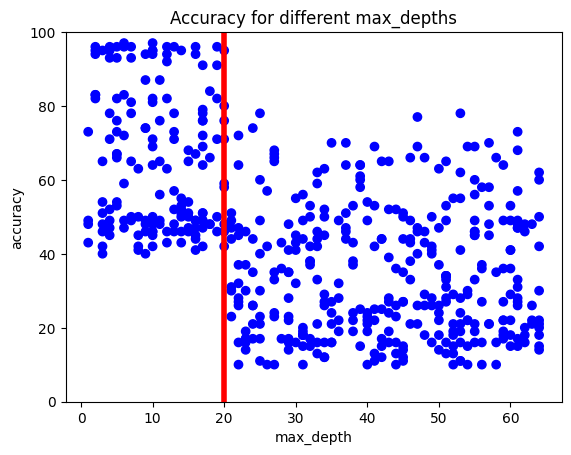

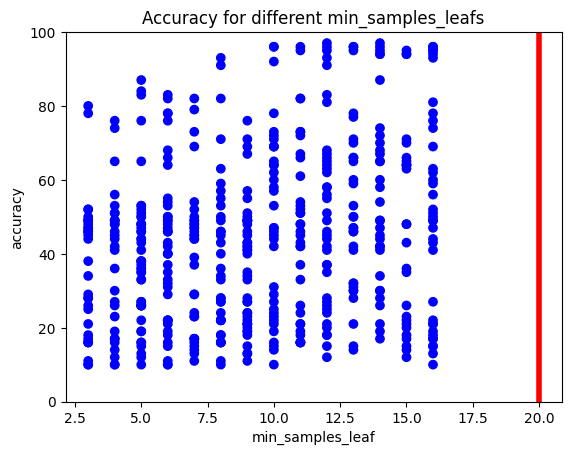

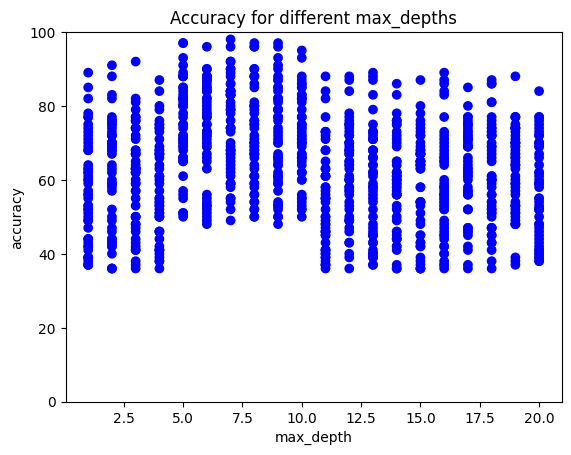

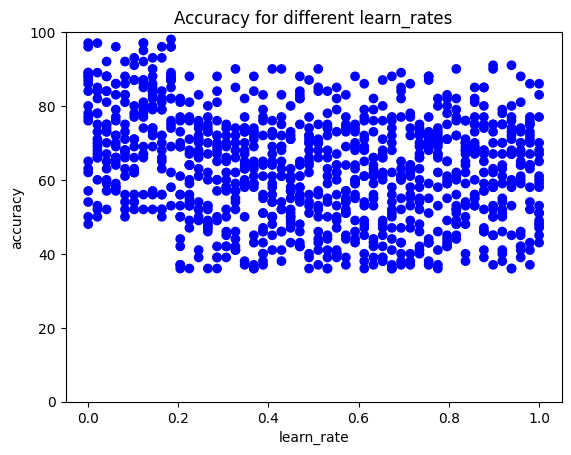

In [4]:
# Use the provided function to visualize the first results


def visualize_first():
  for name in results_df.columns[0:2]:
    plt.clf()
    plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    x_line = 20
    if name == "learn_rate":
      	x_line = 1
    plt.axvline(x=x_line, color="red", linewidth=4)
    plt.show()

def visualize_second():
  for name in results_df2.columns[0:2]:
    plt.clf()
    plt.scatter(results_df2[name],results_df2['accuracy'], c=['blue']*1000)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    plt.show()

visualize_first()

# Create some combinations lists & combine:
max_depth_list = list(range(1,21))
learn_rate_list = np.linspace(0.001,1,50)

# Call the function to visualize the second results
visualize_second()

# You can see in the second example our results are all generally higher.
# There also appears to be a bump around max_depths between 5 and 10 as well as learn_rate less than 0.2
# so perhaps there is even more room for improvement!

### Bayes Rule in Python
In this exercise you will undertake a practical example of setting up Bayes formula, obtaining new evidence and updating your 'beliefs' in order to get a more accurate result. The example will relate to the likelihood that someone will close their account for your online software product.

These are the probabilities we know:

7% (0.07) of people are likely to close their account next month
15% (0.15) of people with accounts are unhappy with your product (you don't know who though!)
35% (0.35) of people who are likely to close their account are unhappy with your product

In [5]:
# Assign probabilities to variables
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

# Probability unhappy person will close
p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
print(p_close_unhappy)

# You correctly were able to frame this problem in a Bayesian way, and update your beliefs using new evidence.
# There's a 16.3% chance that a customer, given that they are unhappy, will close their account

0.16333333333333336


**Bayesian Hyperparameter tuning with Hyperopt**
In this example you will set up and run a Bayesian hyperparameter optimization process using the package Hyperopt (already imported as hp for you). You will set up the domain (which is similar to setting up the grid for a grid search), then set up the objective function. Finally, you will run the optimizer over 20 iterations.

You will need to set up the domain using values:

- max_depth using quniform distribution (between 2 and 10, increasing by 2)
- learning_rate using uniform distribution (0.001 to 0.9)

Note that for the purpose of this exercise, this process was reduced in data sample size and hyperopt & GBM iterations. If you are trying out this method by yourself on your own machine, try a larger search space, more trials, more cvs and a larger dataset size to really see this in action!

In [6]:
# Set up space dictionary with specified hyperparameters
import numpy as np
from hyperopt import fmin, tpe, hp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_iris

# Load a sample dataset (Iris) and split into training and testing sets
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


space = {'max_depth': hp.quniform('max_depth', 2, 10, 2), 'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']),'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params)
    # Assuming X_train and y_train are defined elsewhere in the notebook
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy',cv=2,   n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective, space=space, max_evals=20, rstate=np.random.default_rng(42), algo=tpe.suggest)
print(best)

# You succesfully built your first Bayesian hyperparameter tuning algorithm.
# This will be a very powerful tool for your machine learning modeling in future.
# Bayesian hyperparameter tuning is a new and popular method so this first taster is a valuable thing to gain experience in.
# You are highly encouraged to extend this example on your own!

100%|██████████| 20/20 [00:22<00:00,  1.11s/trial, best loss: 0.06666666666666665]
{'learning_rate': np.float64(0.74725057950286), 'max_depth': np.float64(2.0)}


### Informed Search: Genetic Algorithms

***Genetic Hyperparameter Tuning with TPOT***  
You're going to undertake a simple example of genetic hyperparameter tuning. TPOT is a very powerful library that has a lot of features. You're just scratching the surface in this lesson, but you are highly encouraged to explore in your own time.

This is a very small example. In real life, TPOT is designed to be run for many hours to find the best model. You would have a much larger population and offspring size as well as hundreds more generations to find a good model.

You will create the estimator, fit the estimator to the training data and then score this on the test data.

For this example we wish to use:

- 3 generations
- 4 in the population size
- 3 offspring in each generation
- accuracy for scoring
- A random_state of 2 has been set for consistency of results.

In [7]:
!pip install tpot

In [20]:
!pip install --upgrade tpot


In [ ]:
from tpot import TPOTClassifier

# Define parameters
from tpot import TPOTClassifier

tpot_clf = TPOTClassifier(
    generations=5,
    population_size=20,


    random_state=2,
    cv=3
)


# Fit model
tpot_clf.fit(X_train, y_train)

# Evaluate model
print("Test Accuracy:", tpot_clf.score(X_test, y_test))

# Export the pipeline
tpot_clf.export('best_model_pipeline.py')


**Analysing TPOT's stability**   
You will now see the random nature of TPOT by constructing the classifier with different random states and seeing what model is found to be best by the algorithm. This assists to see that TPOT is quite unstable when not run for a reasonable amount of time.

In [24]:
from tpot import TPOTClassifier

# Create the tpot classifier
tpot_clf = TPOTClassifier(
    generations=5,
    population_size=20,


    random_state=2,    #try with 111 and other random state values
    cv=3
)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

# You can see that TPOT is quite unstable when only running with low generations, population size and offspring.
# The first model chosen was a Decision Tree, then a K-nearest Neighbor model and finally a Random Forest.
# Increasing the generations, population size and offspring and running this for a long time will assist to produce better models and more stable results.
# Don't hesitate to try it yourself on your own machine!

/usr/local/lib/python3.11/dist-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:33825
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33105'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:33493 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33493
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:37954
INFO:distributed.scheduler:Receive client connection: Client-b363817c-67e3-11f0-a6ab-0242ac1c000c
INFO:distributed.core:Starting established con

AttributeError: 'TPOTClassifier' object has no attribute 'score'